# Function

In [1]:
f = lambda x: -2*x**5 - x**4 + 3*x**3 + np.sin(x)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_data = np.arange(-10, 10, 0.1)
y_data = np.array([f(i) for i in x_data])

Text(0, 0.5, 'f(x)')

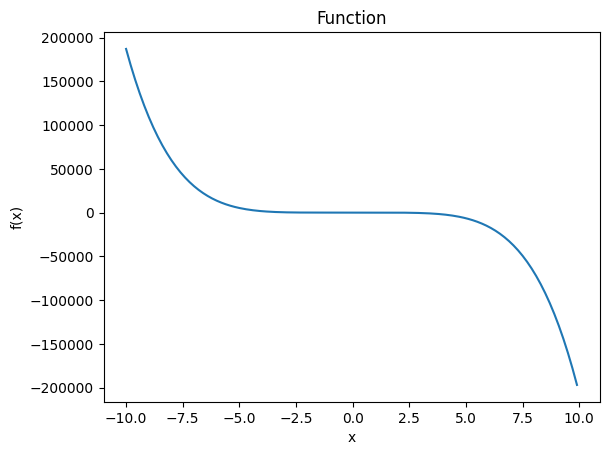

In [4]:
plt.plot(x_data, y_data)
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

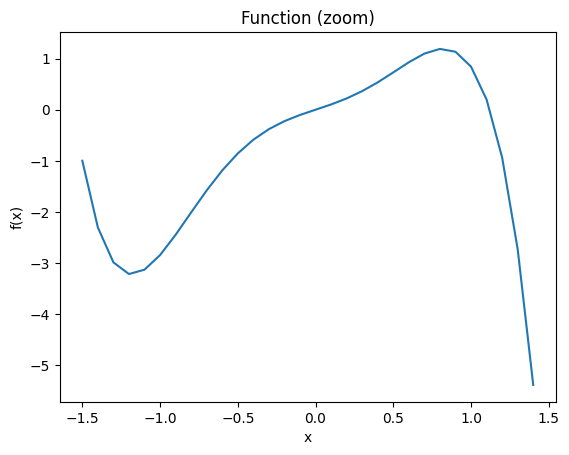

In [5]:
plt.plot(x_data[85:115], y_data[85:115])
plt.title('Function (zoom)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Solve with Keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [7]:
# create data for training from the function

x_train = np.array(x_data, dtype=np.float32)

y_train = np.array(y_data, dtype=np.float32)


# create data for testing from a function

x_val = np.array(np.arange(-10, 10, 0.092), dtype=np.float32)

y_val = np.array([f(i) for i in x_val], dtype=np.float32)

In [8]:
x_val.shape

(218,)

In [9]:
%%time

# define model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=1))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# regression is performed, then a Dense layer containing a single neuron with a linear activation function is used
model.add(Dense(1, activation="linear"))

# compile model: the model is initialized with the Adam optimizer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3, decay=1e-3 / 200))

# patience early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# fit the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                    epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
pred_train_set = model.predict(x_train)
pred_val_set = model.predict(x_val)

Epoch 1/10000000
2/2 - 0s - loss: 3498923776.0000 - val_loss: 3607698176.0000 - 172ms/epoch - 86ms/step
Epoch 2/10000000
2/2 - 0s - loss: 3498899200.0000 - val_loss: 3607672832.0000 - 9ms/epoch - 5ms/step
Epoch 3/10000000
2/2 - 0s - loss: 3498874624.0000 - val_loss: 3607648512.0000 - 11ms/epoch - 5ms/step
Epoch 4/10000000


2023-05-10 15:44:22.287586: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 - 0s - loss: 3498851072.0000 - val_loss: 3607627008.0000 - 10ms/epoch - 5ms/step
Epoch 5/10000000
2/2 - 0s - loss: 3498830080.0000 - val_loss: 3607604992.0000 - 11ms/epoch - 6ms/step
Epoch 6/10000000
2/2 - 0s - loss: 3498807808.0000 - val_loss: 3607582720.0000 - 11ms/epoch - 5ms/step
Epoch 7/10000000
2/2 - 0s - loss: 3498785792.0000 - val_loss: 3607558912.0000 - 10ms/epoch - 5ms/step
Epoch 8/10000000
2/2 - 0s - loss: 3498762496.0000 - val_loss: 3607536640.0000 - 10ms/epoch - 5ms/step
Epoch 9/10000000
2/2 - 0s - loss: 3498738432.0000 - val_loss: 3607513344.0000 - 10ms/epoch - 5ms/step
Epoch 10/10000000
2/2 - 0s - loss: 3498716416.0000 - val_loss: 3607488768.0000 - 10ms/epoch - 5ms/step
Epoch 11/10000000
2/2 - 0s - loss: 3498691072.0000 - val_loss: 3607462912.0000 - 10ms/epoch - 5ms/step
Epoch 12/10000000
2/2 - 0s - loss: 3498665472.0000 - val_loss: 3607435008.0000 - 11ms/epoch - 5ms/step
Epoch 13/10000000
2/2 - 0s - loss: 3498638336.0000 - val_loss: 3607406336.0000 - 10ms/epoch - 5m

Epoch 84/10000000
2/2 - 0s - loss: 3473722624.0000 - val_loss: 3581412608.0000 - 9ms/epoch - 5ms/step
Epoch 85/10000000
2/2 - 0s - loss: 3472579072.0000 - val_loss: 3580223744.0000 - 9ms/epoch - 5ms/step
Epoch 86/10000000
2/2 - 0s - loss: 3471303936.0000 - val_loss: 3579008256.0000 - 9ms/epoch - 5ms/step
Epoch 87/10000000
2/2 - 0s - loss: 3470107904.0000 - val_loss: 3577744384.0000 - 9ms/epoch - 4ms/step
Epoch 88/10000000
2/2 - 0s - loss: 3468849920.0000 - val_loss: 3576433664.0000 - 9ms/epoch - 5ms/step
Epoch 89/10000000
2/2 - 0s - loss: 3467546368.0000 - val_loss: 3575075584.0000 - 9ms/epoch - 5ms/step
Epoch 90/10000000
2/2 - 0s - loss: 3466284032.0000 - val_loss: 3573662208.0000 - 9ms/epoch - 5ms/step
Epoch 91/10000000
2/2 - 0s - loss: 3464752128.0000 - val_loss: 3572223744.0000 - 9ms/epoch - 5ms/step
Epoch 92/10000000
2/2 - 0s - loss: 3463389440.0000 - val_loss: 3570724096.0000 - 9ms/epoch - 5ms/step
Epoch 93/10000000
2/2 - 0s - loss: 3461816320.0000 - val_loss: 3569187840.0000 - 1

Epoch 164/10000000
2/2 - 0s - loss: 3170966528.0000 - val_loss: 3271459840.0000 - 10ms/epoch - 5ms/step
Epoch 165/10000000
2/2 - 0s - loss: 3163312640.0000 - val_loss: 3263829760.0000 - 9ms/epoch - 5ms/step
Epoch 166/10000000
2/2 - 0s - loss: 3155591424.0000 - val_loss: 3256108288.0000 - 10ms/epoch - 5ms/step
Epoch 167/10000000
2/2 - 0s - loss: 3148376320.0000 - val_loss: 3248188928.0000 - 10ms/epoch - 5ms/step
Epoch 168/10000000
2/2 - 0s - loss: 3140599808.0000 - val_loss: 3240154624.0000 - 10ms/epoch - 5ms/step
Epoch 169/10000000
2/2 - 0s - loss: 3131921920.0000 - val_loss: 3232147712.0000 - 10ms/epoch - 5ms/step
Epoch 170/10000000
2/2 - 0s - loss: 3124895744.0000 - val_loss: 3223883520.0000 - 10ms/epoch - 5ms/step
Epoch 171/10000000
2/2 - 0s - loss: 3115676416.0000 - val_loss: 3215715584.0000 - 9ms/epoch - 5ms/step
Epoch 172/10000000
2/2 - 0s - loss: 3108398080.0000 - val_loss: 3207274496.0000 - 9ms/epoch - 5ms/step
Epoch 173/10000000
2/2 - 0s - loss: 3099595776.0000 - val_loss: 319

Epoch 244/10000000
2/2 - 0s - loss: 2303205888.0000 - val_loss: 2389687808.0000 - 10ms/epoch - 5ms/step
Epoch 245/10000000
2/2 - 0s - loss: 2290632704.0000 - val_loss: 2377256448.0000 - 11ms/epoch - 6ms/step
Epoch 246/10000000
2/2 - 0s - loss: 2279154688.0000 - val_loss: 2364717824.0000 - 10ms/epoch - 5ms/step
Epoch 247/10000000
2/2 - 0s - loss: 2265797888.0000 - val_loss: 2352433920.0000 - 10ms/epoch - 5ms/step
Epoch 248/10000000
2/2 - 0s - loss: 2254331136.0000 - val_loss: 2340061184.0000 - 9ms/epoch - 5ms/step
Epoch 249/10000000
2/2 - 0s - loss: 2242649856.0000 - val_loss: 2327644672.0000 - 9ms/epoch - 5ms/step
Epoch 250/10000000
2/2 - 0s - loss: 2229079296.0000 - val_loss: 2315559936.0000 - 10ms/epoch - 5ms/step
Epoch 251/10000000
2/2 - 0s - loss: 2217856000.0000 - val_loss: 2303362048.0000 - 9ms/epoch - 5ms/step
Epoch 252/10000000
2/2 - 0s - loss: 2205858048.0000 - val_loss: 2291209728.0000 - 9ms/epoch - 5ms/step
Epoch 253/10000000
2/2 - 0s - loss: 2195281664.0000 - val_loss: 2278

Epoch 324/10000000
2/2 - 0s - loss: 1558874240.0000 - val_loss: 1626947584.0000 - 9ms/epoch - 4ms/step
Epoch 325/10000000
2/2 - 0s - loss: 1553194368.0000 - val_loss: 1620768000.0000 - 9ms/epoch - 5ms/step
Epoch 326/10000000
2/2 - 0s - loss: 1548025472.0000 - val_loss: 1614515456.0000 - 9ms/epoch - 5ms/step
Epoch 327/10000000
2/2 - 0s - loss: 1541438720.0000 - val_loss: 1608470912.0000 - 9ms/epoch - 4ms/step
Epoch 328/10000000
2/2 - 0s - loss: 1536655744.0000 - val_loss: 1602274944.0000 - 9ms/epoch - 4ms/step
Epoch 329/10000000
2/2 - 0s - loss: 1530436864.0000 - val_loss: 1596342784.0000 - 9ms/epoch - 5ms/step
Epoch 330/10000000
2/2 - 0s - loss: 1524671104.0000 - val_loss: 1590536832.0000 - 9ms/epoch - 4ms/step
Epoch 331/10000000
2/2 - 0s - loss: 1519087744.0000 - val_loss: 1584791040.0000 - 10ms/epoch - 5ms/step
Epoch 332/10000000
2/2 - 0s - loss: 1514031360.0000 - val_loss: 1579010560.0000 - 10ms/epoch - 5ms/step
Epoch 333/10000000
2/2 - 0s - loss: 1508524032.0000 - val_loss: 1573243

2/2 - 0s - loss: 1290267904.0000 - val_loss: 1338362368.0000 - 9ms/epoch - 4ms/step
Epoch 404/10000000
2/2 - 0s - loss: 1288717952.0000 - val_loss: 1336864512.0000 - 9ms/epoch - 4ms/step
Epoch 405/10000000
2/2 - 0s - loss: 1287533184.0000 - val_loss: 1335429376.0000 - 10ms/epoch - 5ms/step
Epoch 406/10000000
2/2 - 0s - loss: 1286410112.0000 - val_loss: 1333913984.0000 - 11ms/epoch - 6ms/step
Epoch 407/10000000
2/2 - 0s - loss: 1284761984.0000 - val_loss: 1332618624.0000 - 10ms/epoch - 5ms/step
Epoch 408/10000000
2/2 - 0s - loss: 1283871616.0000 - val_loss: 1331306368.0000 - 10ms/epoch - 5ms/step
Epoch 409/10000000
2/2 - 0s - loss: 1282621312.0000 - val_loss: 1330031744.0000 - 9ms/epoch - 5ms/step
Epoch 410/10000000
2/2 - 0s - loss: 1281754368.0000 - val_loss: 1328730880.0000 - 9ms/epoch - 5ms/step
Epoch 411/10000000
2/2 - 0s - loss: 1280833920.0000 - val_loss: 1327438592.0000 - 9ms/epoch - 5ms/step
Epoch 412/10000000
2/2 - 0s - loss: 1279671936.0000 - val_loss: 1326194560.0000 - 9ms/ep

Epoch 483/10000000
2/2 - 0s - loss: 1241044864.0000 - val_loss: 1281771776.0000 - 9ms/epoch - 4ms/step
Epoch 484/10000000
2/2 - 0s - loss: 1240959488.0000 - val_loss: 1281384832.0000 - 9ms/epoch - 5ms/step
Epoch 485/10000000
2/2 - 0s - loss: 1240450560.0000 - val_loss: 1281023616.0000 - 9ms/epoch - 4ms/step
Epoch 486/10000000
2/2 - 0s - loss: 1240167168.0000 - val_loss: 1280671616.0000 - 9ms/epoch - 4ms/step
Epoch 487/10000000
2/2 - 0s - loss: 1239911424.0000 - val_loss: 1280295424.0000 - 9ms/epoch - 4ms/step
Epoch 488/10000000
2/2 - 0s - loss: 1239547904.0000 - val_loss: 1279952640.0000 - 9ms/epoch - 4ms/step
Epoch 489/10000000
2/2 - 0s - loss: 1239270144.0000 - val_loss: 1279597952.0000 - 9ms/epoch - 5ms/step
Epoch 490/10000000
2/2 - 0s - loss: 1238843392.0000 - val_loss: 1279230208.0000 - 9ms/epoch - 5ms/step
Epoch 491/10000000
2/2 - 0s - loss: 1238595840.0000 - val_loss: 1278856576.0000 - 9ms/epoch - 5ms/step
Epoch 492/10000000
2/2 - 0s - loss: 1238180992.0000 - val_loss: 127853068

Epoch 563/10000000
2/2 - 0s - loss: 1217749760.0000 - val_loss: 1256704000.0000 - 10ms/epoch - 5ms/step
Epoch 564/10000000
2/2 - 0s - loss: 1217497856.0000 - val_loss: 1256430464.0000 - 11ms/epoch - 6ms/step
Epoch 565/10000000
2/2 - 0s - loss: 1217280256.0000 - val_loss: 1256132480.0000 - 11ms/epoch - 5ms/step
Epoch 566/10000000
2/2 - 0s - loss: 1216959488.0000 - val_loss: 1255851776.0000 - 10ms/epoch - 5ms/step
Epoch 567/10000000
2/2 - 0s - loss: 1216895488.0000 - val_loss: 1255605248.0000 - 9ms/epoch - 5ms/step
Epoch 568/10000000
2/2 - 0s - loss: 1216383872.0000 - val_loss: 1255313920.0000 - 9ms/epoch - 5ms/step
Epoch 569/10000000
2/2 - 0s - loss: 1216123008.0000 - val_loss: 1255046784.0000 - 10ms/epoch - 5ms/step
Epoch 570/10000000
2/2 - 0s - loss: 1215920512.0000 - val_loss: 1254731264.0000 - 10ms/epoch - 5ms/step
Epoch 571/10000000
2/2 - 0s - loss: 1215594368.0000 - val_loss: 1254440448.0000 - 9ms/epoch - 4ms/step
Epoch 572/10000000
2/2 - 0s - loss: 1215340160.0000 - val_loss: 125

Epoch 643/10000000
2/2 - 0s - loss: 1196592128.0000 - val_loss: 1234809344.0000 - 9ms/epoch - 4ms/step
Epoch 644/10000000
2/2 - 0s - loss: 1196444160.0000 - val_loss: 1234579840.0000 - 9ms/epoch - 5ms/step
Epoch 645/10000000
2/2 - 0s - loss: 1196100864.0000 - val_loss: 1234318080.0000 - 9ms/epoch - 4ms/step
Epoch 646/10000000
2/2 - 0s - loss: 1195916288.0000 - val_loss: 1234061568.0000 - 9ms/epoch - 5ms/step
Epoch 647/10000000
2/2 - 0s - loss: 1195604224.0000 - val_loss: 1233799168.0000 - 9ms/epoch - 4ms/step
Epoch 648/10000000
2/2 - 0s - loss: 1195362048.0000 - val_loss: 1233500672.0000 - 9ms/epoch - 4ms/step
Epoch 649/10000000
2/2 - 0s - loss: 1195040384.0000 - val_loss: 1233226880.0000 - 9ms/epoch - 4ms/step
Epoch 650/10000000
2/2 - 0s - loss: 1194914304.0000 - val_loss: 1232980224.0000 - 9ms/epoch - 5ms/step
Epoch 651/10000000
2/2 - 0s - loss: 1194652544.0000 - val_loss: 1232790016.0000 - 9ms/epoch - 4ms/step
Epoch 652/10000000
2/2 - 0s - loss: 1194287104.0000 - val_loss: 123254899

Epoch 723/10000000
2/2 - 0s - loss: 1176481280.0000 - val_loss: 1214214144.0000 - 9ms/epoch - 5ms/step
Epoch 724/10000000
2/2 - 0s - loss: 1176237184.0000 - val_loss: 1213973376.0000 - 10ms/epoch - 5ms/step
Epoch 725/10000000
2/2 - 0s - loss: 1176040704.0000 - val_loss: 1213697152.0000 - 11ms/epoch - 6ms/step
Epoch 726/10000000
2/2 - 0s - loss: 1175753984.0000 - val_loss: 1213453696.0000 - 13ms/epoch - 7ms/step
Epoch 727/10000000
2/2 - 0s - loss: 1175619968.0000 - val_loss: 1213239424.0000 - 10ms/epoch - 5ms/step
Epoch 728/10000000
2/2 - 0s - loss: 1175336192.0000 - val_loss: 1213014272.0000 - 10ms/epoch - 5ms/step
Epoch 729/10000000
2/2 - 0s - loss: 1175070592.0000 - val_loss: 1212732160.0000 - 9ms/epoch - 5ms/step
Epoch 730/10000000
2/2 - 0s - loss: 1174830976.0000 - val_loss: 1212491008.0000 - 9ms/epoch - 4ms/step
Epoch 731/10000000
2/2 - 0s - loss: 1174563840.0000 - val_loss: 1212222464.0000 - 9ms/epoch - 5ms/step
Epoch 732/10000000
2/2 - 0s - loss: 1174365056.0000 - val_loss: 1211

Epoch 803/10000000
2/2 - 0s - loss: 1157152256.0000 - val_loss: 1194402560.0000 - 9ms/epoch - 5ms/step
Epoch 804/10000000
2/2 - 0s - loss: 1156964224.0000 - val_loss: 1194135936.0000 - 10ms/epoch - 5ms/step
Epoch 805/10000000
2/2 - 0s - loss: 1156713216.0000 - val_loss: 1193911040.0000 - 10ms/epoch - 5ms/step
Epoch 806/10000000
2/2 - 0s - loss: 1156471680.0000 - val_loss: 1193656192.0000 - 9ms/epoch - 5ms/step
Epoch 807/10000000
2/2 - 0s - loss: 1156296320.0000 - val_loss: 1193396608.0000 - 9ms/epoch - 5ms/step
Epoch 808/10000000
2/2 - 0s - loss: 1155944064.0000 - val_loss: 1193154688.0000 - 9ms/epoch - 5ms/step
Epoch 809/10000000
2/2 - 0s - loss: 1155788032.0000 - val_loss: 1192900352.0000 - 9ms/epoch - 5ms/step
Epoch 810/10000000
2/2 - 0s - loss: 1155478784.0000 - val_loss: 1192660096.0000 - 9ms/epoch - 5ms/step
Epoch 811/10000000
2/2 - 0s - loss: 1155260544.0000 - val_loss: 1192430464.0000 - 13ms/epoch - 7ms/step
Epoch 812/10000000
2/2 - 0s - loss: 1155145856.0000 - val_loss: 119215

Epoch 883/10000000
2/2 - 0s - loss: 1138295808.0000 - val_loss: 1175102976.0000 - 10ms/epoch - 5ms/step
Epoch 884/10000000
2/2 - 0s - loss: 1138037376.0000 - val_loss: 1174846336.0000 - 9ms/epoch - 5ms/step
Epoch 885/10000000
2/2 - 0s - loss: 1137895680.0000 - val_loss: 1174605824.0000 - 9ms/epoch - 5ms/step
Epoch 886/10000000
2/2 - 0s - loss: 1137576320.0000 - val_loss: 1174359168.0000 - 10ms/epoch - 5ms/step
Epoch 887/10000000
2/2 - 0s - loss: 1137351552.0000 - val_loss: 1174100608.0000 - 9ms/epoch - 5ms/step
Epoch 888/10000000
2/2 - 0s - loss: 1137112704.0000 - val_loss: 1173848448.0000 - 9ms/epoch - 5ms/step
Epoch 889/10000000
2/2 - 0s - loss: 1136897536.0000 - val_loss: 1173587072.0000 - 9ms/epoch - 5ms/step
Epoch 890/10000000
2/2 - 0s - loss: 1136716800.0000 - val_loss: 1173373440.0000 - 10ms/epoch - 5ms/step
Epoch 891/10000000
2/2 - 0s - loss: 1136465536.0000 - val_loss: 1173101312.0000 - 12ms/epoch - 6ms/step
Epoch 892/10000000
2/2 - 0s - loss: 1136176640.0000 - val_loss: 11728

2/2 - 0s - loss: 1120020864.0000 - val_loss: 1156156800.0000 - 9ms/epoch - 5ms/step
Epoch 963/10000000
2/2 - 0s - loss: 1119653376.0000 - val_loss: 1155922944.0000 - 10ms/epoch - 5ms/step
Epoch 964/10000000
2/2 - 0s - loss: 1119554304.0000 - val_loss: 1155663616.0000 - 9ms/epoch - 5ms/step
Epoch 965/10000000
2/2 - 0s - loss: 1119209472.0000 - val_loss: 1155476480.0000 - 10ms/epoch - 5ms/step
Epoch 966/10000000
2/2 - 0s - loss: 1118924288.0000 - val_loss: 1155273472.0000 - 10ms/epoch - 5ms/step
Epoch 967/10000000
2/2 - 0s - loss: 1118692352.0000 - val_loss: 1155028224.0000 - 10ms/epoch - 5ms/step
Epoch 968/10000000
2/2 - 0s - loss: 1118503296.0000 - val_loss: 1154786816.0000 - 9ms/epoch - 5ms/step
Epoch 969/10000000
2/2 - 0s - loss: 1118263040.0000 - val_loss: 1154589696.0000 - 10ms/epoch - 5ms/step
Epoch 970/10000000
2/2 - 0s - loss: 1118055296.0000 - val_loss: 1154353024.0000 - 10ms/epoch - 5ms/step
Epoch 971/10000000
2/2 - 0s - loss: 1117827456.0000 - val_loss: 1154145024.0000 - 10ms

2/2 - 0s - loss: 1101424128.0000 - val_loss: 1137348480.0000 - 9ms/epoch - 5ms/step
Epoch 1042/10000000
2/2 - 0s - loss: 1101256832.0000 - val_loss: 1137076736.0000 - 9ms/epoch - 5ms/step
Epoch 1043/10000000
2/2 - 0s - loss: 1100906496.0000 - val_loss: 1136829056.0000 - 9ms/epoch - 5ms/step
Epoch 1044/10000000
2/2 - 0s - loss: 1100909440.0000 - val_loss: 1136648064.0000 - 9ms/epoch - 5ms/step
Epoch 1045/10000000
2/2 - 0s - loss: 1100468352.0000 - val_loss: 1136431616.0000 - 9ms/epoch - 4ms/step
Epoch 1046/10000000
2/2 - 0s - loss: 1100294016.0000 - val_loss: 1136174080.0000 - 9ms/epoch - 5ms/step
Epoch 1047/10000000
2/2 - 0s - loss: 1099959680.0000 - val_loss: 1135900928.0000 - 9ms/epoch - 5ms/step
Epoch 1048/10000000
2/2 - 0s - loss: 1099679232.0000 - val_loss: 1135664384.0000 - 9ms/epoch - 4ms/step
Epoch 1049/10000000
2/2 - 0s - loss: 1099495552.0000 - val_loss: 1135407872.0000 - 9ms/epoch - 4ms/step
Epoch 1050/10000000
2/2 - 0s - loss: 1099215104.0000 - val_loss: 1135175296.0000 - 9

Epoch 1120/10000000
2/2 - 0s - loss: 1082605440.0000 - val_loss: 1118180736.0000 - 9ms/epoch - 5ms/step
Epoch 1121/10000000
2/2 - 0s - loss: 1082309504.0000 - val_loss: 1117928320.0000 - 9ms/epoch - 5ms/step
Epoch 1122/10000000
2/2 - 0s - loss: 1082067200.0000 - val_loss: 1117682304.0000 - 10ms/epoch - 5ms/step
Epoch 1123/10000000
2/2 - 0s - loss: 1081815808.0000 - val_loss: 1117427968.0000 - 9ms/epoch - 5ms/step
Epoch 1124/10000000
2/2 - 0s - loss: 1081588480.0000 - val_loss: 1117180032.0000 - 9ms/epoch - 5ms/step
Epoch 1125/10000000
2/2 - 0s - loss: 1081435648.0000 - val_loss: 1116905984.0000 - 9ms/epoch - 4ms/step
Epoch 1126/10000000
2/2 - 0s - loss: 1081078528.0000 - val_loss: 1116656000.0000 - 9ms/epoch - 4ms/step
Epoch 1127/10000000
2/2 - 0s - loss: 1080859520.0000 - val_loss: 1116424704.0000 - 9ms/epoch - 5ms/step
Epoch 1128/10000000
2/2 - 0s - loss: 1080606592.0000 - val_loss: 1116172416.0000 - 9ms/epoch - 5ms/step
Epoch 1129/10000000
2/2 - 0s - loss: 1080356352.0000 - val_loss

Epoch 1199/10000000
2/2 - 0s - loss: 1063402240.0000 - val_loss: 1098427136.0000 - 9ms/epoch - 5ms/step
Epoch 1200/10000000
2/2 - 0s - loss: 1062945856.0000 - val_loss: 1098154880.0000 - 9ms/epoch - 5ms/step
Epoch 1201/10000000
2/2 - 0s - loss: 1063019008.0000 - val_loss: 1097876480.0000 - 9ms/epoch - 5ms/step
Epoch 1202/10000000
2/2 - 0s - loss: 1062556288.0000 - val_loss: 1097651072.0000 - 9ms/epoch - 4ms/step
Epoch 1203/10000000
2/2 - 0s - loss: 1062246336.0000 - val_loss: 1097427200.0000 - 9ms/epoch - 5ms/step
Epoch 1204/10000000
2/2 - 0s - loss: 1062095936.0000 - val_loss: 1097131264.0000 - 9ms/epoch - 4ms/step
Epoch 1205/10000000
2/2 - 0s - loss: 1061687296.0000 - val_loss: 1096876672.0000 - 9ms/epoch - 4ms/step
Epoch 1206/10000000
2/2 - 0s - loss: 1061465280.0000 - val_loss: 1096606464.0000 - 9ms/epoch - 5ms/step
Epoch 1207/10000000
2/2 - 0s - loss: 1061209344.0000 - val_loss: 1096362240.0000 - 10ms/epoch - 5ms/step
Epoch 1208/10000000
2/2 - 0s - loss: 1061141568.0000 - val_loss

Epoch 1278/10000000
2/2 - 0s - loss: 1043260928.0000 - val_loss: 1077842944.0000 - 9ms/epoch - 5ms/step
Epoch 1279/10000000
2/2 - 0s - loss: 1042716928.0000 - val_loss: 1077577472.0000 - 10ms/epoch - 5ms/step
Epoch 1280/10000000
2/2 - 0s - loss: 1042441024.0000 - val_loss: 1077306752.0000 - 10ms/epoch - 5ms/step
Epoch 1281/10000000
2/2 - 0s - loss: 1042355840.0000 - val_loss: 1077014400.0000 - 9ms/epoch - 5ms/step
Epoch 1282/10000000
2/2 - 0s - loss: 1041948480.0000 - val_loss: 1076718464.0000 - 9ms/epoch - 5ms/step
Epoch 1283/10000000
2/2 - 0s - loss: 1041651520.0000 - val_loss: 1076450944.0000 - 10ms/epoch - 5ms/step
Epoch 1284/10000000
2/2 - 0s - loss: 1041400960.0000 - val_loss: 1076193280.0000 - 9ms/epoch - 5ms/step
Epoch 1285/10000000
2/2 - 0s - loss: 1041150720.0000 - val_loss: 1075944832.0000 - 9ms/epoch - 5ms/step
Epoch 1286/10000000
2/2 - 0s - loss: 1040909056.0000 - val_loss: 1075692928.0000 - 9ms/epoch - 5ms/step
Epoch 1287/10000000
2/2 - 0s - loss: 1040690560.0000 - val_lo

Epoch 1357/10000000
2/2 - 0s - loss: 1021609600.0000 - val_loss: 1056010048.0000 - 10ms/epoch - 5ms/step
Epoch 1358/10000000
2/2 - 0s - loss: 1021569280.0000 - val_loss: 1055766080.0000 - 10ms/epoch - 5ms/step
Epoch 1359/10000000
2/2 - 0s - loss: 1021027136.0000 - val_loss: 1055470336.0000 - 9ms/epoch - 5ms/step
Epoch 1360/10000000
2/2 - 0s - loss: 1020764992.0000 - val_loss: 1055185088.0000 - 9ms/epoch - 5ms/step
Epoch 1361/10000000
2/2 - 0s - loss: 1020758080.0000 - val_loss: 1054915648.0000 - 9ms/epoch - 5ms/step
Epoch 1362/10000000
2/2 - 0s - loss: 1020237504.0000 - val_loss: 1054604800.0000 - 9ms/epoch - 5ms/step
Epoch 1363/10000000
2/2 - 0s - loss: 1019893184.0000 - val_loss: 1054324352.0000 - 10ms/epoch - 5ms/step
Epoch 1364/10000000
2/2 - 0s - loss: 1019619072.0000 - val_loss: 1054057216.0000 - 9ms/epoch - 5ms/step
Epoch 1365/10000000
2/2 - 0s - loss: 1019454592.0000 - val_loss: 1053807296.0000 - 9ms/epoch - 5ms/step
Epoch 1366/10000000
2/2 - 0s - loss: 1019161984.0000 - val_lo

Epoch 1436/10000000
2/2 - 0s - loss: 998726720.0000 - val_loss: 1032802432.0000 - 9ms/epoch - 5ms/step
Epoch 1437/10000000
2/2 - 0s - loss: 998363456.0000 - val_loss: 1032487936.0000 - 10ms/epoch - 5ms/step
Epoch 1438/10000000
2/2 - 0s - loss: 998242880.0000 - val_loss: 1032152000.0000 - 9ms/epoch - 5ms/step
Epoch 1439/10000000
2/2 - 0s - loss: 997769472.0000 - val_loss: 1031841792.0000 - 9ms/epoch - 5ms/step
Epoch 1440/10000000
2/2 - 0s - loss: 997459072.0000 - val_loss: 1031531968.0000 - 9ms/epoch - 5ms/step
Epoch 1441/10000000
2/2 - 0s - loss: 997209024.0000 - val_loss: 1031236992.0000 - 9ms/epoch - 5ms/step
Epoch 1442/10000000
2/2 - 0s - loss: 996958528.0000 - val_loss: 1030924032.0000 - 10ms/epoch - 5ms/step
Epoch 1443/10000000
2/2 - 0s - loss: 996591232.0000 - val_loss: 1030625024.0000 - 10ms/epoch - 5ms/step
Epoch 1444/10000000
2/2 - 0s - loss: 996236928.0000 - val_loss: 1030301696.0000 - 10ms/epoch - 5ms/step
Epoch 1445/10000000
2/2 - 0s - loss: 995956480.0000 - val_loss: 10299

Epoch 1516/10000000
2/2 - 0s - loss: 973498176.0000 - val_loss: 1007100224.0000 - 10ms/epoch - 5ms/step
Epoch 1517/10000000
2/2 - 0s - loss: 973152832.0000 - val_loss: 1006745984.0000 - 9ms/epoch - 4ms/step
Epoch 1518/10000000
2/2 - 0s - loss: 972758528.0000 - val_loss: 1006413952.0000 - 9ms/epoch - 4ms/step
Epoch 1519/10000000
2/2 - 0s - loss: 972539840.0000 - val_loss: 1006058752.0000 - 9ms/epoch - 5ms/step
Epoch 1520/10000000
2/2 - 0s - loss: 972098176.0000 - val_loss: 1005733312.0000 - 9ms/epoch - 4ms/step
Epoch 1521/10000000
2/2 - 0s - loss: 971812032.0000 - val_loss: 1005392768.0000 - 9ms/epoch - 5ms/step
Epoch 1522/10000000
2/2 - 0s - loss: 971438656.0000 - val_loss: 1005061440.0000 - 9ms/epoch - 5ms/step
Epoch 1523/10000000
2/2 - 0s - loss: 971171200.0000 - val_loss: 1004756224.0000 - 9ms/epoch - 4ms/step
Epoch 1524/10000000
2/2 - 0s - loss: 970802880.0000 - val_loss: 1004409088.0000 - 9ms/epoch - 5ms/step
Epoch 1525/10000000
2/2 - 0s - loss: 970547968.0000 - val_loss: 10041002

2/2 - 0s - loss: 945798528.0000 - val_loss: 979096704.0000 - 9ms/epoch - 5ms/step
Epoch 1597/10000000
2/2 - 0s - loss: 945663936.0000 - val_loss: 978769408.0000 - 9ms/epoch - 5ms/step
Epoch 1598/10000000
2/2 - 0s - loss: 945327360.0000 - val_loss: 978338304.0000 - 9ms/epoch - 5ms/step
Epoch 1599/10000000
2/2 - 0s - loss: 944696832.0000 - val_loss: 977982784.0000 - 10ms/epoch - 5ms/step
Epoch 1600/10000000
2/2 - 0s - loss: 944333568.0000 - val_loss: 977603968.0000 - 9ms/epoch - 4ms/step
Epoch 1601/10000000
2/2 - 0s - loss: 944035456.0000 - val_loss: 977244864.0000 - 8ms/epoch - 4ms/step
Epoch 1602/10000000
2/2 - 0s - loss: 943671872.0000 - val_loss: 976857728.0000 - 9ms/epoch - 4ms/step
Epoch 1603/10000000
2/2 - 0s - loss: 943503616.0000 - val_loss: 976448768.0000 - 9ms/epoch - 4ms/step
Epoch 1604/10000000
2/2 - 0s - loss: 942978496.0000 - val_loss: 976135936.0000 - 9ms/epoch - 5ms/step
Epoch 1605/10000000
2/2 - 0s - loss: 942509120.0000 - val_loss: 975786496.0000 - 9ms/epoch - 4ms/step

Epoch 1677/10000000
2/2 - 0s - loss: 914897792.0000 - val_loss: 947658368.0000 - 9ms/epoch - 4ms/step
Epoch 1678/10000000
2/2 - 0s - loss: 914422144.0000 - val_loss: 947220992.0000 - 9ms/epoch - 5ms/step
Epoch 1679/10000000
2/2 - 0s - loss: 913946880.0000 - val_loss: 946823744.0000 - 9ms/epoch - 5ms/step
Epoch 1680/10000000
2/2 - 0s - loss: 913596096.0000 - val_loss: 946404992.0000 - 9ms/epoch - 5ms/step
Epoch 1681/10000000
2/2 - 0s - loss: 913200960.0000 - val_loss: 946003584.0000 - 9ms/epoch - 5ms/step
Epoch 1682/10000000
2/2 - 0s - loss: 912774784.0000 - val_loss: 945613952.0000 - 9ms/epoch - 5ms/step
Epoch 1683/10000000
2/2 - 0s - loss: 912393024.0000 - val_loss: 945212672.0000 - 9ms/epoch - 5ms/step
Epoch 1684/10000000
2/2 - 0s - loss: 911931328.0000 - val_loss: 944779136.0000 - 9ms/epoch - 4ms/step
Epoch 1685/10000000
2/2 - 0s - loss: 911551040.0000 - val_loss: 944363392.0000 - 9ms/epoch - 5ms/step
Epoch 1686/10000000
2/2 - 0s - loss: 911133056.0000 - val_loss: 943926208.0000 - 9

2/2 - 0s - loss: 880644608.0000 - val_loss: 913159680.0000 - 10ms/epoch - 5ms/step
Epoch 1758/10000000
2/2 - 0s - loss: 880356224.0000 - val_loss: 912674624.0000 - 9ms/epoch - 4ms/step
Epoch 1759/10000000
2/2 - 0s - loss: 879874240.0000 - val_loss: 912179776.0000 - 9ms/epoch - 5ms/step
Epoch 1760/10000000
2/2 - 0s - loss: 879287936.0000 - val_loss: 911778304.0000 - 9ms/epoch - 4ms/step
Epoch 1761/10000000
2/2 - 0s - loss: 878934784.0000 - val_loss: 911302144.0000 - 10ms/epoch - 5ms/step
Epoch 1762/10000000
2/2 - 0s - loss: 878406848.0000 - val_loss: 910858112.0000 - 9ms/epoch - 5ms/step
Epoch 1763/10000000
2/2 - 0s - loss: 877984256.0000 - val_loss: 910403648.0000 - 9ms/epoch - 5ms/step
Epoch 1764/10000000
2/2 - 0s - loss: 877502144.0000 - val_loss: 909941184.0000 - 9ms/epoch - 4ms/step
Epoch 1765/10000000
2/2 - 0s - loss: 877034048.0000 - val_loss: 909471168.0000 - 9ms/epoch - 5ms/step
Epoch 1766/10000000
2/2 - 0s - loss: 876768960.0000 - val_loss: 908982272.0000 - 9ms/epoch - 4ms/ste

Epoch 1838/10000000
2/2 - 0s - loss: 841934784.0000 - val_loss: 873949440.0000 - 9ms/epoch - 5ms/step
Epoch 1839/10000000
2/2 - 0s - loss: 841493376.0000 - val_loss: 873427072.0000 - 9ms/epoch - 5ms/step
Epoch 1840/10000000
2/2 - 0s - loss: 841206912.0000 - val_loss: 872836032.0000 - 10ms/epoch - 5ms/step
Epoch 1841/10000000
2/2 - 0s - loss: 840460224.0000 - val_loss: 872319168.0000 - 10ms/epoch - 5ms/step
Epoch 1842/10000000
2/2 - 0s - loss: 840094272.0000 - val_loss: 871861696.0000 - 9ms/epoch - 5ms/step
Epoch 1843/10000000
2/2 - 0s - loss: 839379328.0000 - val_loss: 871352832.0000 - 10ms/epoch - 5ms/step
Epoch 1844/10000000
2/2 - 0s - loss: 838946560.0000 - val_loss: 870822656.0000 - 9ms/epoch - 5ms/step
Epoch 1845/10000000
2/2 - 0s - loss: 838583488.0000 - val_loss: 870356032.0000 - 10ms/epoch - 5ms/step
Epoch 1846/10000000
2/2 - 0s - loss: 837843520.0000 - val_loss: 869837632.0000 - 9ms/epoch - 5ms/step
Epoch 1847/10000000
2/2 - 0s - loss: 837449664.0000 - val_loss: 869332992.0000

Epoch 1918/10000000
2/2 - 0s - loss: 799708608.0000 - val_loss: 831315584.0000 - 9ms/epoch - 4ms/step
Epoch 1919/10000000
2/2 - 0s - loss: 799276416.0000 - val_loss: 830739776.0000 - 10ms/epoch - 5ms/step
Epoch 1920/10000000
2/2 - 0s - loss: 798629056.0000 - val_loss: 830147520.0000 - 9ms/epoch - 5ms/step
Epoch 1921/10000000
2/2 - 0s - loss: 798061184.0000 - val_loss: 829604864.0000 - 9ms/epoch - 4ms/step
Epoch 1922/10000000
2/2 - 0s - loss: 797775872.0000 - val_loss: 829037312.0000 - 9ms/epoch - 5ms/step
Epoch 1923/10000000
2/2 - 0s - loss: 796964800.0000 - val_loss: 828471872.0000 - 10ms/epoch - 5ms/step
Epoch 1924/10000000
2/2 - 0s - loss: 796420736.0000 - val_loss: 827946816.0000 - 9ms/epoch - 4ms/step
Epoch 1925/10000000
2/2 - 0s - loss: 795851904.0000 - val_loss: 827409216.0000 - 9ms/epoch - 5ms/step
Epoch 1926/10000000
2/2 - 0s - loss: 795611136.0000 - val_loss: 826910400.0000 - 9ms/epoch - 5ms/step
Epoch 1927/10000000
2/2 - 0s - loss: 794799808.0000 - val_loss: 826290368.0000 -

2/2 - 0s - loss: 753590080.0000 - val_loss: 784673472.0000 - 9ms/epoch - 5ms/step
Epoch 1999/10000000
2/2 - 0s - loss: 752965120.0000 - val_loss: 784061440.0000 - 9ms/epoch - 5ms/step
Epoch 2000/10000000
2/2 - 0s - loss: 752418560.0000 - val_loss: 783440640.0000 - 9ms/epoch - 4ms/step
Epoch 2001/10000000
2/2 - 0s - loss: 751978496.0000 - val_loss: 782872704.0000 - 9ms/epoch - 4ms/step
Epoch 2002/10000000
2/2 - 0s - loss: 751270464.0000 - val_loss: 782278144.0000 - 9ms/epoch - 4ms/step
Epoch 2003/10000000
2/2 - 0s - loss: 750592064.0000 - val_loss: 781632448.0000 - 9ms/epoch - 5ms/step
Epoch 2004/10000000
2/2 - 0s - loss: 749986432.0000 - val_loss: 781007104.0000 - 11ms/epoch - 5ms/step
Epoch 2005/10000000
2/2 - 0s - loss: 749452352.0000 - val_loss: 780357504.0000 - 12ms/epoch - 6ms/step
Epoch 2006/10000000
2/2 - 0s - loss: 748759616.0000 - val_loss: 779747904.0000 - 11ms/epoch - 5ms/step
Epoch 2007/10000000
2/2 - 0s - loss: 748329856.0000 - val_loss: 779214336.0000 - 10ms/epoch - 5ms/s

2/2 - 0s - loss: 703726976.0000 - val_loss: 734296768.0000 - 9ms/epoch - 5ms/step
Epoch 2079/10000000
2/2 - 0s - loss: 703345792.0000 - val_loss: 733625664.0000 - 9ms/epoch - 5ms/step
Epoch 2080/10000000
2/2 - 0s - loss: 702445312.0000 - val_loss: 732981696.0000 - 9ms/epoch - 5ms/step
Epoch 2081/10000000
2/2 - 0s - loss: 701824256.0000 - val_loss: 732298880.0000 - 9ms/epoch - 4ms/step
Epoch 2082/10000000
2/2 - 0s - loss: 701282560.0000 - val_loss: 731646976.0000 - 9ms/epoch - 5ms/step
Epoch 2083/10000000
2/2 - 0s - loss: 700623232.0000 - val_loss: 730983808.0000 - 10ms/epoch - 5ms/step
Epoch 2084/10000000
2/2 - 0s - loss: 699971392.0000 - val_loss: 730353920.0000 - 9ms/epoch - 5ms/step
Epoch 2085/10000000
2/2 - 0s - loss: 699209472.0000 - val_loss: 729692864.0000 - 9ms/epoch - 4ms/step
Epoch 2086/10000000
2/2 - 0s - loss: 698524224.0000 - val_loss: 729036160.0000 - 9ms/epoch - 5ms/step
Epoch 2087/10000000
2/2 - 0s - loss: 697951744.0000 - val_loss: 728410944.0000 - 10ms/epoch - 5ms/ste

2/2 - 0s - loss: 651605952.0000 - val_loss: 681627264.0000 - 10ms/epoch - 5ms/step
Epoch 2159/10000000
2/2 - 0s - loss: 650891840.0000 - val_loss: 680941056.0000 - 9ms/epoch - 5ms/step
Epoch 2160/10000000
2/2 - 0s - loss: 650368064.0000 - val_loss: 680288000.0000 - 9ms/epoch - 5ms/step
Epoch 2161/10000000
2/2 - 0s - loss: 649744000.0000 - val_loss: 679616576.0000 - 9ms/epoch - 5ms/step
Epoch 2162/10000000
2/2 - 0s - loss: 648978240.0000 - val_loss: 678931840.0000 - 10ms/epoch - 5ms/step
Epoch 2163/10000000
2/2 - 0s - loss: 648395200.0000 - val_loss: 678296768.0000 - 10ms/epoch - 5ms/step
Epoch 2164/10000000
2/2 - 0s - loss: 647592000.0000 - val_loss: 677646912.0000 - 10ms/epoch - 5ms/step
Epoch 2165/10000000
2/2 - 0s - loss: 647092992.0000 - val_loss: 676952704.0000 - 9ms/epoch - 5ms/step
Epoch 2166/10000000
2/2 - 0s - loss: 646279680.0000 - val_loss: 676292160.0000 - 10ms/epoch - 5ms/step
Epoch 2167/10000000
2/2 - 0s - loss: 645759232.0000 - val_loss: 675626560.0000 - 10ms/epoch - 5ms

2/2 - 0s - loss: 598804288.0000 - val_loss: 628119808.0000 - 11ms/epoch - 5ms/step
Epoch 2239/10000000
2/2 - 0s - loss: 597997952.0000 - val_loss: 627419968.0000 - 12ms/epoch - 6ms/step
Epoch 2240/10000000
2/2 - 0s - loss: 597328704.0000 - val_loss: 626744832.0000 - 10ms/epoch - 5ms/step
Epoch 2241/10000000
2/2 - 0s - loss: 596785984.0000 - val_loss: 626077760.0000 - 11ms/epoch - 5ms/step
Epoch 2242/10000000
2/2 - 0s - loss: 596084800.0000 - val_loss: 625400640.0000 - 10ms/epoch - 5ms/step
Epoch 2243/10000000
2/2 - 0s - loss: 595365568.0000 - val_loss: 624740928.0000 - 9ms/epoch - 5ms/step
Epoch 2244/10000000
2/2 - 0s - loss: 594649216.0000 - val_loss: 624102272.0000 - 10ms/epoch - 5ms/step
Epoch 2245/10000000
2/2 - 0s - loss: 594175168.0000 - val_loss: 623427968.0000 - 9ms/epoch - 5ms/step
Epoch 2246/10000000
2/2 - 0s - loss: 593401984.0000 - val_loss: 622771584.0000 - 9ms/epoch - 5ms/step
Epoch 2247/10000000
2/2 - 0s - loss: 592787264.0000 - val_loss: 622091328.0000 - 9ms/epoch - 5ms

Epoch 2318/10000000
2/2 - 0s - loss: 546118912.0000 - val_loss: 574830528.0000 - 10ms/epoch - 5ms/step
Epoch 2319/10000000
2/2 - 0s - loss: 545404096.0000 - val_loss: 574196736.0000 - 10ms/epoch - 5ms/step
Epoch 2320/10000000
2/2 - 0s - loss: 544761600.0000 - val_loss: 573528768.0000 - 12ms/epoch - 6ms/step
Epoch 2321/10000000
2/2 - 0s - loss: 544142400.0000 - val_loss: 572845312.0000 - 10ms/epoch - 5ms/step
Epoch 2322/10000000
2/2 - 0s - loss: 543542336.0000 - val_loss: 572211520.0000 - 10ms/epoch - 5ms/step
Epoch 2323/10000000
2/2 - 0s - loss: 542783424.0000 - val_loss: 571548672.0000 - 9ms/epoch - 5ms/step
Epoch 2324/10000000
2/2 - 0s - loss: 542191360.0000 - val_loss: 570886528.0000 - 10ms/epoch - 5ms/step
Epoch 2325/10000000
2/2 - 0s - loss: 541524928.0000 - val_loss: 570245632.0000 - 9ms/epoch - 5ms/step
Epoch 2326/10000000
2/2 - 0s - loss: 540909824.0000 - val_loss: 569582976.0000 - 9ms/epoch - 5ms/step
Epoch 2327/10000000
2/2 - 0s - loss: 540363072.0000 - val_loss: 568887296.00

Epoch 2398/10000000
2/2 - 0s - loss: 494683680.0000 - val_loss: 522659808.0000 - 10ms/epoch - 5ms/step
Epoch 2399/10000000
2/2 - 0s - loss: 494039136.0000 - val_loss: 522024896.0000 - 9ms/epoch - 5ms/step
Epoch 2400/10000000
2/2 - 0s - loss: 493554848.0000 - val_loss: 521366752.0000 - 10ms/epoch - 5ms/step
Epoch 2401/10000000
2/2 - 0s - loss: 492774848.0000 - val_loss: 520717856.0000 - 9ms/epoch - 5ms/step
Epoch 2402/10000000
2/2 - 0s - loss: 492192896.0000 - val_loss: 520087872.0000 - 10ms/epoch - 5ms/step
Epoch 2403/10000000
2/2 - 0s - loss: 491509728.0000 - val_loss: 519430848.0000 - 10ms/epoch - 5ms/step
Epoch 2404/10000000
2/2 - 0s - loss: 490865472.0000 - val_loss: 518794784.0000 - 10ms/epoch - 5ms/step
Epoch 2405/10000000
2/2 - 0s - loss: 490354560.0000 - val_loss: 518175968.0000 - 9ms/epoch - 5ms/step
Epoch 2406/10000000
2/2 - 0s - loss: 489637632.0000 - val_loss: 517533952.0000 - 9ms/epoch - 5ms/step
Epoch 2407/10000000
2/2 - 0s - loss: 488989792.0000 - val_loss: 516894752.000

Epoch 2478/10000000
2/2 - 0s - loss: 445332096.0000 - val_loss: 472307616.0000 - 10ms/epoch - 5ms/step
Epoch 2479/10000000
2/2 - 0s - loss: 444806016.0000 - val_loss: 471680864.0000 - 10ms/epoch - 5ms/step
Epoch 2480/10000000
2/2 - 0s - loss: 444195520.0000 - val_loss: 471072256.0000 - 9ms/epoch - 5ms/step
Epoch 2481/10000000
2/2 - 0s - loss: 443461216.0000 - val_loss: 470460160.0000 - 9ms/epoch - 5ms/step
Epoch 2482/10000000
2/2 - 0s - loss: 442843296.0000 - val_loss: 469833664.0000 - 14ms/epoch - 7ms/step
Epoch 2483/10000000
2/2 - 0s - loss: 442295104.0000 - val_loss: 469235584.0000 - 11ms/epoch - 5ms/step
Epoch 2484/10000000
2/2 - 0s - loss: 441670784.0000 - val_loss: 468632064.0000 - 10ms/epoch - 5ms/step
Epoch 2485/10000000
2/2 - 0s - loss: 441066624.0000 - val_loss: 468017536.0000 - 9ms/epoch - 5ms/step
Epoch 2486/10000000
2/2 - 0s - loss: 440576256.0000 - val_loss: 467436640.0000 - 10ms/epoch - 5ms/step
Epoch 2487/10000000
2/2 - 0s - loss: 439862240.0000 - val_loss: 466834112.00

Epoch 2558/10000000
2/2 - 0s - loss: 398206976.0000 - val_loss: 424086304.0000 - 9ms/epoch - 5ms/step
Epoch 2559/10000000
2/2 - 0s - loss: 397695360.0000 - val_loss: 423469888.0000 - 10ms/epoch - 5ms/step
Epoch 2560/10000000
2/2 - 0s - loss: 397053088.0000 - val_loss: 422842848.0000 - 10ms/epoch - 5ms/step
Epoch 2561/10000000
2/2 - 0s - loss: 396528896.0000 - val_loss: 422270208.0000 - 13ms/epoch - 6ms/step
Epoch 2562/10000000
2/2 - 0s - loss: 395867840.0000 - val_loss: 421647200.0000 - 10ms/epoch - 5ms/step
Epoch 2563/10000000
2/2 - 0s - loss: 395341344.0000 - val_loss: 421082560.0000 - 10ms/epoch - 5ms/step
Epoch 2564/10000000
2/2 - 0s - loss: 395000960.0000 - val_loss: 420461600.0000 - 9ms/epoch - 5ms/step
Epoch 2565/10000000
2/2 - 0s - loss: 394197760.0000 - val_loss: 419915072.0000 - 10ms/epoch - 5ms/step
Epoch 2566/10000000
2/2 - 0s - loss: 393684960.0000 - val_loss: 419374112.0000 - 13ms/epoch - 7ms/step
Epoch 2567/10000000
2/2 - 0s - loss: 393043872.0000 - val_loss: 418721440.0

Epoch 2638/10000000
2/2 - 0s - loss: 352244256.0000 - val_loss: 376703744.0000 - 10ms/epoch - 5ms/step
Epoch 2639/10000000
2/2 - 0s - loss: 351717856.0000 - val_loss: 376117952.0000 - 9ms/epoch - 5ms/step
Epoch 2640/10000000
2/2 - 0s - loss: 351087168.0000 - val_loss: 375516992.0000 - 9ms/epoch - 5ms/step
Epoch 2641/10000000
2/2 - 0s - loss: 350602720.0000 - val_loss: 374940704.0000 - 10ms/epoch - 5ms/step
Epoch 2642/10000000
2/2 - 0s - loss: 350047520.0000 - val_loss: 374378016.0000 - 10ms/epoch - 5ms/step
Epoch 2643/10000000
2/2 - 0s - loss: 349441184.0000 - val_loss: 373782272.0000 - 10ms/epoch - 5ms/step
Epoch 2644/10000000
2/2 - 0s - loss: 349087424.0000 - val_loss: 373204256.0000 - 9ms/epoch - 4ms/step
Epoch 2645/10000000
2/2 - 0s - loss: 348403616.0000 - val_loss: 372592384.0000 - 9ms/epoch - 5ms/step
Epoch 2646/10000000
2/2 - 0s - loss: 347722720.0000 - val_loss: 372015776.0000 - 9ms/epoch - 5ms/step
Epoch 2647/10000000
2/2 - 0s - loss: 347224640.0000 - val_loss: 371415072.0000

Epoch 2718/10000000
2/2 - 0s - loss: 307124128.0000 - val_loss: 329920704.0000 - 9ms/epoch - 4ms/step
Epoch 2719/10000000
2/2 - 0s - loss: 306548288.0000 - val_loss: 329335264.0000 - 10ms/epoch - 5ms/step
Epoch 2720/10000000
2/2 - 0s - loss: 305988608.0000 - val_loss: 328759680.0000 - 10ms/epoch - 5ms/step
Epoch 2721/10000000
2/2 - 0s - loss: 305541216.0000 - val_loss: 328197184.0000 - 9ms/epoch - 5ms/step
Epoch 2722/10000000
2/2 - 0s - loss: 304832544.0000 - val_loss: 327613408.0000 - 9ms/epoch - 4ms/step
Epoch 2723/10000000
2/2 - 0s - loss: 304383360.0000 - val_loss: 327038464.0000 - 11ms/epoch - 5ms/step
Epoch 2724/10000000
2/2 - 0s - loss: 303783936.0000 - val_loss: 326444128.0000 - 11ms/epoch - 5ms/step
Epoch 2725/10000000
2/2 - 0s - loss: 303141248.0000 - val_loss: 325835744.0000 - 10ms/epoch - 5ms/step
Epoch 2726/10000000
2/2 - 0s - loss: 302666656.0000 - val_loss: 325217952.0000 - 9ms/epoch - 5ms/step
Epoch 2727/10000000
2/2 - 0s - loss: 302025248.0000 - val_loss: 324634784.000

Epoch 2798/10000000
2/2 - 0s - loss: 261941696.0000 - val_loss: 282790144.0000 - 9ms/epoch - 5ms/step
Epoch 2799/10000000
2/2 - 0s - loss: 261463536.0000 - val_loss: 282197888.0000 - 10ms/epoch - 5ms/step
Epoch 2800/10000000
2/2 - 0s - loss: 260905744.0000 - val_loss: 281580096.0000 - 10ms/epoch - 5ms/step
Epoch 2801/10000000
2/2 - 0s - loss: 260302096.0000 - val_loss: 280971712.0000 - 9ms/epoch - 5ms/step
Epoch 2802/10000000
2/2 - 0s - loss: 259840000.0000 - val_loss: 280394784.0000 - 9ms/epoch - 5ms/step
Epoch 2803/10000000
2/2 - 0s - loss: 259244112.0000 - val_loss: 279788736.0000 - 10ms/epoch - 5ms/step
Epoch 2804/10000000
2/2 - 0s - loss: 258686448.0000 - val_loss: 279186368.0000 - 10ms/epoch - 5ms/step
Epoch 2805/10000000
2/2 - 0s - loss: 258024544.0000 - val_loss: 278605344.0000 - 13ms/epoch - 7ms/step
Epoch 2806/10000000
2/2 - 0s - loss: 257449120.0000 - val_loss: 278034080.0000 - 12ms/epoch - 6ms/step
Epoch 2807/10000000
2/2 - 0s - loss: 256907264.0000 - val_loss: 277451808.00

Epoch 2878/10000000
2/2 - 0s - loss: 217699904.0000 - val_loss: 236169792.0000 - 9ms/epoch - 5ms/step
Epoch 2879/10000000
2/2 - 0s - loss: 217143200.0000 - val_loss: 235590272.0000 - 9ms/epoch - 5ms/step
Epoch 2880/10000000
2/2 - 0s - loss: 216689088.0000 - val_loss: 235072528.0000 - 10ms/epoch - 5ms/step
Epoch 2881/10000000
2/2 - 0s - loss: 216053296.0000 - val_loss: 234512016.0000 - 9ms/epoch - 5ms/step
Epoch 2882/10000000
2/2 - 0s - loss: 215578064.0000 - val_loss: 233955408.0000 - 10ms/epoch - 5ms/step
Epoch 2883/10000000
2/2 - 0s - loss: 215183440.0000 - val_loss: 233335712.0000 - 9ms/epoch - 5ms/step
Epoch 2884/10000000
2/2 - 0s - loss: 214400576.0000 - val_loss: 232767520.0000 - 9ms/epoch - 5ms/step
Epoch 2885/10000000
2/2 - 0s - loss: 213924880.0000 - val_loss: 232222480.0000 - 9ms/epoch - 5ms/step
Epoch 2886/10000000
2/2 - 0s - loss: 213346960.0000 - val_loss: 231638304.0000 - 9ms/epoch - 5ms/step
Epoch 2887/10000000
2/2 - 0s - loss: 212809776.0000 - val_loss: 231051760.0000 -

Epoch 2958/10000000
2/2 - 0s - loss: 175961536.0000 - val_loss: 192079968.0000 - 9ms/epoch - 5ms/step
Epoch 2959/10000000
2/2 - 0s - loss: 175390592.0000 - val_loss: 191542896.0000 - 9ms/epoch - 5ms/step
Epoch 2960/10000000
2/2 - 0s - loss: 174943808.0000 - val_loss: 191030192.0000 - 10ms/epoch - 5ms/step
Epoch 2961/10000000
2/2 - 0s - loss: 174401776.0000 - val_loss: 190505488.0000 - 9ms/epoch - 5ms/step
Epoch 2962/10000000
2/2 - 0s - loss: 174010576.0000 - val_loss: 189928896.0000 - 9ms/epoch - 5ms/step
Epoch 2963/10000000
2/2 - 0s - loss: 173443632.0000 - val_loss: 189384336.0000 - 9ms/epoch - 5ms/step
Epoch 2964/10000000
2/2 - 0s - loss: 172957744.0000 - val_loss: 188851888.0000 - 9ms/epoch - 5ms/step
Epoch 2965/10000000
2/2 - 0s - loss: 172444096.0000 - val_loss: 188373536.0000 - 10ms/epoch - 5ms/step
Epoch 2966/10000000
2/2 - 0s - loss: 171945760.0000 - val_loss: 187882544.0000 - 9ms/epoch - 5ms/step
Epoch 2967/10000000
2/2 - 0s - loss: 171412672.0000 - val_loss: 187353696.0000 -

Epoch 3038/10000000
2/2 - 0s - loss: 138653792.0000 - val_loss: 152506288.0000 - 12ms/epoch - 6ms/step
Epoch 3039/10000000
2/2 - 0s - loss: 138377568.0000 - val_loss: 152082032.0000 - 11ms/epoch - 5ms/step
Epoch 3040/10000000
2/2 - 0s - loss: 137787440.0000 - val_loss: 151611792.0000 - 9ms/epoch - 5ms/step
Epoch 3041/10000000
2/2 - 0s - loss: 137393008.0000 - val_loss: 151130960.0000 - 9ms/epoch - 5ms/step
Epoch 3042/10000000
2/2 - 0s - loss: 136938224.0000 - val_loss: 150674432.0000 - 10ms/epoch - 5ms/step
Epoch 3043/10000000
2/2 - 0s - loss: 136532768.0000 - val_loss: 150227408.0000 - 10ms/epoch - 5ms/step
Epoch 3044/10000000
2/2 - 0s - loss: 136079632.0000 - val_loss: 149769184.0000 - 10ms/epoch - 5ms/step
Epoch 3045/10000000
2/2 - 0s - loss: 135790304.0000 - val_loss: 149281808.0000 - 11ms/epoch - 5ms/step
Epoch 3046/10000000
2/2 - 0s - loss: 135303296.0000 - val_loss: 148834768.0000 - 10ms/epoch - 5ms/step
Epoch 3047/10000000
2/2 - 0s - loss: 134856928.0000 - val_loss: 148402416.0

Epoch 3118/10000000
2/2 - 0s - loss: 107495136.0000 - val_loss: 119161176.0000 - 10ms/epoch - 5ms/step
Epoch 3119/10000000
2/2 - 0s - loss: 107191904.0000 - val_loss: 118772528.0000 - 10ms/epoch - 5ms/step
Epoch 3120/10000000
2/2 - 0s - loss: 106853216.0000 - val_loss: 118395600.0000 - 9ms/epoch - 5ms/step
Epoch 3121/10000000
2/2 - 0s - loss: 106464440.0000 - val_loss: 118021728.0000 - 10ms/epoch - 5ms/step
Epoch 3122/10000000
2/2 - 0s - loss: 106257776.0000 - val_loss: 117689056.0000 - 9ms/epoch - 5ms/step
Epoch 3123/10000000
2/2 - 0s - loss: 105784768.0000 - val_loss: 117328560.0000 - 9ms/epoch - 5ms/step
Epoch 3124/10000000
2/2 - 0s - loss: 105451752.0000 - val_loss: 116937680.0000 - 9ms/epoch - 5ms/step
Epoch 3125/10000000
2/2 - 0s - loss: 105154992.0000 - val_loss: 116542520.0000 - 9ms/epoch - 4ms/step
Epoch 3126/10000000
2/2 - 0s - loss: 104771696.0000 - val_loss: 116157560.0000 - 10ms/epoch - 5ms/step
Epoch 3127/10000000
2/2 - 0s - loss: 104392304.0000 - val_loss: 115791816.0000

Epoch 3199/10000000
2/2 - 0s - loss: 82665440.0000 - val_loss: 92209192.0000 - 9ms/epoch - 5ms/step
Epoch 3200/10000000
2/2 - 0s - loss: 82259976.0000 - val_loss: 91905232.0000 - 9ms/epoch - 5ms/step
Epoch 3201/10000000
2/2 - 0s - loss: 82064992.0000 - val_loss: 91607024.0000 - 9ms/epoch - 4ms/step
Epoch 3202/10000000
2/2 - 0s - loss: 81852008.0000 - val_loss: 91300400.0000 - 9ms/epoch - 5ms/step
Epoch 3203/10000000
2/2 - 0s - loss: 81537096.0000 - val_loss: 91038976.0000 - 9ms/epoch - 5ms/step
Epoch 3204/10000000
2/2 - 0s - loss: 81152160.0000 - val_loss: 90766328.0000 - 9ms/epoch - 4ms/step
Epoch 3205/10000000
2/2 - 0s - loss: 81058768.0000 - val_loss: 90454976.0000 - 9ms/epoch - 5ms/step
Epoch 3206/10000000
2/2 - 0s - loss: 80648704.0000 - val_loss: 90177440.0000 - 10ms/epoch - 5ms/step
Epoch 3207/10000000
2/2 - 0s - loss: 80333848.0000 - val_loss: 89904360.0000 - 10ms/epoch - 5ms/step
Epoch 3208/10000000
2/2 - 0s - loss: 80108944.0000 - val_loss: 89623656.0000 - 10ms/epoch - 5ms/st

Epoch 3281/10000000
2/2 - 0s - loss: 63304648.0000 - val_loss: 71333304.0000 - 10ms/epoch - 5ms/step
Epoch 3282/10000000
2/2 - 0s - loss: 63148348.0000 - val_loss: 71095344.0000 - 10ms/epoch - 5ms/step
Epoch 3283/10000000
2/2 - 0s - loss: 62928488.0000 - val_loss: 70858824.0000 - 9ms/epoch - 5ms/step
Epoch 3284/10000000
2/2 - 0s - loss: 62654752.0000 - val_loss: 70645728.0000 - 9ms/epoch - 5ms/step
Epoch 3285/10000000
2/2 - 0s - loss: 62428360.0000 - val_loss: 70435344.0000 - 9ms/epoch - 5ms/step
Epoch 3286/10000000
2/2 - 0s - loss: 62263400.0000 - val_loss: 70225544.0000 - 10ms/epoch - 5ms/step
Epoch 3287/10000000
2/2 - 0s - loss: 62128132.0000 - val_loss: 69996968.0000 - 10ms/epoch - 5ms/step
Epoch 3288/10000000
2/2 - 0s - loss: 61847828.0000 - val_loss: 69785584.0000 - 10ms/epoch - 5ms/step
Epoch 3289/10000000
2/2 - 0s - loss: 61669556.0000 - val_loss: 69570240.0000 - 9ms/epoch - 5ms/step
Epoch 3290/10000000
2/2 - 0s - loss: 61553952.0000 - val_loss: 69362800.0000 - 9ms/epoch - 5ms/

Epoch 3363/10000000
2/2 - 0s - loss: 48792832.0000 - val_loss: 55486556.0000 - 9ms/epoch - 5ms/step
Epoch 3364/10000000
2/2 - 0s - loss: 48651960.0000 - val_loss: 55313804.0000 - 9ms/epoch - 5ms/step
Epoch 3365/10000000
2/2 - 0s - loss: 48486764.0000 - val_loss: 55158940.0000 - 9ms/epoch - 5ms/step
Epoch 3366/10000000
2/2 - 0s - loss: 48356176.0000 - val_loss: 54988916.0000 - 10ms/epoch - 5ms/step
Epoch 3367/10000000
2/2 - 0s - loss: 48180092.0000 - val_loss: 54830016.0000 - 9ms/epoch - 5ms/step
Epoch 3368/10000000
2/2 - 0s - loss: 48031632.0000 - val_loss: 54663216.0000 - 9ms/epoch - 5ms/step
Epoch 3369/10000000
2/2 - 0s - loss: 48025192.0000 - val_loss: 54494056.0000 - 11ms/epoch - 5ms/step
Epoch 3370/10000000
2/2 - 0s - loss: 47946876.0000 - val_loss: 54322496.0000 - 14ms/epoch - 7ms/step
Epoch 3371/10000000
2/2 - 0s - loss: 47679996.0000 - val_loss: 54174044.0000 - 10ms/epoch - 5ms/step
Epoch 3372/10000000
2/2 - 0s - loss: 47551072.0000 - val_loss: 54003748.0000 - 9ms/epoch - 5ms/s

Epoch 3445/10000000
2/2 - 0s - loss: 38006964.0000 - val_loss: 43518044.0000 - 10ms/epoch - 5ms/step
Epoch 3446/10000000
2/2 - 0s - loss: 37833536.0000 - val_loss: 43397768.0000 - 9ms/epoch - 5ms/step
Epoch 3447/10000000
2/2 - 0s - loss: 37784928.0000 - val_loss: 43261740.0000 - 10ms/epoch - 5ms/step
Epoch 3448/10000000
2/2 - 0s - loss: 37595004.0000 - val_loss: 43140188.0000 - 13ms/epoch - 6ms/step
Epoch 3449/10000000
2/2 - 0s - loss: 37474108.0000 - val_loss: 43022500.0000 - 11ms/epoch - 5ms/step
Epoch 3450/10000000
2/2 - 0s - loss: 37444528.0000 - val_loss: 42892308.0000 - 10ms/epoch - 5ms/step
Epoch 3451/10000000
2/2 - 0s - loss: 37269244.0000 - val_loss: 42771492.0000 - 9ms/epoch - 5ms/step
Epoch 3452/10000000
2/2 - 0s - loss: 37175892.0000 - val_loss: 42644496.0000 - 9ms/epoch - 5ms/step
Epoch 3453/10000000
2/2 - 0s - loss: 37037344.0000 - val_loss: 42527556.0000 - 10ms/epoch - 5ms/step
Epoch 3454/10000000
2/2 - 0s - loss: 36948772.0000 - val_loss: 42412156.0000 - 9ms/epoch - 5ms

Epoch 3527/10000000
2/2 - 0s - loss: 29745802.0000 - val_loss: 34447116.0000 - 9ms/epoch - 5ms/step
Epoch 3528/10000000
2/2 - 0s - loss: 29691714.0000 - val_loss: 34355236.0000 - 9ms/epoch - 5ms/step
Epoch 3529/10000000
2/2 - 0s - loss: 29568372.0000 - val_loss: 34259692.0000 - 10ms/epoch - 5ms/step
Epoch 3530/10000000
2/2 - 0s - loss: 29563866.0000 - val_loss: 34171604.0000 - 10ms/epoch - 5ms/step
Epoch 3531/10000000
2/2 - 0s - loss: 29428230.0000 - val_loss: 34074060.0000 - 9ms/epoch - 5ms/step
Epoch 3532/10000000
2/2 - 0s - loss: 29311196.0000 - val_loss: 33968212.0000 - 9ms/epoch - 5ms/step
Epoch 3533/10000000
2/2 - 0s - loss: 29222144.0000 - val_loss: 33873460.0000 - 9ms/epoch - 5ms/step
Epoch 3534/10000000
2/2 - 0s - loss: 29200216.0000 - val_loss: 33790636.0000 - 10ms/epoch - 5ms/step
Epoch 3535/10000000
2/2 - 0s - loss: 29203348.0000 - val_loss: 33687236.0000 - 10ms/epoch - 5ms/step
Epoch 3536/10000000
2/2 - 0s - loss: 29007368.0000 - val_loss: 33583864.0000 - 10ms/epoch - 5ms/

Epoch 3609/10000000
2/2 - 0s - loss: 23533972.0000 - val_loss: 27505842.0000 - 10ms/epoch - 5ms/step
Epoch 3610/10000000
2/2 - 0s - loss: 23483894.0000 - val_loss: 27422192.0000 - 9ms/epoch - 5ms/step
Epoch 3611/10000000
2/2 - 0s - loss: 23368848.0000 - val_loss: 27350194.0000 - 10ms/epoch - 5ms/step
Epoch 3612/10000000
2/2 - 0s - loss: 23309480.0000 - val_loss: 27281308.0000 - 10ms/epoch - 5ms/step
Epoch 3613/10000000
2/2 - 0s - loss: 23240804.0000 - val_loss: 27204316.0000 - 9ms/epoch - 5ms/step
Epoch 3614/10000000
2/2 - 0s - loss: 23179776.0000 - val_loss: 27126442.0000 - 10ms/epoch - 5ms/step
Epoch 3615/10000000
2/2 - 0s - loss: 23117082.0000 - val_loss: 27056034.0000 - 10ms/epoch - 5ms/step
Epoch 3616/10000000
2/2 - 0s - loss: 23101548.0000 - val_loss: 26975326.0000 - 9ms/epoch - 5ms/step
Epoch 3617/10000000
2/2 - 0s - loss: 23039768.0000 - val_loss: 26908190.0000 - 10ms/epoch - 5ms/step
Epoch 3618/10000000
2/2 - 0s - loss: 22990110.0000 - val_loss: 26824866.0000 - 9ms/epoch - 5ms

Epoch 3691/10000000
2/2 - 0s - loss: 18736542.0000 - val_loss: 22126738.0000 - 9ms/epoch - 5ms/step
Epoch 3692/10000000
2/2 - 0s - loss: 18658332.0000 - val_loss: 22067914.0000 - 9ms/epoch - 5ms/step
Epoch 3693/10000000
2/2 - 0s - loss: 18655088.0000 - val_loss: 22020868.0000 - 10ms/epoch - 5ms/step
Epoch 3694/10000000
2/2 - 0s - loss: 18567346.0000 - val_loss: 21965072.0000 - 9ms/epoch - 5ms/step
Epoch 3695/10000000
2/2 - 0s - loss: 18540012.0000 - val_loss: 21904214.0000 - 9ms/epoch - 4ms/step
Epoch 3696/10000000
2/2 - 0s - loss: 18478912.0000 - val_loss: 21839332.0000 - 10ms/epoch - 5ms/step
Epoch 3697/10000000
2/2 - 0s - loss: 18408208.0000 - val_loss: 21788050.0000 - 9ms/epoch - 5ms/step
Epoch 3698/10000000
2/2 - 0s - loss: 18368698.0000 - val_loss: 21737030.0000 - 10ms/epoch - 5ms/step
Epoch 3699/10000000
2/2 - 0s - loss: 18357698.0000 - val_loss: 21673676.0000 - 10ms/epoch - 5ms/step
Epoch 3700/10000000
2/2 - 0s - loss: 18279230.0000 - val_loss: 21621124.0000 - 9ms/epoch - 5ms/s

Epoch 3773/10000000
2/2 - 0s - loss: 15002289.0000 - val_loss: 17924050.0000 - 10ms/epoch - 5ms/step
Epoch 3774/10000000
2/2 - 0s - loss: 15022970.0000 - val_loss: 17877018.0000 - 10ms/epoch - 5ms/step
Epoch 3775/10000000
2/2 - 0s - loss: 14946926.0000 - val_loss: 17836326.0000 - 9ms/epoch - 5ms/step
Epoch 3776/10000000
2/2 - 0s - loss: 14894442.0000 - val_loss: 17794016.0000 - 9ms/epoch - 5ms/step
Epoch 3777/10000000
2/2 - 0s - loss: 14849403.0000 - val_loss: 17753328.0000 - 10ms/epoch - 5ms/step
Epoch 3778/10000000
2/2 - 0s - loss: 14823323.0000 - val_loss: 17703482.0000 - 10ms/epoch - 5ms/step
Epoch 3779/10000000
2/2 - 0s - loss: 14778376.0000 - val_loss: 17660870.0000 - 9ms/epoch - 5ms/step
Epoch 3780/10000000
2/2 - 0s - loss: 14744641.0000 - val_loss: 17613262.0000 - 9ms/epoch - 5ms/step
Epoch 3781/10000000
2/2 - 0s - loss: 14746447.0000 - val_loss: 17574688.0000 - 10ms/epoch - 5ms/step
Epoch 3782/10000000
2/2 - 0s - loss: 14672876.0000 - val_loss: 17533336.0000 - 10ms/epoch - 5ms

Epoch 3855/10000000
2/2 - 0s - loss: 12107151.0000 - val_loss: 14618953.0000 - 10ms/epoch - 5ms/step
Epoch 3856/10000000
2/2 - 0s - loss: 12136060.0000 - val_loss: 14589456.0000 - 10ms/epoch - 5ms/step
Epoch 3857/10000000
2/2 - 0s - loss: 12042180.0000 - val_loss: 14556888.0000 - 10ms/epoch - 5ms/step
Epoch 3858/10000000
2/2 - 0s - loss: 12030669.0000 - val_loss: 14521133.0000 - 9ms/epoch - 5ms/step
Epoch 3859/10000000
2/2 - 0s - loss: 11995866.0000 - val_loss: 14487040.0000 - 9ms/epoch - 4ms/step
Epoch 3860/10000000
2/2 - 0s - loss: 11993367.0000 - val_loss: 14448297.0000 - 9ms/epoch - 5ms/step
Epoch 3861/10000000
2/2 - 0s - loss: 11913373.0000 - val_loss: 14411822.0000 - 10ms/epoch - 5ms/step
Epoch 3862/10000000
2/2 - 0s - loss: 11939464.0000 - val_loss: 14378476.0000 - 9ms/epoch - 5ms/step
Epoch 3863/10000000
2/2 - 0s - loss: 11855725.0000 - val_loss: 14344302.0000 - 10ms/epoch - 5ms/step
Epoch 3864/10000000
2/2 - 0s - loss: 11850683.0000 - val_loss: 14306594.0000 - 10ms/epoch - 5ms

Epoch 3937/10000000
2/2 - 0s - loss: 9842200.0000 - val_loss: 12009755.0000 - 10ms/epoch - 5ms/step
Epoch 3938/10000000
2/2 - 0s - loss: 9808695.0000 - val_loss: 11979998.0000 - 10ms/epoch - 5ms/step
Epoch 3939/10000000
2/2 - 0s - loss: 9784118.0000 - val_loss: 11951762.0000 - 10ms/epoch - 5ms/step
Epoch 3940/10000000
2/2 - 0s - loss: 9751062.0000 - val_loss: 11924364.0000 - 9ms/epoch - 5ms/step
Epoch 3941/10000000
2/2 - 0s - loss: 9728901.0000 - val_loss: 11898943.0000 - 9ms/epoch - 5ms/step
Epoch 3942/10000000
2/2 - 0s - loss: 9730097.0000 - val_loss: 11873657.0000 - 9ms/epoch - 5ms/step
Epoch 3943/10000000
2/2 - 0s - loss: 9708303.0000 - val_loss: 11842465.0000 - 9ms/epoch - 5ms/step
Epoch 3944/10000000
2/2 - 0s - loss: 9737132.0000 - val_loss: 11810407.0000 - 10ms/epoch - 5ms/step
Epoch 3945/10000000
2/2 - 0s - loss: 9627243.0000 - val_loss: 11784968.0000 - 9ms/epoch - 4ms/step
Epoch 3946/10000000
2/2 - 0s - loss: 9614985.0000 - val_loss: 11765403.0000 - 10ms/epoch - 5ms/step
Epoch

Epoch 4020/10000000
2/2 - 0s - loss: 8009510.0000 - val_loss: 9898458.0000 - 10ms/epoch - 5ms/step
Epoch 4021/10000000
2/2 - 0s - loss: 7988862.5000 - val_loss: 9877488.0000 - 10ms/epoch - 5ms/step
Epoch 4022/10000000
2/2 - 0s - loss: 7996658.0000 - val_loss: 9862078.0000 - 9ms/epoch - 5ms/step
Epoch 4023/10000000
2/2 - 0s - loss: 7965503.5000 - val_loss: 9844663.0000 - 9ms/epoch - 5ms/step
Epoch 4024/10000000
2/2 - 0s - loss: 7942826.0000 - val_loss: 9819438.0000 - 10ms/epoch - 5ms/step
Epoch 4025/10000000
2/2 - 0s - loss: 7940276.5000 - val_loss: 9785396.0000 - 9ms/epoch - 5ms/step
Epoch 4026/10000000
2/2 - 0s - loss: 7901571.0000 - val_loss: 9759767.0000 - 10ms/epoch - 5ms/step
Epoch 4027/10000000
2/2 - 0s - loss: 7878258.5000 - val_loss: 9738117.0000 - 10ms/epoch - 5ms/step
Epoch 4028/10000000
2/2 - 0s - loss: 7861196.0000 - val_loss: 9716195.0000 - 9ms/epoch - 5ms/step
Epoch 4029/10000000
2/2 - 0s - loss: 7839929.5000 - val_loss: 9695370.0000 - 9ms/epoch - 5ms/step
Epoch 4030/1000

Epoch 4104/10000000
2/2 - 0s - loss: 6545805.5000 - val_loss: 8190192.5000 - 10ms/epoch - 5ms/step
Epoch 4105/10000000
2/2 - 0s - loss: 6526058.0000 - val_loss: 8175098.5000 - 10ms/epoch - 5ms/step
Epoch 4106/10000000
2/2 - 0s - loss: 6511920.0000 - val_loss: 8157086.5000 - 9ms/epoch - 5ms/step
Epoch 4107/10000000
2/2 - 0s - loss: 6504670.5000 - val_loss: 8134813.5000 - 10ms/epoch - 5ms/step
Epoch 4108/10000000
2/2 - 0s - loss: 6496391.5000 - val_loss: 8119794.0000 - 10ms/epoch - 5ms/step
Epoch 4109/10000000
2/2 - 0s - loss: 6468476.0000 - val_loss: 8103815.0000 - 9ms/epoch - 5ms/step
Epoch 4110/10000000
2/2 - 0s - loss: 6463095.0000 - val_loss: 8082947.0000 - 9ms/epoch - 5ms/step
Epoch 4111/10000000
2/2 - 0s - loss: 6440882.5000 - val_loss: 8063655.0000 - 9ms/epoch - 5ms/step
Epoch 4112/10000000
2/2 - 0s - loss: 6430817.5000 - val_loss: 8047154.5000 - 9ms/epoch - 5ms/step
Epoch 4113/10000000
2/2 - 0s - loss: 6442519.0000 - val_loss: 8027357.5000 - 10ms/epoch - 5ms/step
Epoch 4114/1000

Epoch 4188/10000000
2/2 - 0s - loss: 5375400.5000 - val_loss: 6803652.5000 - 9ms/epoch - 5ms/step
Epoch 4189/10000000
2/2 - 0s - loss: 5398070.0000 - val_loss: 6792781.5000 - 10ms/epoch - 5ms/step
Epoch 4190/10000000
2/2 - 0s - loss: 5357517.0000 - val_loss: 6768852.5000 - 10ms/epoch - 5ms/step
Epoch 4191/10000000
2/2 - 0s - loss: 5332832.5000 - val_loss: 6755239.5000 - 10ms/epoch - 5ms/step
Epoch 4192/10000000
2/2 - 0s - loss: 5317884.0000 - val_loss: 6743708.0000 - 10ms/epoch - 5ms/step
Epoch 4193/10000000
2/2 - 0s - loss: 5315198.0000 - val_loss: 6732652.5000 - 9ms/epoch - 5ms/step
Epoch 4194/10000000
2/2 - 0s - loss: 5296736.5000 - val_loss: 6714983.0000 - 10ms/epoch - 5ms/step
Epoch 4195/10000000
2/2 - 0s - loss: 5281223.0000 - val_loss: 6700309.0000 - 10ms/epoch - 5ms/step
Epoch 4196/10000000
2/2 - 0s - loss: 5290095.5000 - val_loss: 6689163.0000 - 9ms/epoch - 5ms/step
Epoch 4197/10000000
2/2 - 0s - loss: 5272912.5000 - val_loss: 6678107.0000 - 10ms/epoch - 5ms/step
Epoch 4198/10

Epoch 4272/10000000
2/2 - 0s - loss: 4423856.0000 - val_loss: 5671331.0000 - 10ms/epoch - 5ms/step
Epoch 4273/10000000
2/2 - 0s - loss: 4417787.5000 - val_loss: 5659924.0000 - 10ms/epoch - 5ms/step
Epoch 4274/10000000
2/2 - 0s - loss: 4402472.5000 - val_loss: 5648341.5000 - 10ms/epoch - 5ms/step
Epoch 4275/10000000
2/2 - 0s - loss: 4394976.5000 - val_loss: 5638136.0000 - 10ms/epoch - 5ms/step
Epoch 4276/10000000
2/2 - 0s - loss: 4386077.5000 - val_loss: 5624258.0000 - 9ms/epoch - 5ms/step
Epoch 4277/10000000
2/2 - 0s - loss: 4398995.5000 - val_loss: 5610598.0000 - 10ms/epoch - 5ms/step
Epoch 4278/10000000
2/2 - 0s - loss: 4371508.0000 - val_loss: 5599662.0000 - 10ms/epoch - 5ms/step
Epoch 4279/10000000
2/2 - 0s - loss: 4355847.0000 - val_loss: 5584960.0000 - 10ms/epoch - 5ms/step
Epoch 4280/10000000
2/2 - 0s - loss: 4341211.0000 - val_loss: 5572750.5000 - 9ms/epoch - 5ms/step
Epoch 4281/10000000
2/2 - 0s - loss: 4373080.0000 - val_loss: 5566864.0000 - 9ms/epoch - 5ms/step
Epoch 4282/10

Epoch 4356/10000000
2/2 - 0s - loss: 3660222.0000 - val_loss: 4748288.0000 - 10ms/epoch - 5ms/step
Epoch 4357/10000000
2/2 - 0s - loss: 3660118.5000 - val_loss: 4738866.0000 - 10ms/epoch - 5ms/step
Epoch 4358/10000000
2/2 - 0s - loss: 3659003.0000 - val_loss: 4732391.0000 - 9ms/epoch - 5ms/step
Epoch 4359/10000000
2/2 - 0s - loss: 3646689.2500 - val_loss: 4723886.5000 - 9ms/epoch - 5ms/step
Epoch 4360/10000000
2/2 - 0s - loss: 3635897.0000 - val_loss: 4713167.5000 - 10ms/epoch - 5ms/step
Epoch 4361/10000000
2/2 - 0s - loss: 3618115.0000 - val_loss: 4703747.0000 - 10ms/epoch - 5ms/step
Epoch 4362/10000000
2/2 - 0s - loss: 3614619.5000 - val_loss: 4694805.0000 - 10ms/epoch - 5ms/step
Epoch 4363/10000000
2/2 - 0s - loss: 3622440.2500 - val_loss: 4684348.0000 - 10ms/epoch - 5ms/step
Epoch 4364/10000000
2/2 - 0s - loss: 3597626.5000 - val_loss: 4673469.0000 - 10ms/epoch - 5ms/step
Epoch 4365/10000000
2/2 - 0s - loss: 3603099.0000 - val_loss: 4662994.0000 - 10ms/epoch - 5ms/step
Epoch 4366/1

2/2 - 0s - loss: 3057980.7500 - val_loss: 3999235.0000 - 10ms/epoch - 5ms/step
Epoch 4440/10000000
2/2 - 0s - loss: 3061325.0000 - val_loss: 3989740.2500 - 10ms/epoch - 5ms/step
Epoch 4441/10000000
2/2 - 0s - loss: 3037716.2500 - val_loss: 3980288.5000 - 9ms/epoch - 5ms/step
Epoch 4442/10000000
2/2 - 0s - loss: 3034196.7500 - val_loss: 3973411.7500 - 9ms/epoch - 5ms/step
Epoch 4443/10000000
2/2 - 0s - loss: 3021665.0000 - val_loss: 3967825.2500 - 9ms/epoch - 5ms/step
Epoch 4444/10000000
2/2 - 0s - loss: 3024856.0000 - val_loss: 3960876.0000 - 9ms/epoch - 5ms/step
Epoch 4445/10000000
2/2 - 0s - loss: 3013774.5000 - val_loss: 3953187.2500 - 10ms/epoch - 5ms/step
Epoch 4446/10000000
2/2 - 0s - loss: 3043371.5000 - val_loss: 3948400.5000 - 10ms/epoch - 5ms/step
Epoch 4447/10000000
2/2 - 0s - loss: 2996258.0000 - val_loss: 3936791.2500 - 10ms/epoch - 5ms/step
Epoch 4448/10000000
2/2 - 0s - loss: 2989544.7500 - val_loss: 3929952.5000 - 9ms/epoch - 5ms/step
Epoch 4449/10000000
2/2 - 0s - loss

Epoch 4523/10000000
2/2 - 0s - loss: 2546403.0000 - val_loss: 3375986.5000 - 9ms/epoch - 5ms/step
Epoch 4524/10000000
2/2 - 0s - loss: 2534840.0000 - val_loss: 3374647.2500 - 9ms/epoch - 5ms/step
Epoch 4525/10000000
2/2 - 0s - loss: 2543221.0000 - val_loss: 3374497.0000 - 10ms/epoch - 5ms/step
Epoch 4526/10000000
2/2 - 0s - loss: 2532142.5000 - val_loss: 3361271.5000 - 9ms/epoch - 5ms/step
Epoch 4527/10000000
2/2 - 0s - loss: 2520761.0000 - val_loss: 3350721.7500 - 10ms/epoch - 5ms/step
Epoch 4528/10000000
2/2 - 0s - loss: 2537774.5000 - val_loss: 3342174.7500 - 9ms/epoch - 5ms/step
Epoch 4529/10000000
2/2 - 0s - loss: 2522290.0000 - val_loss: 3342273.0000 - 9ms/epoch - 5ms/step
Epoch 4530/10000000
2/2 - 0s - loss: 2544609.0000 - val_loss: 3327685.5000 - 9ms/epoch - 5ms/step
Epoch 4531/10000000
2/2 - 0s - loss: 2504694.0000 - val_loss: 3319678.7500 - 12ms/epoch - 6ms/step
Epoch 4532/10000000
2/2 - 0s - loss: 2499368.0000 - val_loss: 3316788.7500 - 11ms/epoch - 5ms/step
Epoch 4533/10000

Epoch 4607/10000000
2/2 - 0s - loss: 2144473.0000 - val_loss: 2853679.5000 - 9ms/epoch - 5ms/step
Epoch 4608/10000000
2/2 - 0s - loss: 2122461.0000 - val_loss: 2845791.7500 - 9ms/epoch - 5ms/step
Epoch 4609/10000000
2/2 - 0s - loss: 2116993.2500 - val_loss: 2839669.7500 - 9ms/epoch - 4ms/step
Epoch 4610/10000000
2/2 - 0s - loss: 2116246.0000 - val_loss: 2836685.2500 - 10ms/epoch - 5ms/step
Epoch 4611/10000000
2/2 - 0s - loss: 2126200.0000 - val_loss: 2831100.0000 - 9ms/epoch - 4ms/step
Epoch 4612/10000000
2/2 - 0s - loss: 2113938.5000 - val_loss: 2824165.5000 - 10ms/epoch - 5ms/step
Epoch 4613/10000000
2/2 - 0s - loss: 2109006.5000 - val_loss: 2817376.0000 - 10ms/epoch - 5ms/step
Epoch 4614/10000000
2/2 - 0s - loss: 2095997.5000 - val_loss: 2811076.7500 - 9ms/epoch - 5ms/step
Epoch 4615/10000000
2/2 - 0s - loss: 2092891.6250 - val_loss: 2810595.0000 - 9ms/epoch - 4ms/step
Epoch 4616/10000000
2/2 - 0s - loss: 2097039.5000 - val_loss: 2806379.5000 - 9ms/epoch - 5ms/step
Epoch 4617/100000

Epoch 4691/10000000
2/2 - 0s - loss: 1809547.5000 - val_loss: 2431012.7500 - 9ms/epoch - 5ms/step
Epoch 4692/10000000
2/2 - 0s - loss: 1785426.2500 - val_loss: 2430376.0000 - 9ms/epoch - 5ms/step
Epoch 4693/10000000
2/2 - 0s - loss: 1778447.6250 - val_loss: 2422421.2500 - 9ms/epoch - 5ms/step
Epoch 4694/10000000
2/2 - 0s - loss: 1775662.8750 - val_loss: 2414448.0000 - 10ms/epoch - 5ms/step
Epoch 4695/10000000
2/2 - 0s - loss: 1773207.6250 - val_loss: 2407560.2500 - 9ms/epoch - 5ms/step
Epoch 4696/10000000
2/2 - 0s - loss: 1775571.8750 - val_loss: 2402972.2500 - 9ms/epoch - 5ms/step
Epoch 4697/10000000
2/2 - 0s - loss: 1765203.5000 - val_loss: 2397496.7500 - 10ms/epoch - 5ms/step
Epoch 4698/10000000
2/2 - 0s - loss: 1756730.2500 - val_loss: 2395709.5000 - 10ms/epoch - 5ms/step
Epoch 4699/10000000
2/2 - 0s - loss: 1763422.8750 - val_loss: 2398553.0000 - 9ms/epoch - 5ms/step
Epoch 4700/10000000
2/2 - 0s - loss: 1754382.1250 - val_loss: 2392289.0000 - 9ms/epoch - 5ms/step
Epoch 4701/100000

2/2 - 0s - loss: 1505929.6250 - val_loss: 2073174.5000 - 10ms/epoch - 5ms/step
Epoch 4775/10000000
2/2 - 0s - loss: 1517021.6250 - val_loss: 2073860.3750 - 10ms/epoch - 5ms/step
Epoch 4776/10000000
2/2 - 0s - loss: 1516616.3750 - val_loss: 2066011.2500 - 9ms/epoch - 5ms/step
Epoch 4777/10000000
2/2 - 0s - loss: 1504665.1250 - val_loss: 2063405.1250 - 9ms/epoch - 5ms/step
Epoch 4778/10000000
2/2 - 0s - loss: 1493847.5000 - val_loss: 2067159.5000 - 10ms/epoch - 5ms/step
Epoch 4779/10000000
2/2 - 0s - loss: 1500346.8750 - val_loss: 2062150.2500 - 9ms/epoch - 5ms/step
Epoch 4780/10000000
2/2 - 0s - loss: 1512402.2500 - val_loss: 2055782.0000 - 9ms/epoch - 5ms/step
Epoch 4781/10000000
2/2 - 0s - loss: 1490535.3750 - val_loss: 2048224.1250 - 9ms/epoch - 5ms/step
Epoch 4782/10000000
2/2 - 0s - loss: 1491484.7500 - val_loss: 2039859.8750 - 10ms/epoch - 5ms/step
Epoch 4783/10000000
2/2 - 0s - loss: 1478264.6250 - val_loss: 2032416.0000 - 10ms/epoch - 5ms/step
Epoch 4784/10000000
2/2 - 0s - loss

Epoch 4858/10000000
2/2 - 0s - loss: 1283478.1250 - val_loss: 1767659.8750 - 9ms/epoch - 5ms/step
Epoch 4859/10000000
2/2 - 0s - loss: 1277134.7500 - val_loss: 1768492.5000 - 9ms/epoch - 5ms/step
Epoch 4860/10000000
2/2 - 0s - loss: 1294768.5000 - val_loss: 1761027.1250 - 10ms/epoch - 5ms/step
Epoch 4861/10000000
2/2 - 0s - loss: 1272456.0000 - val_loss: 1757909.1250 - 9ms/epoch - 5ms/step
Epoch 4862/10000000
2/2 - 0s - loss: 1273510.7500 - val_loss: 1759278.3750 - 10ms/epoch - 5ms/step
Epoch 4863/10000000
2/2 - 0s - loss: 1280705.0000 - val_loss: 1762576.0000 - 10ms/epoch - 5ms/step
Epoch 4864/10000000
2/2 - 0s - loss: 1306761.2500 - val_loss: 1748190.2500 - 9ms/epoch - 5ms/step
Epoch 4865/10000000
2/2 - 0s - loss: 1259407.0000 - val_loss: 1746000.2500 - 9ms/epoch - 5ms/step
Epoch 4866/10000000
2/2 - 0s - loss: 1274693.0000 - val_loss: 1741385.5000 - 9ms/epoch - 5ms/step
Epoch 4867/10000000
2/2 - 0s - loss: 1248843.0000 - val_loss: 1741172.5000 - 10ms/epoch - 5ms/step
Epoch 4868/10000

2/2 - 0s - loss: 1083733.8750 - val_loss: 1526024.7500 - 11ms/epoch - 5ms/step
Epoch 4942/10000000
2/2 - 0s - loss: 1077020.0000 - val_loss: 1524536.1250 - 10ms/epoch - 5ms/step
Epoch 4943/10000000
2/2 - 0s - loss: 1081257.7500 - val_loss: 1521947.5000 - 10ms/epoch - 5ms/step
Epoch 4944/10000000
2/2 - 0s - loss: 1080387.5000 - val_loss: 1513678.0000 - 10ms/epoch - 5ms/step
Epoch 4945/10000000
2/2 - 0s - loss: 1067206.7500 - val_loss: 1510270.2500 - 10ms/epoch - 5ms/step
Epoch 4946/10000000
2/2 - 0s - loss: 1066587.5000 - val_loss: 1510696.3750 - 10ms/epoch - 5ms/step
Epoch 4947/10000000
2/2 - 0s - loss: 1069224.5000 - val_loss: 1509872.7500 - 10ms/epoch - 5ms/step
Epoch 4948/10000000
2/2 - 0s - loss: 1093797.7500 - val_loss: 1512336.8750 - 10ms/epoch - 5ms/step
Epoch 4949/10000000
2/2 - 0s - loss: 1061964.7500 - val_loss: 1503736.6250 - 10ms/epoch - 5ms/step
Epoch 4950/10000000
2/2 - 0s - loss: 1069566.0000 - val_loss: 1496989.5000 - 10ms/epoch - 5ms/step
Epoch 4951/10000000
2/2 - 0s -

Epoch 5025/10000000
2/2 - 0s - loss: 914884.1875 - val_loss: 1313913.8750 - 12ms/epoch - 6ms/step
Epoch 5026/10000000
2/2 - 0s - loss: 911832.8750 - val_loss: 1305915.1250 - 10ms/epoch - 5ms/step
Epoch 5027/10000000
2/2 - 0s - loss: 924476.3750 - val_loss: 1304848.5000 - 10ms/epoch - 5ms/step
Epoch 5028/10000000
2/2 - 0s - loss: 912149.1250 - val_loss: 1299401.0000 - 10ms/epoch - 5ms/step
Epoch 5029/10000000
2/2 - 0s - loss: 910113.9375 - val_loss: 1297327.0000 - 9ms/epoch - 5ms/step
Epoch 5030/10000000
2/2 - 0s - loss: 907488.7500 - val_loss: 1295147.7500 - 9ms/epoch - 5ms/step
Epoch 5031/10000000
2/2 - 0s - loss: 902642.5625 - val_loss: 1298299.7500 - 10ms/epoch - 5ms/step
Epoch 5032/10000000
2/2 - 0s - loss: 903325.7500 - val_loss: 1297581.6250 - 10ms/epoch - 5ms/step
Epoch 5033/10000000
2/2 - 0s - loss: 909888.3750 - val_loss: 1303820.1250 - 10ms/epoch - 5ms/step
Epoch 5034/10000000
2/2 - 0s - loss: 905001.1250 - val_loss: 1295406.3750 - 11ms/epoch - 5ms/step
Epoch 5035/10000000
2/

Epoch 5109/10000000
2/2 - 0s - loss: 785700.2500 - val_loss: 1138583.1250 - 10ms/epoch - 5ms/step
Epoch 5110/10000000
2/2 - 0s - loss: 794323.0625 - val_loss: 1127885.5000 - 10ms/epoch - 5ms/step
Epoch 5111/10000000
2/2 - 0s - loss: 772632.8125 - val_loss: 1129515.5000 - 9ms/epoch - 5ms/step
Epoch 5112/10000000
2/2 - 0s - loss: 773735.1875 - val_loss: 1128767.0000 - 13ms/epoch - 7ms/step
Epoch 5113/10000000
2/2 - 0s - loss: 793594.5625 - val_loss: 1124673.7500 - 11ms/epoch - 6ms/step
Epoch 5114/10000000
2/2 - 0s - loss: 765868.9375 - val_loss: 1127376.6250 - 11ms/epoch - 5ms/step
Epoch 5115/10000000
2/2 - 0s - loss: 790512.0625 - val_loss: 1129994.2500 - 10ms/epoch - 5ms/step
Epoch 5116/10000000
2/2 - 0s - loss: 773799.3750 - val_loss: 1125559.8750 - 9ms/epoch - 5ms/step
Epoch 5117/10000000
2/2 - 0s - loss: 762561.9375 - val_loss: 1125796.0000 - 9ms/epoch - 5ms/step
Epoch 5118/10000000
2/2 - 0s - loss: 765107.8125 - val_loss: 1129222.7500 - 9ms/epoch - 5ms/step
Epoch 5119/10000000
2/2 

Epoch 5193/10000000
2/2 - 0s - loss: 673463.9375 - val_loss: 986450.8125 - 10ms/epoch - 5ms/step
Epoch 5194/10000000
2/2 - 0s - loss: 661488.9375 - val_loss: 992301.3750 - 10ms/epoch - 5ms/step
Epoch 5195/10000000
2/2 - 0s - loss: 673871.3750 - val_loss: 997923.2500 - 9ms/epoch - 5ms/step
Epoch 5196/10000000
2/2 - 0s - loss: 665407.0625 - val_loss: 983115.3125 - 9ms/epoch - 5ms/step
Epoch 5197/10000000
2/2 - 0s - loss: 661014.8125 - val_loss: 974726.0000 - 9ms/epoch - 5ms/step
Epoch 5198/10000000
2/2 - 0s - loss: 656412.5000 - val_loss: 972246.3750 - 9ms/epoch - 5ms/step
Epoch 5199/10000000
2/2 - 0s - loss: 657475.3125 - val_loss: 969972.5000 - 9ms/epoch - 5ms/step
Epoch 5200/10000000
2/2 - 0s - loss: 662526.0625 - val_loss: 971077.4375 - 9ms/epoch - 5ms/step
Epoch 5201/10000000
2/2 - 0s - loss: 655536.9375 - val_loss: 971232.8750 - 9ms/epoch - 5ms/step
Epoch 5202/10000000
2/2 - 0s - loss: 655320.3750 - val_loss: 971933.1250 - 10ms/epoch - 5ms/step
Epoch 5203/10000000
2/2 - 0s - loss: 

Epoch 5278/10000000
2/2 - 0s - loss: 569597.0625 - val_loss: 853582.7500 - 10ms/epoch - 5ms/step
Epoch 5279/10000000
2/2 - 0s - loss: 572962.0625 - val_loss: 849364.6875 - 9ms/epoch - 5ms/step
Epoch 5280/10000000
2/2 - 0s - loss: 573548.0000 - val_loss: 853333.4375 - 9ms/epoch - 5ms/step
Epoch 5281/10000000
2/2 - 0s - loss: 567521.3750 - val_loss: 853734.6250 - 10ms/epoch - 5ms/step
Epoch 5282/10000000
2/2 - 0s - loss: 566398.6250 - val_loss: 848789.4375 - 9ms/epoch - 5ms/step
Epoch 5283/10000000
2/2 - 0s - loss: 562185.1875 - val_loss: 844256.3125 - 9ms/epoch - 5ms/step
Epoch 5284/10000000
2/2 - 0s - loss: 563907.2500 - val_loss: 846428.0625 - 9ms/epoch - 5ms/step
Epoch 5285/10000000
2/2 - 0s - loss: 563022.8125 - val_loss: 842554.1250 - 9ms/epoch - 5ms/step
Epoch 5286/10000000
2/2 - 0s - loss: 557801.7500 - val_loss: 842411.5000 - 10ms/epoch - 5ms/step
Epoch 5287/10000000
2/2 - 0s - loss: 557961.0625 - val_loss: 841197.9375 - 9ms/epoch - 5ms/step
Epoch 5288/10000000
2/2 - 0s - loss: 

Epoch 5363/10000000
2/2 - 0s - loss: 494637.1250 - val_loss: 748751.6875 - 10ms/epoch - 5ms/step
Epoch 5364/10000000
2/2 - 0s - loss: 484783.9062 - val_loss: 745339.6875 - 10ms/epoch - 5ms/step
Epoch 5365/10000000
2/2 - 0s - loss: 511483.7500 - val_loss: 740274.1875 - 9ms/epoch - 5ms/step
Epoch 5366/10000000
2/2 - 0s - loss: 498026.9688 - val_loss: 748553.5625 - 10ms/epoch - 5ms/step
Epoch 5367/10000000
2/2 - 0s - loss: 492276.8125 - val_loss: 752519.0000 - 10ms/epoch - 5ms/step
Epoch 5368/10000000
2/2 - 0s - loss: 481503.8750 - val_loss: 738855.7500 - 9ms/epoch - 5ms/step
Epoch 5369/10000000
2/2 - 0s - loss: 479172.8750 - val_loss: 735123.5000 - 10ms/epoch - 5ms/step
Epoch 5370/10000000
2/2 - 0s - loss: 477394.8125 - val_loss: 737002.1250 - 9ms/epoch - 5ms/step
Epoch 5371/10000000
2/2 - 0s - loss: 478299.4375 - val_loss: 732939.3125 - 10ms/epoch - 5ms/step
Epoch 5372/10000000
2/2 - 0s - loss: 495640.2812 - val_loss: 740600.8750 - 10ms/epoch - 5ms/step
Epoch 5373/10000000
2/2 - 0s - lo

Epoch 5448/10000000
2/2 - 0s - loss: 413509.7500 - val_loss: 650054.5625 - 9ms/epoch - 5ms/step
Epoch 5449/10000000
2/2 - 0s - loss: 416926.3125 - val_loss: 647735.7500 - 10ms/epoch - 5ms/step
Epoch 5450/10000000
2/2 - 0s - loss: 413678.1875 - val_loss: 652420.7500 - 10ms/epoch - 5ms/step
Epoch 5451/10000000
2/2 - 0s - loss: 411855.1875 - val_loss: 652660.3750 - 10ms/epoch - 5ms/step
Epoch 5452/10000000
2/2 - 0s - loss: 424105.9062 - val_loss: 647524.5000 - 10ms/epoch - 5ms/step
Epoch 5453/10000000
2/2 - 0s - loss: 426002.4688 - val_loss: 652664.7500 - 9ms/epoch - 5ms/step
Epoch 5454/10000000
2/2 - 0s - loss: 408875.8750 - val_loss: 648058.4375 - 9ms/epoch - 5ms/step
Epoch 5455/10000000
2/2 - 0s - loss: 410748.8750 - val_loss: 645786.0000 - 9ms/epoch - 5ms/step
Epoch 5456/10000000
2/2 - 0s - loss: 413333.1875 - val_loss: 640121.1875 - 10ms/epoch - 5ms/step
Epoch 5457/10000000
2/2 - 0s - loss: 405250.0000 - val_loss: 639829.9375 - 10ms/epoch - 5ms/step
Epoch 5458/10000000
2/2 - 0s - los

Epoch 5533/10000000
2/2 - 0s - loss: 351695.1250 - val_loss: 569650.3125 - 10ms/epoch - 5ms/step
Epoch 5534/10000000
2/2 - 0s - loss: 357538.5625 - val_loss: 568626.4375 - 10ms/epoch - 5ms/step
Epoch 5535/10000000
2/2 - 0s - loss: 361486.4375 - val_loss: 569792.5625 - 10ms/epoch - 5ms/step
Epoch 5536/10000000
2/2 - 0s - loss: 352229.3750 - val_loss: 566702.1875 - 10ms/epoch - 5ms/step
Epoch 5537/10000000
2/2 - 0s - loss: 362369.0000 - val_loss: 568468.5000 - 9ms/epoch - 5ms/step
Epoch 5538/10000000
2/2 - 0s - loss: 358554.8125 - val_loss: 570694.6250 - 10ms/epoch - 5ms/step
Epoch 5539/10000000
2/2 - 0s - loss: 357576.1562 - val_loss: 563821.6250 - 10ms/epoch - 5ms/step
Epoch 5540/10000000
2/2 - 0s - loss: 348495.8438 - val_loss: 562925.7500 - 9ms/epoch - 5ms/step
Epoch 5541/10000000
2/2 - 0s - loss: 346836.5625 - val_loss: 564441.1875 - 10ms/epoch - 5ms/step
Epoch 5542/10000000
2/2 - 0s - loss: 355362.4688 - val_loss: 570467.1875 - 11ms/epoch - 5ms/step
Epoch 5543/10000000
2/2 - 0s - l

Epoch 5618/10000000
2/2 - 0s - loss: 311108.2188 - val_loss: 504539.7812 - 10ms/epoch - 5ms/step
Epoch 5619/10000000
2/2 - 0s - loss: 306559.1875 - val_loss: 499717.6250 - 9ms/epoch - 5ms/step
Epoch 5620/10000000
2/2 - 0s - loss: 309302.1875 - val_loss: 496698.0312 - 9ms/epoch - 5ms/step
Epoch 5621/10000000
2/2 - 0s - loss: 305963.0312 - val_loss: 496963.2188 - 10ms/epoch - 5ms/step
Epoch 5622/10000000
2/2 - 0s - loss: 305401.6562 - val_loss: 496108.5000 - 10ms/epoch - 5ms/step
Epoch 5623/10000000
2/2 - 0s - loss: 299373.9062 - val_loss: 499908.3438 - 10ms/epoch - 5ms/step
Epoch 5624/10000000
2/2 - 0s - loss: 305290.8750 - val_loss: 497385.6875 - 9ms/epoch - 5ms/step
Epoch 5625/10000000
2/2 - 0s - loss: 304165.4062 - val_loss: 498221.8438 - 10ms/epoch - 5ms/step
Epoch 5626/10000000
2/2 - 0s - loss: 312256.5312 - val_loss: 493463.1250 - 11ms/epoch - 5ms/step
Epoch 5627/10000000
2/2 - 0s - loss: 297310.7500 - val_loss: 495483.0000 - 19ms/epoch - 10ms/step
Epoch 5628/10000000
2/2 - 0s - l

Epoch 5703/10000000
2/2 - 0s - loss: 265077.2500 - val_loss: 437266.4688 - 10ms/epoch - 5ms/step
Epoch 5704/10000000
2/2 - 0s - loss: 261416.3594 - val_loss: 439848.0625 - 10ms/epoch - 5ms/step
Epoch 5705/10000000
2/2 - 0s - loss: 263786.2188 - val_loss: 440479.1562 - 9ms/epoch - 5ms/step
Epoch 5706/10000000
2/2 - 0s - loss: 269939.4062 - val_loss: 445656.5625 - 9ms/epoch - 5ms/step
Epoch 5707/10000000
2/2 - 0s - loss: 264666.3125 - val_loss: 438465.0625 - 10ms/epoch - 5ms/step
Epoch 5708/10000000
2/2 - 0s - loss: 258463.0781 - val_loss: 433480.7188 - 10ms/epoch - 5ms/step
Epoch 5709/10000000
2/2 - 0s - loss: 265596.8438 - val_loss: 438422.7500 - 9ms/epoch - 5ms/step
Epoch 5710/10000000
2/2 - 0s - loss: 265341.4375 - val_loss: 431934.8125 - 10ms/epoch - 5ms/step
Epoch 5711/10000000
2/2 - 0s - loss: 257615.2344 - val_loss: 439332.2500 - 9ms/epoch - 5ms/step
Epoch 5712/10000000
2/2 - 0s - loss: 265568.0312 - val_loss: 438968.7188 - 10ms/epoch - 5ms/step
Epoch 5713/10000000
2/2 - 0s - los

Epoch 5788/10000000
2/2 - 0s - loss: 228774.8594 - val_loss: 396980.9688 - 9ms/epoch - 5ms/step
Epoch 5789/10000000
2/2 - 0s - loss: 228572.9844 - val_loss: 388747.7188 - 9ms/epoch - 5ms/step
Epoch 5790/10000000
2/2 - 0s - loss: 241554.9219 - val_loss: 384214.3750 - 9ms/epoch - 5ms/step
Epoch 5791/10000000
2/2 - 0s - loss: 234701.9219 - val_loss: 383033.6562 - 10ms/epoch - 5ms/step
Epoch 5792/10000000
2/2 - 0s - loss: 236634.0469 - val_loss: 387624.6875 - 10ms/epoch - 5ms/step
Epoch 5793/10000000
2/2 - 0s - loss: 231954.4844 - val_loss: 392094.3438 - 9ms/epoch - 5ms/step
Epoch 5794/10000000
2/2 - 0s - loss: 239183.9219 - val_loss: 381521.6562 - 9ms/epoch - 5ms/step
Epoch 5795/10000000
2/2 - 0s - loss: 228858.6250 - val_loss: 385617.3438 - 9ms/epoch - 5ms/step
Epoch 5796/10000000
2/2 - 0s - loss: 231874.6406 - val_loss: 385290.6562 - 10ms/epoch - 5ms/step
Epoch 5797/10000000
2/2 - 0s - loss: 220665.0625 - val_loss: 380653.7188 - 10ms/epoch - 5ms/step
Epoch 5798/10000000
2/2 - 0s - loss:

Epoch 5873/10000000
2/2 - 0s - loss: 198234.5938 - val_loss: 339642.5000 - 10ms/epoch - 5ms/step
Epoch 5874/10000000
2/2 - 0s - loss: 194223.6562 - val_loss: 343707.5938 - 9ms/epoch - 5ms/step
Epoch 5875/10000000
2/2 - 0s - loss: 194381.1406 - val_loss: 344193.2188 - 9ms/epoch - 5ms/step
Epoch 5876/10000000
2/2 - 0s - loss: 195384.6562 - val_loss: 345092.7812 - 10ms/epoch - 5ms/step
Epoch 5877/10000000
2/2 - 0s - loss: 201295.4062 - val_loss: 342552.8438 - 10ms/epoch - 5ms/step
Epoch 5878/10000000
2/2 - 0s - loss: 190359.6875 - val_loss: 337060.3750 - 10ms/epoch - 5ms/step
Epoch 5879/10000000
2/2 - 0s - loss: 192294.2812 - val_loss: 337088.2812 - 10ms/epoch - 5ms/step
Epoch 5880/10000000
2/2 - 0s - loss: 198605.0625 - val_loss: 335538.9375 - 9ms/epoch - 4ms/step
Epoch 5881/10000000
2/2 - 0s - loss: 191816.0625 - val_loss: 338906.3438 - 9ms/epoch - 5ms/step
Epoch 5882/10000000
2/2 - 0s - loss: 189565.5000 - val_loss: 346070.9375 - 9ms/epoch - 5ms/step
Epoch 5883/10000000
2/2 - 0s - loss

Epoch 5958/10000000
2/2 - 0s - loss: 168067.6406 - val_loss: 302683.0625 - 10ms/epoch - 5ms/step
Epoch 5959/10000000
2/2 - 0s - loss: 165925.5312 - val_loss: 304165.0938 - 10ms/epoch - 5ms/step
Epoch 5960/10000000
2/2 - 0s - loss: 172899.5625 - val_loss: 304280.0312 - 10ms/epoch - 5ms/step
Epoch 5961/10000000
2/2 - 0s - loss: 165368.2500 - val_loss: 299692.7188 - 10ms/epoch - 5ms/step
Epoch 5962/10000000
2/2 - 0s - loss: 166631.6562 - val_loss: 298828.8125 - 10ms/epoch - 5ms/step
Epoch 5963/10000000
2/2 - 0s - loss: 170069.3750 - val_loss: 297791.2188 - 10ms/epoch - 5ms/step
Epoch 5964/10000000
2/2 - 0s - loss: 171453.8438 - val_loss: 301046.9062 - 9ms/epoch - 5ms/step
Epoch 5965/10000000
2/2 - 0s - loss: 168924.2188 - val_loss: 306718.5938 - 10ms/epoch - 5ms/step
Epoch 5966/10000000
2/2 - 0s - loss: 167557.9531 - val_loss: 300647.8125 - 10ms/epoch - 5ms/step
Epoch 5967/10000000
2/2 - 0s - loss: 166578.2969 - val_loss: 298458.1250 - 10ms/epoch - 5ms/step
Epoch 5968/10000000
2/2 - 0s - 

Epoch 6043/10000000
2/2 - 0s - loss: 143742.5781 - val_loss: 267367.5625 - 10ms/epoch - 5ms/step
Epoch 6044/10000000
2/2 - 0s - loss: 143129.4375 - val_loss: 265795.6875 - 10ms/epoch - 5ms/step
Epoch 6045/10000000
2/2 - 0s - loss: 142919.0000 - val_loss: 265101.8750 - 10ms/epoch - 5ms/step
Epoch 6046/10000000
2/2 - 0s - loss: 146952.9062 - val_loss: 265145.2188 - 10ms/epoch - 5ms/step
Epoch 6047/10000000
2/2 - 0s - loss: 143775.9062 - val_loss: 266168.1250 - 10ms/epoch - 5ms/step
Epoch 6048/10000000
2/2 - 0s - loss: 142085.7812 - val_loss: 269177.2188 - 9ms/epoch - 5ms/step
Epoch 6049/10000000
2/2 - 0s - loss: 144696.2188 - val_loss: 265699.2188 - 10ms/epoch - 5ms/step
Epoch 6050/10000000
2/2 - 0s - loss: 148656.2344 - val_loss: 268670.9688 - 10ms/epoch - 5ms/step
Epoch 6051/10000000
2/2 - 0s - loss: 144696.4688 - val_loss: 265095.4062 - 10ms/epoch - 5ms/step
Epoch 6052/10000000
2/2 - 0s - loss: 140393.7031 - val_loss: 262595.8125 - 10ms/epoch - 5ms/step
Epoch 6053/10000000
2/2 - 0s - 

Epoch 6128/10000000
2/2 - 0s - loss: 129536.7578 - val_loss: 239018.1719 - 10ms/epoch - 5ms/step
Epoch 6129/10000000
2/2 - 0s - loss: 124620.2500 - val_loss: 241947.7031 - 9ms/epoch - 5ms/step
Epoch 6130/10000000
2/2 - 0s - loss: 128876.8125 - val_loss: 241994.3125 - 9ms/epoch - 5ms/step
Epoch 6131/10000000
2/2 - 0s - loss: 130023.0938 - val_loss: 237331.8750 - 9ms/epoch - 5ms/step
Epoch 6132/10000000
2/2 - 0s - loss: 127169.6719 - val_loss: 236109.9844 - 10ms/epoch - 5ms/step
Epoch 6133/10000000
2/2 - 0s - loss: 124511.9375 - val_loss: 237882.6406 - 10ms/epoch - 5ms/step
Epoch 6134/10000000
2/2 - 0s - loss: 132738.7344 - val_loss: 244955.9844 - 10ms/epoch - 5ms/step
Epoch 6135/10000000
2/2 - 0s - loss: 129883.7031 - val_loss: 233913.3438 - 9ms/epoch - 5ms/step
Epoch 6136/10000000
2/2 - 0s - loss: 124437.2188 - val_loss: 234733.0625 - 9ms/epoch - 5ms/step
Epoch 6137/10000000
2/2 - 0s - loss: 124870.3672 - val_loss: 233592.4375 - 9ms/epoch - 5ms/step
Epoch 6138/10000000
2/2 - 0s - loss:

Epoch 6213/10000000
2/2 - 0s - loss: 110945.2031 - val_loss: 210191.9219 - 10ms/epoch - 5ms/step
Epoch 6214/10000000
2/2 - 0s - loss: 115918.9375 - val_loss: 209757.3281 - 10ms/epoch - 5ms/step
Epoch 6215/10000000
2/2 - 0s - loss: 106569.1016 - val_loss: 214540.2188 - 10ms/epoch - 5ms/step
Epoch 6216/10000000
2/2 - 0s - loss: 108250.7734 - val_loss: 219411.4688 - 9ms/epoch - 5ms/step
Epoch 6217/10000000
2/2 - 0s - loss: 113018.5625 - val_loss: 213804.6250 - 9ms/epoch - 5ms/step
Epoch 6218/10000000
2/2 - 0s - loss: 111044.3203 - val_loss: 209218.9062 - 9ms/epoch - 4ms/step
Epoch 6219/10000000
2/2 - 0s - loss: 111804.5938 - val_loss: 209519.2344 - 9ms/epoch - 5ms/step
Epoch 6220/10000000
2/2 - 0s - loss: 109900.7734 - val_loss: 212016.2500 - 10ms/epoch - 5ms/step
Epoch 6221/10000000
2/2 - 0s - loss: 112384.9609 - val_loss: 216246.3906 - 10ms/epoch - 5ms/step
Epoch 6222/10000000
2/2 - 0s - loss: 108976.3984 - val_loss: 208624.8125 - 9ms/epoch - 4ms/step
Epoch 6223/10000000
2/2 - 0s - loss

2/2 - 0s - loss: 101354.7812 - val_loss: 192763.2969 - 9ms/epoch - 5ms/step
Epoch 6299/10000000
2/2 - 0s - loss: 103167.7266 - val_loss: 189035.5781 - 9ms/epoch - 5ms/step
Epoch 6300/10000000
2/2 - 0s - loss: 101991.1172 - val_loss: 193855.2188 - 10ms/epoch - 5ms/step
Epoch 6301/10000000
2/2 - 0s - loss: 99167.5469 - val_loss: 196769.8125 - 9ms/epoch - 5ms/step
Epoch 6302/10000000
2/2 - 0s - loss: 103876.5000 - val_loss: 187041.9375 - 9ms/epoch - 5ms/step
Epoch 6303/10000000
2/2 - 0s - loss: 95343.7578 - val_loss: 187168.4375 - 9ms/epoch - 5ms/step
Epoch 6304/10000000
2/2 - 0s - loss: 92651.7422 - val_loss: 187290.2812 - 9ms/epoch - 5ms/step
Epoch 6305/10000000
2/2 - 0s - loss: 93245.9375 - val_loss: 189970.8125 - 10ms/epoch - 5ms/step
Epoch 6306/10000000
2/2 - 0s - loss: 93907.7734 - val_loss: 190931.2656 - 9ms/epoch - 5ms/step
Epoch 6307/10000000
2/2 - 0s - loss: 95489.0469 - val_loss: 188744.3125 - 10ms/epoch - 5ms/step
Epoch 6308/10000000
2/2 - 0s - loss: 91872.3125 - val_loss: 185

2/2 - 0s - loss: 83121.7812 - val_loss: 172415.7031 - 10ms/epoch - 5ms/step
Epoch 6385/10000000
2/2 - 0s - loss: 82017.5078 - val_loss: 171866.6094 - 9ms/epoch - 5ms/step
Epoch 6386/10000000
2/2 - 0s - loss: 81908.3125 - val_loss: 167258.1250 - 9ms/epoch - 5ms/step
Epoch 6387/10000000
2/2 - 0s - loss: 86395.3281 - val_loss: 166855.1875 - 10ms/epoch - 5ms/step
Epoch 6388/10000000
2/2 - 0s - loss: 81068.7266 - val_loss: 170879.4531 - 10ms/epoch - 5ms/step
Epoch 6389/10000000
2/2 - 0s - loss: 90356.1172 - val_loss: 179247.8281 - 9ms/epoch - 5ms/step
Epoch 6390/10000000
2/2 - 0s - loss: 83711.4922 - val_loss: 167650.7812 - 9ms/epoch - 4ms/step
Epoch 6391/10000000
2/2 - 0s - loss: 81954.0703 - val_loss: 169124.7656 - 10ms/epoch - 5ms/step
Epoch 6392/10000000
2/2 - 0s - loss: 85627.7422 - val_loss: 165594.9844 - 10ms/epoch - 5ms/step
Epoch 6393/10000000
2/2 - 0s - loss: 82437.7109 - val_loss: 173840.4531 - 10ms/epoch - 5ms/step
Epoch 6394/10000000
2/2 - 0s - loss: 83239.6172 - val_loss: 1709

2/2 - 0s - loss: 70001.6016 - val_loss: 149848.9844 - 9ms/epoch - 5ms/step
Epoch 6471/10000000
2/2 - 0s - loss: 70711.6484 - val_loss: 149540.3594 - 10ms/epoch - 5ms/step
Epoch 6472/10000000
2/2 - 0s - loss: 81791.5312 - val_loss: 148563.3438 - 9ms/epoch - 5ms/step
Epoch 6473/10000000
2/2 - 0s - loss: 69618.8828 - val_loss: 156404.6406 - 9ms/epoch - 5ms/step
Epoch 6474/10000000
2/2 - 0s - loss: 73648.1797 - val_loss: 155554.5938 - 9ms/epoch - 5ms/step
Epoch 6475/10000000
2/2 - 0s - loss: 73061.2969 - val_loss: 148709.2344 - 10ms/epoch - 5ms/step
Epoch 6476/10000000
2/2 - 0s - loss: 68640.6016 - val_loss: 147654.4531 - 10ms/epoch - 5ms/step
Epoch 6477/10000000
2/2 - 0s - loss: 69535.6172 - val_loss: 148030.4219 - 9ms/epoch - 5ms/step
Epoch 6478/10000000
2/2 - 0s - loss: 69490.7891 - val_loss: 149051.2656 - 9ms/epoch - 4ms/step
Epoch 6479/10000000
2/2 - 0s - loss: 73695.2812 - val_loss: 148117.8125 - 9ms/epoch - 4ms/step
Epoch 6480/10000000
2/2 - 0s - loss: 68609.2969 - val_loss: 149912.

2/2 - 0s - loss: 67806.5781 - val_loss: 135211.7812 - 9ms/epoch - 5ms/step
Epoch 6557/10000000
2/2 - 0s - loss: 63297.9258 - val_loss: 134468.8125 - 10ms/epoch - 5ms/step
Epoch 6558/10000000
2/2 - 0s - loss: 62215.7812 - val_loss: 133234.8281 - 9ms/epoch - 4ms/step
Epoch 6559/10000000
2/2 - 0s - loss: 61518.8867 - val_loss: 134020.3281 - 9ms/epoch - 5ms/step
Epoch 6560/10000000
2/2 - 0s - loss: 61475.1953 - val_loss: 134726.5469 - 9ms/epoch - 5ms/step
Epoch 6561/10000000
2/2 - 0s - loss: 60845.1992 - val_loss: 134122.9531 - 9ms/epoch - 5ms/step
Epoch 6562/10000000
2/2 - 0s - loss: 60023.9219 - val_loss: 132976.0156 - 9ms/epoch - 5ms/step
Epoch 6563/10000000
2/2 - 0s - loss: 59834.6016 - val_loss: 132722.5469 - 9ms/epoch - 5ms/step
Epoch 6564/10000000
2/2 - 0s - loss: 61092.1758 - val_loss: 131725.4844 - 9ms/epoch - 4ms/step
Epoch 6565/10000000
2/2 - 0s - loss: 62652.6016 - val_loss: 134020.5938 - 9ms/epoch - 5ms/step
Epoch 6566/10000000
2/2 - 0s - loss: 65886.9062 - val_loss: 136460.56

2/2 - 0s - loss: 60594.5664 - val_loss: 122183.3906 - 10ms/epoch - 5ms/step
Epoch 6643/10000000
2/2 - 0s - loss: 56603.8633 - val_loss: 121998.5469 - 10ms/epoch - 5ms/step
Epoch 6644/10000000
2/2 - 0s - loss: 57702.9414 - val_loss: 121524.1953 - 9ms/epoch - 5ms/step
Epoch 6645/10000000
2/2 - 0s - loss: 60243.8984 - val_loss: 133117.7812 - 9ms/epoch - 5ms/step
Epoch 6646/10000000
2/2 - 0s - loss: 58539.7305 - val_loss: 120382.7422 - 10ms/epoch - 5ms/step
Epoch 6647/10000000
2/2 - 0s - loss: 51943.2148 - val_loss: 125163.8750 - 9ms/epoch - 5ms/step
Epoch 6648/10000000
2/2 - 0s - loss: 58649.1211 - val_loss: 119939.9297 - 9ms/epoch - 5ms/step
Epoch 6649/10000000
2/2 - 0s - loss: 53513.7891 - val_loss: 123767.1719 - 10ms/epoch - 5ms/step
Epoch 6650/10000000
2/2 - 0s - loss: 53850.3594 - val_loss: 124172.7031 - 9ms/epoch - 5ms/step
Epoch 6651/10000000
2/2 - 0s - loss: 57663.6406 - val_loss: 121632.6797 - 10ms/epoch - 5ms/step
Epoch 6652/10000000
2/2 - 0s - loss: 58031.9492 - val_loss: 12096

2/2 - 0s - loss: 52374.1133 - val_loss: 109487.5859 - 9ms/epoch - 5ms/step
Epoch 6729/10000000
2/2 - 0s - loss: 45482.9883 - val_loss: 114413.8984 - 10ms/epoch - 5ms/step
Epoch 6730/10000000
2/2 - 0s - loss: 48814.8594 - val_loss: 108373.6719 - 10ms/epoch - 5ms/step
Epoch 6731/10000000
2/2 - 0s - loss: 45365.2539 - val_loss: 107630.9531 - 9ms/epoch - 5ms/step
Epoch 6732/10000000
2/2 - 0s - loss: 47633.9453 - val_loss: 107523.7734 - 9ms/epoch - 5ms/step
Epoch 6733/10000000
2/2 - 0s - loss: 48189.5039 - val_loss: 107633.4062 - 9ms/epoch - 5ms/step
Epoch 6734/10000000
2/2 - 0s - loss: 49812.8789 - val_loss: 107664.8203 - 10ms/epoch - 5ms/step
Epoch 6735/10000000
2/2 - 0s - loss: 48868.2383 - val_loss: 116428.3750 - 10ms/epoch - 5ms/step
Epoch 6736/10000000
2/2 - 0s - loss: 50839.7617 - val_loss: 110710.0938 - 10ms/epoch - 5ms/step
Epoch 6737/10000000
2/2 - 0s - loss: 46533.4336 - val_loss: 107374.0625 - 10ms/epoch - 5ms/step
Epoch 6738/10000000
2/2 - 0s - loss: 55899.9062 - val_loss: 1130

2/2 - 0s - loss: 41951.4805 - val_loss: 97758.1094 - 10ms/epoch - 5ms/step
Epoch 6815/10000000
2/2 - 0s - loss: 41801.0430 - val_loss: 98197.2109 - 9ms/epoch - 5ms/step
Epoch 6816/10000000
2/2 - 0s - loss: 40658.5898 - val_loss: 98817.2266 - 10ms/epoch - 5ms/step
Epoch 6817/10000000
2/2 - 0s - loss: 40012.4570 - val_loss: 98011.5703 - 9ms/epoch - 5ms/step
Epoch 6818/10000000
2/2 - 0s - loss: 39829.0078 - val_loss: 97206.6719 - 9ms/epoch - 5ms/step
Epoch 6819/10000000
2/2 - 0s - loss: 44105.4453 - val_loss: 97144.5781 - 9ms/epoch - 5ms/step
Epoch 6820/10000000
2/2 - 0s - loss: 39148.5977 - val_loss: 101907.7578 - 9ms/epoch - 5ms/step
Epoch 6821/10000000
2/2 - 0s - loss: 42034.2891 - val_loss: 99079.9844 - 10ms/epoch - 5ms/step
Epoch 6822/10000000
2/2 - 0s - loss: 40178.2656 - val_loss: 99059.1094 - 10ms/epoch - 5ms/step
Epoch 6823/10000000
2/2 - 0s - loss: 46971.7500 - val_loss: 98437.8203 - 10ms/epoch - 5ms/step
Epoch 6824/10000000
2/2 - 0s - loss: 50000.0703 - val_loss: 99787.7812 - 1

Epoch 6901/10000000
2/2 - 0s - loss: 37991.6250 - val_loss: 90456.6953 - 10ms/epoch - 5ms/step
Epoch 6902/10000000
2/2 - 0s - loss: 37888.3945 - val_loss: 90387.3906 - 9ms/epoch - 5ms/step
Epoch 6903/10000000
2/2 - 0s - loss: 37958.4258 - val_loss: 90736.1797 - 10ms/epoch - 5ms/step
Epoch 6904/10000000
2/2 - 0s - loss: 33979.9883 - val_loss: 90942.9922 - 9ms/epoch - 5ms/step
Epoch 6905/10000000
2/2 - 0s - loss: 37273.7109 - val_loss: 87453.1797 - 10ms/epoch - 5ms/step
Epoch 6906/10000000
2/2 - 0s - loss: 36224.7383 - val_loss: 89644.8203 - 10ms/epoch - 5ms/step
Epoch 6907/10000000
2/2 - 0s - loss: 39165.6836 - val_loss: 92139.0859 - 10ms/epoch - 5ms/step
Epoch 6908/10000000
2/2 - 0s - loss: 37123.6523 - val_loss: 87233.0000 - 9ms/epoch - 5ms/step
Epoch 6909/10000000
2/2 - 0s - loss: 40722.7539 - val_loss: 88754.5469 - 10ms/epoch - 5ms/step
Epoch 6910/10000000
2/2 - 0s - loss: 35635.8516 - val_loss: 89838.0938 - 9ms/epoch - 5ms/step
Epoch 6911/10000000
2/2 - 0s - loss: 41905.9336 - val_

Epoch 6988/10000000
2/2 - 0s - loss: 32901.1680 - val_loss: 82697.6875 - 10ms/epoch - 5ms/step
Epoch 6989/10000000
2/2 - 0s - loss: 31059.7051 - val_loss: 80191.2266 - 9ms/epoch - 5ms/step
Epoch 6990/10000000
2/2 - 0s - loss: 30983.4355 - val_loss: 79475.1953 - 9ms/epoch - 5ms/step
Epoch 6991/10000000
2/2 - 0s - loss: 30925.9473 - val_loss: 80431.0312 - 10ms/epoch - 5ms/step
Epoch 6992/10000000
2/2 - 0s - loss: 30064.5254 - val_loss: 82408.2969 - 10ms/epoch - 5ms/step
Epoch 6993/10000000
2/2 - 0s - loss: 31932.4395 - val_loss: 81568.5781 - 9ms/epoch - 5ms/step
Epoch 6994/10000000
2/2 - 0s - loss: 31030.0508 - val_loss: 80618.7344 - 9ms/epoch - 5ms/step
Epoch 6995/10000000
2/2 - 0s - loss: 31274.3809 - val_loss: 79393.3672 - 10ms/epoch - 5ms/step
Epoch 6996/10000000
2/2 - 0s - loss: 32131.5156 - val_loss: 80115.5391 - 10ms/epoch - 5ms/step
Epoch 6997/10000000
2/2 - 0s - loss: 34778.1406 - val_loss: 85183.8750 - 9ms/epoch - 5ms/step
Epoch 6998/10000000
2/2 - 0s - loss: 31594.0273 - val_l

Epoch 7075/10000000
2/2 - 0s - loss: 33988.6602 - val_loss: 75044.0859 - 10ms/epoch - 5ms/step
Epoch 7076/10000000
2/2 - 0s - loss: 37956.8281 - val_loss: 76324.4922 - 10ms/epoch - 5ms/step
Epoch 7077/10000000
2/2 - 0s - loss: 27991.4648 - val_loss: 76770.1953 - 9ms/epoch - 5ms/step
Epoch 7078/10000000
2/2 - 0s - loss: 33162.2656 - val_loss: 71887.5312 - 9ms/epoch - 4ms/step
Epoch 7079/10000000
2/2 - 0s - loss: 30858.9297 - val_loss: 77004.9922 - 10ms/epoch - 5ms/step
Epoch 7080/10000000
2/2 - 0s - loss: 28580.0918 - val_loss: 75403.6484 - 9ms/epoch - 5ms/step
Epoch 7081/10000000
2/2 - 0s - loss: 31138.1582 - val_loss: 74419.9375 - 10ms/epoch - 5ms/step
Epoch 7082/10000000
2/2 - 0s - loss: 30414.0898 - val_loss: 87936.8594 - 9ms/epoch - 5ms/step
Epoch 7083/10000000
2/2 - 0s - loss: 37563.8281 - val_loss: 77337.8047 - 10ms/epoch - 5ms/step
Epoch 7084/10000000
2/2 - 0s - loss: 32584.8594 - val_loss: 73787.8281 - 9ms/epoch - 5ms/step
Epoch 7085/10000000
2/2 - 0s - loss: 26328.8027 - val_l

Epoch 7162/10000000
2/2 - 0s - loss: 28296.4141 - val_loss: 66632.7812 - 10ms/epoch - 5ms/step
Epoch 7163/10000000
2/2 - 0s - loss: 29085.5156 - val_loss: 75648.2109 - 9ms/epoch - 5ms/step
Epoch 7164/10000000
2/2 - 0s - loss: 28196.0723 - val_loss: 71312.7344 - 10ms/epoch - 5ms/step
Epoch 7165/10000000
2/2 - 0s - loss: 32004.6309 - val_loss: 73812.5078 - 10ms/epoch - 5ms/step
Epoch 7166/10000000
2/2 - 0s - loss: 30156.3633 - val_loss: 72677.3828 - 10ms/epoch - 5ms/step
Epoch 7167/10000000
2/2 - 0s - loss: 28874.0801 - val_loss: 67100.7031 - 9ms/epoch - 5ms/step
Epoch 7168/10000000
2/2 - 0s - loss: 26351.1504 - val_loss: 68606.2188 - 10ms/epoch - 5ms/step
Epoch 7169/10000000
2/2 - 0s - loss: 23219.2305 - val_loss: 68912.7891 - 9ms/epoch - 5ms/step
Epoch 7170/10000000
2/2 - 0s - loss: 26379.1895 - val_loss: 64877.5039 - 10ms/epoch - 5ms/step
Epoch 7171/10000000
2/2 - 0s - loss: 22447.5645 - val_loss: 67281.3750 - 10ms/epoch - 5ms/step
Epoch 7172/10000000
2/2 - 0s - loss: 26510.1855 - val

Epoch 7249/10000000
2/2 - 0s - loss: 21319.1621 - val_loss: 61007.6133 - 9ms/epoch - 4ms/step
Epoch 7250/10000000
2/2 - 0s - loss: 23651.6484 - val_loss: 62507.1367 - 10ms/epoch - 5ms/step
Epoch 7251/10000000
2/2 - 0s - loss: 21342.2559 - val_loss: 62893.4414 - 10ms/epoch - 5ms/step
Epoch 7252/10000000
2/2 - 0s - loss: 22583.1992 - val_loss: 62406.8203 - 9ms/epoch - 5ms/step
Epoch 7253/10000000
2/2 - 0s - loss: 21669.8691 - val_loss: 61158.9023 - 9ms/epoch - 5ms/step
Epoch 7254/10000000
2/2 - 0s - loss: 25506.5234 - val_loss: 60331.8359 - 9ms/epoch - 5ms/step
Epoch 7255/10000000
2/2 - 0s - loss: 21241.0918 - val_loss: 67411.7266 - 10ms/epoch - 5ms/step
Epoch 7256/10000000
2/2 - 0s - loss: 23287.3906 - val_loss: 61957.5625 - 9ms/epoch - 5ms/step
Epoch 7257/10000000
2/2 - 0s - loss: 21288.3027 - val_loss: 60077.0508 - 10ms/epoch - 5ms/step
Epoch 7258/10000000
2/2 - 0s - loss: 20501.8574 - val_loss: 62309.9844 - 10ms/epoch - 5ms/step
Epoch 7259/10000000
2/2 - 0s - loss: 20619.5254 - val_l

Epoch 7336/10000000
2/2 - 0s - loss: 22688.4746 - val_loss: 57957.9492 - 9ms/epoch - 5ms/step
Epoch 7337/10000000
2/2 - 0s - loss: 20076.7578 - val_loss: 60133.6914 - 10ms/epoch - 5ms/step
Epoch 7338/10000000
2/2 - 0s - loss: 21287.6016 - val_loss: 57709.3867 - 10ms/epoch - 5ms/step
Epoch 7339/10000000
2/2 - 0s - loss: 21555.8867 - val_loss: 60446.0195 - 9ms/epoch - 5ms/step
Epoch 7340/10000000
2/2 - 0s - loss: 19377.8008 - val_loss: 57588.7148 - 9ms/epoch - 5ms/step
Epoch 7341/10000000
2/2 - 0s - loss: 22212.2520 - val_loss: 58590.8164 - 9ms/epoch - 5ms/step
Epoch 7342/10000000
2/2 - 0s - loss: 21912.8574 - val_loss: 61233.6094 - 10ms/epoch - 5ms/step
Epoch 7343/10000000
2/2 - 0s - loss: 19928.5020 - val_loss: 58832.8164 - 10ms/epoch - 5ms/step
Epoch 7344/10000000
2/2 - 0s - loss: 20040.8926 - val_loss: 57607.0703 - 9ms/epoch - 5ms/step
Epoch 7345/10000000
2/2 - 0s - loss: 19265.2246 - val_loss: 56182.2656 - 10ms/epoch - 5ms/step
Epoch 7346/10000000
2/2 - 0s - loss: 22025.6973 - val_l

Epoch 7423/10000000
2/2 - 0s - loss: 17834.8555 - val_loss: 52012.4805 - 10ms/epoch - 5ms/step
Epoch 7424/10000000
2/2 - 0s - loss: 15308.5947 - val_loss: 54537.7109 - 9ms/epoch - 5ms/step
Epoch 7425/10000000
2/2 - 0s - loss: 17192.9355 - val_loss: 54395.9648 - 9ms/epoch - 5ms/step
Epoch 7426/10000000
2/2 - 0s - loss: 19050.0449 - val_loss: 52443.1836 - 10ms/epoch - 5ms/step
Epoch 7427/10000000
2/2 - 0s - loss: 20005.3555 - val_loss: 55660.6914 - 10ms/epoch - 5ms/step
Epoch 7428/10000000
2/2 - 0s - loss: 17482.8262 - val_loss: 53084.1758 - 10ms/epoch - 5ms/step
Epoch 7429/10000000
2/2 - 0s - loss: 15461.6963 - val_loss: 52057.7109 - 9ms/epoch - 5ms/step
Epoch 7430/10000000
2/2 - 0s - loss: 20325.4766 - val_loss: 51936.1914 - 10ms/epoch - 5ms/step
Epoch 7431/10000000
2/2 - 0s - loss: 18670.0781 - val_loss: 56772.2734 - 9ms/epoch - 5ms/step
Epoch 7432/10000000
2/2 - 0s - loss: 16563.1055 - val_loss: 54048.6406 - 10ms/epoch - 5ms/step
Epoch 7433/10000000
2/2 - 0s - loss: 20029.5352 - val_

Epoch 7510/10000000
2/2 - 0s - loss: 16144.8203 - val_loss: 48909.1016 - 9ms/epoch - 5ms/step
Epoch 7511/10000000
2/2 - 0s - loss: 14426.2236 - val_loss: 49899.3594 - 10ms/epoch - 5ms/step
Epoch 7512/10000000
2/2 - 0s - loss: 17695.2676 - val_loss: 52455.9102 - 10ms/epoch - 5ms/step
Epoch 7513/10000000
2/2 - 0s - loss: 14525.2627 - val_loss: 50860.9258 - 10ms/epoch - 5ms/step
Epoch 7514/10000000
2/2 - 0s - loss: 16622.9297 - val_loss: 51130.9219 - 10ms/epoch - 5ms/step
Epoch 7515/10000000
2/2 - 0s - loss: 15935.5947 - val_loss: 50707.0156 - 10ms/epoch - 5ms/step
Epoch 7516/10000000
2/2 - 0s - loss: 16510.8867 - val_loss: 50517.7656 - 10ms/epoch - 5ms/step
Epoch 7517/10000000
2/2 - 0s - loss: 13363.4814 - val_loss: 49673.8125 - 10ms/epoch - 5ms/step
Epoch 7518/10000000
2/2 - 0s - loss: 16777.7461 - val_loss: 48184.4180 - 9ms/epoch - 5ms/step
Epoch 7519/10000000
2/2 - 0s - loss: 15518.9990 - val_loss: 51515.9648 - 10ms/epoch - 5ms/step
Epoch 7520/10000000
2/2 - 0s - loss: 15060.3223 - va

Epoch 7597/10000000
2/2 - 0s - loss: 15365.6152 - val_loss: 49420.5586 - 9ms/epoch - 5ms/step
Epoch 7598/10000000
2/2 - 0s - loss: 14376.5625 - val_loss: 48215.8672 - 10ms/epoch - 5ms/step
Epoch 7599/10000000
2/2 - 0s - loss: 14684.4502 - val_loss: 45771.8242 - 10ms/epoch - 5ms/step
Epoch 7600/10000000
2/2 - 0s - loss: 12961.8340 - val_loss: 46573.9180 - 9ms/epoch - 5ms/step
Epoch 7601/10000000
2/2 - 0s - loss: 13704.4023 - val_loss: 45959.0781 - 10ms/epoch - 5ms/step
Epoch 7602/10000000
2/2 - 0s - loss: 13082.7246 - val_loss: 47695.7031 - 9ms/epoch - 5ms/step
Epoch 7603/10000000
2/2 - 0s - loss: 14739.6299 - val_loss: 45722.5312 - 10ms/epoch - 5ms/step
Epoch 7604/10000000
2/2 - 0s - loss: 13248.3389 - val_loss: 45468.0156 - 10ms/epoch - 5ms/step
Epoch 7605/10000000
2/2 - 0s - loss: 12537.8555 - val_loss: 47043.4258 - 9ms/epoch - 5ms/step
Epoch 7606/10000000
2/2 - 0s - loss: 12440.3721 - val_loss: 47179.0586 - 9ms/epoch - 5ms/step
Epoch 7607/10000000
2/2 - 0s - loss: 13593.1123 - val_l

Epoch 7684/10000000
2/2 - 0s - loss: 14066.1055 - val_loss: 47486.3047 - 9ms/epoch - 5ms/step
Epoch 7685/10000000
2/2 - 0s - loss: 14133.4375 - val_loss: 45025.5039 - 10ms/epoch - 5ms/step
Epoch 7686/10000000
2/2 - 0s - loss: 13958.9277 - val_loss: 43580.8359 - 10ms/epoch - 5ms/step
Epoch 7687/10000000
2/2 - 0s - loss: 13275.7061 - val_loss: 43758.5586 - 9ms/epoch - 5ms/step
Epoch 7688/10000000
2/2 - 0s - loss: 13647.2139 - val_loss: 45188.9141 - 10ms/epoch - 5ms/step
Epoch 7689/10000000
2/2 - 0s - loss: 12787.5410 - val_loss: 42816.8750 - 10ms/epoch - 5ms/step
Epoch 7690/10000000
2/2 - 0s - loss: 16288.5254 - val_loss: 43308.6094 - 9ms/epoch - 5ms/step
Epoch 7691/10000000
2/2 - 0s - loss: 11110.6523 - val_loss: 52782.8633 - 10ms/epoch - 5ms/step
Epoch 7692/10000000
2/2 - 0s - loss: 17132.9648 - val_loss: 42004.5703 - 10ms/epoch - 5ms/step
Epoch 7693/10000000
2/2 - 0s - loss: 11847.6777 - val_loss: 42966.7148 - 10ms/epoch - 5ms/step
Epoch 7694/10000000
2/2 - 0s - loss: 11901.6484 - val

Epoch 7771/10000000
2/2 - 0s - loss: 11958.8711 - val_loss: 41476.2383 - 10ms/epoch - 5ms/step
Epoch 7772/10000000
2/2 - 0s - loss: 10792.7471 - val_loss: 44017.7891 - 9ms/epoch - 5ms/step
Epoch 7773/10000000
2/2 - 0s - loss: 13619.7598 - val_loss: 44131.8516 - 9ms/epoch - 5ms/step
Epoch 7774/10000000
2/2 - 0s - loss: 14631.4688 - val_loss: 40342.3633 - 9ms/epoch - 5ms/step
Epoch 7775/10000000
2/2 - 0s - loss: 11118.1602 - val_loss: 41893.6328 - 10ms/epoch - 5ms/step
Epoch 7776/10000000
2/2 - 0s - loss: 11140.1152 - val_loss: 42095.9375 - 10ms/epoch - 5ms/step
Epoch 7777/10000000
2/2 - 0s - loss: 9411.2441 - val_loss: 40410.7422 - 10ms/epoch - 5ms/step
Epoch 7778/10000000
2/2 - 0s - loss: 12174.9570 - val_loss: 40021.9375 - 9ms/epoch - 5ms/step
Epoch 7779/10000000
2/2 - 0s - loss: 10165.6787 - val_loss: 41670.6875 - 9ms/epoch - 5ms/step
Epoch 7780/10000000
2/2 - 0s - loss: 11278.4023 - val_loss: 39553.2422 - 10ms/epoch - 5ms/step
Epoch 7781/10000000
2/2 - 0s - loss: 11721.8750 - val_lo

Epoch 7858/10000000
2/2 - 0s - loss: 18777.4453 - val_loss: 39433.9414 - 10ms/epoch - 5ms/step
Epoch 7859/10000000
2/2 - 0s - loss: 21016.2891 - val_loss: 57443.8242 - 10ms/epoch - 5ms/step
Epoch 7860/10000000
2/2 - 0s - loss: 17172.6191 - val_loss: 44779.0859 - 9ms/epoch - 5ms/step
Epoch 7861/10000000
2/2 - 0s - loss: 30533.3770 - val_loss: 39067.8164 - 9ms/epoch - 5ms/step
Epoch 7862/10000000
2/2 - 0s - loss: 11711.8584 - val_loss: 59668.7656 - 10ms/epoch - 5ms/step
Epoch 7863/10000000
2/2 - 0s - loss: 21009.5430 - val_loss: 45688.5781 - 10ms/epoch - 5ms/step
Epoch 7864/10000000
2/2 - 0s - loss: 15915.9971 - val_loss: 44265.8711 - 10ms/epoch - 5ms/step
Epoch 7865/10000000
2/2 - 0s - loss: 14708.2676 - val_loss: 43450.0586 - 9ms/epoch - 5ms/step
Epoch 7866/10000000
2/2 - 0s - loss: 13943.1055 - val_loss: 42023.6484 - 10ms/epoch - 5ms/step
Epoch 7867/10000000
2/2 - 0s - loss: 11576.3975 - val_loss: 41595.4688 - 10ms/epoch - 5ms/step
Epoch 7868/10000000
2/2 - 0s - loss: 16652.0156 - val

Epoch 7945/10000000
2/2 - 0s - loss: 9594.4502 - val_loss: 37547.8906 - 9ms/epoch - 5ms/step
Epoch 7946/10000000
2/2 - 0s - loss: 9610.1875 - val_loss: 35157.6602 - 9ms/epoch - 5ms/step
Epoch 7947/10000000
2/2 - 0s - loss: 9492.5439 - val_loss: 37133.1641 - 10ms/epoch - 5ms/step
Epoch 7948/10000000
2/2 - 0s - loss: 8626.0010 - val_loss: 35067.7578 - 9ms/epoch - 5ms/step
Epoch 7949/10000000
2/2 - 0s - loss: 8009.8481 - val_loss: 35080.6172 - 10ms/epoch - 5ms/step
Epoch 7950/10000000
2/2 - 0s - loss: 8127.6860 - val_loss: 36893.6094 - 9ms/epoch - 5ms/step
Epoch 7951/10000000
2/2 - 0s - loss: 8279.9629 - val_loss: 34777.7734 - 10ms/epoch - 5ms/step
Epoch 7952/10000000
2/2 - 0s - loss: 7596.6650 - val_loss: 35359.5586 - 9ms/epoch - 5ms/step
Epoch 7953/10000000
2/2 - 0s - loss: 7835.6157 - val_loss: 34943.5703 - 10ms/epoch - 5ms/step
Epoch 7954/10000000
2/2 - 0s - loss: 8793.1484 - val_loss: 35130.2188 - 10ms/epoch - 5ms/step
Epoch 7955/10000000
2/2 - 0s - loss: 7275.0312 - val_loss: 35085.

Epoch 8033/10000000
2/2 - 0s - loss: 8955.2080 - val_loss: 39872.1875 - 10ms/epoch - 5ms/step
Epoch 8034/10000000
2/2 - 0s - loss: 9977.2383 - val_loss: 35549.1094 - 9ms/epoch - 5ms/step
Epoch 8035/10000000
2/2 - 0s - loss: 12026.7715 - val_loss: 34563.9805 - 9ms/epoch - 5ms/step
Epoch 8036/10000000
2/2 - 0s - loss: 7919.1392 - val_loss: 37513.4805 - 9ms/epoch - 5ms/step
Epoch 8037/10000000
2/2 - 0s - loss: 9507.0342 - val_loss: 35474.0352 - 9ms/epoch - 5ms/step
Epoch 8038/10000000
2/2 - 0s - loss: 8634.0566 - val_loss: 34238.0938 - 9ms/epoch - 5ms/step
Epoch 8039/10000000
2/2 - 0s - loss: 8789.3574 - val_loss: 35076.9023 - 9ms/epoch - 5ms/step
Epoch 8040/10000000
2/2 - 0s - loss: 7464.0981 - val_loss: 36090.1094 - 10ms/epoch - 5ms/step
Epoch 8041/10000000
2/2 - 0s - loss: 7675.9219 - val_loss: 32780.9141 - 10ms/epoch - 5ms/step
Epoch 8042/10000000
2/2 - 0s - loss: 7473.8076 - val_loss: 32759.8906 - 9ms/epoch - 5ms/step
Epoch 8043/10000000
2/2 - 0s - loss: 6536.7192 - val_loss: 35141.3

Epoch 8121/10000000
2/2 - 0s - loss: 10665.5674 - val_loss: 35622.4219 - 9ms/epoch - 5ms/step
Epoch 8122/10000000
2/2 - 0s - loss: 9110.2559 - val_loss: 34097.9258 - 10ms/epoch - 5ms/step
Epoch 8123/10000000
2/2 - 0s - loss: 9341.0947 - val_loss: 34521.1016 - 10ms/epoch - 5ms/step
Epoch 8124/10000000
2/2 - 0s - loss: 10004.1064 - val_loss: 36403.6719 - 9ms/epoch - 5ms/step
Epoch 8125/10000000
2/2 - 0s - loss: 8532.0742 - val_loss: 31387.3125 - 9ms/epoch - 5ms/step
Epoch 8126/10000000
2/2 - 0s - loss: 13941.0986 - val_loss: 30859.8418 - 10ms/epoch - 5ms/step
Epoch 8127/10000000
2/2 - 0s - loss: 9644.0986 - val_loss: 38576.6836 - 10ms/epoch - 5ms/step
Epoch 8128/10000000
2/2 - 0s - loss: 10294.1904 - val_loss: 34210.4453 - 9ms/epoch - 5ms/step
Epoch 8129/10000000
2/2 - 0s - loss: 15081.5225 - val_loss: 33541.8281 - 9ms/epoch - 5ms/step
Epoch 8130/10000000
2/2 - 0s - loss: 8376.1680 - val_loss: 43710.1367 - 9ms/epoch - 5ms/step
Epoch 8131/10000000
2/2 - 0s - loss: 11518.0547 - val_loss: 3

Epoch 8209/10000000
2/2 - 0s - loss: 7907.4492 - val_loss: 31722.6348 - 10ms/epoch - 5ms/step
Epoch 8210/10000000
2/2 - 0s - loss: 5743.3486 - val_loss: 32888.1016 - 10ms/epoch - 5ms/step
Epoch 8211/10000000
2/2 - 0s - loss: 8509.0684 - val_loss: 32049.2617 - 10ms/epoch - 5ms/step
Epoch 8212/10000000
2/2 - 0s - loss: 9293.6729 - val_loss: 29437.0898 - 9ms/epoch - 5ms/step
Epoch 8213/10000000
2/2 - 0s - loss: 8254.4072 - val_loss: 30106.5801 - 9ms/epoch - 5ms/step
Epoch 8214/10000000
2/2 - 0s - loss: 6248.1899 - val_loss: 36348.9297 - 10ms/epoch - 5ms/step
Epoch 8215/10000000
2/2 - 0s - loss: 10856.1104 - val_loss: 34327.1094 - 10ms/epoch - 5ms/step
Epoch 8216/10000000
2/2 - 0s - loss: 7922.3057 - val_loss: 32771.7969 - 10ms/epoch - 5ms/step
Epoch 8217/10000000
2/2 - 0s - loss: 10531.6309 - val_loss: 30932.0781 - 10ms/epoch - 5ms/step
Epoch 8218/10000000
2/2 - 0s - loss: 12380.6436 - val_loss: 30896.4902 - 10ms/epoch - 5ms/step
Epoch 8219/10000000
2/2 - 0s - loss: 8100.3223 - val_loss: 

Epoch 8297/10000000
2/2 - 0s - loss: 5565.1719 - val_loss: 28401.9922 - 10ms/epoch - 5ms/step
Epoch 8298/10000000
2/2 - 0s - loss: 6509.8486 - val_loss: 29802.1094 - 10ms/epoch - 5ms/step
Epoch 8299/10000000
2/2 - 0s - loss: 5665.8564 - val_loss: 28363.3027 - 10ms/epoch - 5ms/step
Epoch 8300/10000000
2/2 - 0s - loss: 5556.6450 - val_loss: 29004.1855 - 9ms/epoch - 5ms/step
Epoch 8301/10000000
2/2 - 0s - loss: 5924.9131 - val_loss: 28395.1973 - 10ms/epoch - 5ms/step
Epoch 8302/10000000
2/2 - 0s - loss: 5803.8574 - val_loss: 29642.6562 - 10ms/epoch - 5ms/step
Epoch 8303/10000000
2/2 - 0s - loss: 5689.1279 - val_loss: 28155.0488 - 9ms/epoch - 5ms/step
Epoch 8304/10000000
2/2 - 0s - loss: 5166.3447 - val_loss: 29711.1543 - 10ms/epoch - 5ms/step
Epoch 8305/10000000
2/2 - 0s - loss: 4990.6895 - val_loss: 28461.9512 - 10ms/epoch - 5ms/step
Epoch 8306/10000000
2/2 - 0s - loss: 5186.8110 - val_loss: 28045.4316 - 10ms/epoch - 5ms/step
Epoch 8307/10000000
2/2 - 0s - loss: 4720.3945 - val_loss: 294

Epoch 8385/10000000
2/2 - 0s - loss: 5365.0024 - val_loss: 27164.0801 - 9ms/epoch - 5ms/step
Epoch 8386/10000000
2/2 - 0s - loss: 4605.7783 - val_loss: 27338.0098 - 10ms/epoch - 5ms/step
Epoch 8387/10000000
2/2 - 0s - loss: 4867.2261 - val_loss: 28148.2012 - 9ms/epoch - 5ms/step
Epoch 8388/10000000
2/2 - 0s - loss: 5170.4268 - val_loss: 27791.4551 - 9ms/epoch - 5ms/step
Epoch 8389/10000000
2/2 - 0s - loss: 4625.0874 - val_loss: 27764.0938 - 10ms/epoch - 5ms/step
Epoch 8390/10000000
2/2 - 0s - loss: 4268.0488 - val_loss: 27296.7734 - 9ms/epoch - 5ms/step
Epoch 8391/10000000
2/2 - 0s - loss: 4474.8047 - val_loss: 27638.4629 - 10ms/epoch - 5ms/step
Epoch 8392/10000000
2/2 - 0s - loss: 4450.1743 - val_loss: 27428.0430 - 9ms/epoch - 5ms/step
Epoch 8393/10000000
2/2 - 0s - loss: 4402.1812 - val_loss: 26844.9922 - 10ms/epoch - 5ms/step
Epoch 8394/10000000
2/2 - 0s - loss: 4259.6733 - val_loss: 27065.4746 - 9ms/epoch - 5ms/step
Epoch 8395/10000000
2/2 - 0s - loss: 4721.3188 - val_loss: 27811.4

Epoch 8473/10000000
2/2 - 0s - loss: 5039.1973 - val_loss: 27639.9355 - 10ms/epoch - 5ms/step
Epoch 8474/10000000
2/2 - 0s - loss: 4828.2388 - val_loss: 25997.0430 - 9ms/epoch - 5ms/step
Epoch 8475/10000000
2/2 - 0s - loss: 3663.6313 - val_loss: 26087.2852 - 9ms/epoch - 5ms/step
Epoch 8476/10000000
2/2 - 0s - loss: 4433.9463 - val_loss: 26298.4570 - 10ms/epoch - 5ms/step
Epoch 8477/10000000
2/2 - 0s - loss: 4864.3110 - val_loss: 26511.2344 - 9ms/epoch - 5ms/step
Epoch 8478/10000000
2/2 - 0s - loss: 5611.0962 - val_loss: 25599.4727 - 10ms/epoch - 5ms/step
Epoch 8479/10000000
2/2 - 0s - loss: 5616.9912 - val_loss: 27745.5215 - 10ms/epoch - 5ms/step
Epoch 8480/10000000
2/2 - 0s - loss: 4254.2681 - val_loss: 26025.1133 - 10ms/epoch - 5ms/step
Epoch 8481/10000000
2/2 - 0s - loss: 4444.2061 - val_loss: 26679.1660 - 10ms/epoch - 5ms/step
Epoch 8482/10000000
2/2 - 0s - loss: 4585.4932 - val_loss: 27025.5781 - 9ms/epoch - 5ms/step
Epoch 8483/10000000
2/2 - 0s - loss: 6261.4976 - val_loss: 25853

Epoch 8561/10000000
2/2 - 0s - loss: 5705.4951 - val_loss: 24799.4824 - 10ms/epoch - 5ms/step
Epoch 8562/10000000
2/2 - 0s - loss: 4591.6367 - val_loss: 27113.9902 - 9ms/epoch - 5ms/step
Epoch 8563/10000000
2/2 - 0s - loss: 4419.4673 - val_loss: 25999.1523 - 10ms/epoch - 5ms/step
Epoch 8564/10000000
2/2 - 0s - loss: 4921.0312 - val_loss: 25480.4883 - 10ms/epoch - 5ms/step
Epoch 8565/10000000
2/2 - 0s - loss: 5279.2568 - val_loss: 26299.5098 - 9ms/epoch - 5ms/step
Epoch 8566/10000000
2/2 - 0s - loss: 3807.6160 - val_loss: 24892.6875 - 10ms/epoch - 5ms/step
Epoch 8567/10000000
2/2 - 0s - loss: 6142.3018 - val_loss: 24987.4570 - 9ms/epoch - 5ms/step
Epoch 8568/10000000
2/2 - 0s - loss: 4725.2886 - val_loss: 28969.4863 - 9ms/epoch - 5ms/step
Epoch 8569/10000000
2/2 - 0s - loss: 5742.4302 - val_loss: 25648.2539 - 10ms/epoch - 5ms/step
Epoch 8570/10000000
2/2 - 0s - loss: 5146.5386 - val_loss: 27588.7520 - 9ms/epoch - 5ms/step
Epoch 8571/10000000
2/2 - 0s - loss: 7065.3833 - val_loss: 25789.

Epoch 8649/10000000
2/2 - 0s - loss: 3500.7012 - val_loss: 23679.9902 - 11ms/epoch - 5ms/step
Epoch 8650/10000000
2/2 - 0s - loss: 4329.3145 - val_loss: 25516.3809 - 10ms/epoch - 5ms/step
Epoch 8651/10000000
2/2 - 0s - loss: 3702.1306 - val_loss: 25152.9492 - 10ms/epoch - 5ms/step
Epoch 8652/10000000
2/2 - 0s - loss: 4290.3394 - val_loss: 24122.0078 - 10ms/epoch - 5ms/step
Epoch 8653/10000000
2/2 - 0s - loss: 3918.1775 - val_loss: 25819.9785 - 10ms/epoch - 5ms/step
Epoch 8654/10000000
2/2 - 0s - loss: 6387.6890 - val_loss: 23979.3574 - 10ms/epoch - 5ms/step
Epoch 8655/10000000
2/2 - 0s - loss: 6262.5127 - val_loss: 24131.6270 - 10ms/epoch - 5ms/step
Epoch 8656/10000000
2/2 - 0s - loss: 4663.7827 - val_loss: 29495.1426 - 10ms/epoch - 5ms/step
Epoch 8657/10000000
2/2 - 0s - loss: 5527.0176 - val_loss: 24438.8184 - 10ms/epoch - 5ms/step
Epoch 8658/10000000
2/2 - 0s - loss: 5233.9453 - val_loss: 24936.1602 - 10ms/epoch - 5ms/step
Epoch 8659/10000000
2/2 - 0s - loss: 3672.2756 - val_loss: 2

Epoch 8737/10000000
2/2 - 0s - loss: 7710.5850 - val_loss: 29790.0371 - 10ms/epoch - 5ms/step
Epoch 8738/10000000
2/2 - 0s - loss: 7971.2695 - val_loss: 26148.2598 - 10ms/epoch - 5ms/step
Epoch 8739/10000000
2/2 - 0s - loss: 8183.5088 - val_loss: 23845.1035 - 10ms/epoch - 5ms/step
Epoch 8740/10000000
2/2 - 0s - loss: 5509.4023 - val_loss: 31438.8066 - 10ms/epoch - 5ms/step
Epoch 8741/10000000
2/2 - 0s - loss: 7781.9443 - val_loss: 34934.8789 - 9ms/epoch - 5ms/step
Epoch 8742/10000000
2/2 - 0s - loss: 10854.8936 - val_loss: 27546.6621 - 10ms/epoch - 5ms/step
Epoch 8743/10000000
2/2 - 0s - loss: 9418.9121 - val_loss: 24150.3281 - 10ms/epoch - 5ms/step
Epoch 8744/10000000
2/2 - 0s - loss: 5255.2744 - val_loss: 26199.8789 - 10ms/epoch - 5ms/step
Epoch 8745/10000000
2/2 - 0s - loss: 7299.6675 - val_loss: 26875.3340 - 9ms/epoch - 5ms/step
Epoch 8746/10000000
2/2 - 0s - loss: 8697.4502 - val_loss: 27691.2129 - 10ms/epoch - 5ms/step
Epoch 8747/10000000
2/2 - 0s - loss: 6083.7363 - val_loss: 24

Epoch 8825/10000000
2/2 - 0s - loss: 9854.6973 - val_loss: 21950.0566 - 9ms/epoch - 5ms/step
Epoch 8826/10000000
2/2 - 0s - loss: 14703.1934 - val_loss: 23261.9922 - 9ms/epoch - 5ms/step
Epoch 8827/10000000
2/2 - 0s - loss: 11953.8262 - val_loss: 30792.1055 - 10ms/epoch - 5ms/step
Epoch 8828/10000000
2/2 - 0s - loss: 4881.3008 - val_loss: 30069.7480 - 9ms/epoch - 5ms/step
Epoch 8829/10000000
2/2 - 0s - loss: 13801.4434 - val_loss: 27865.8477 - 9ms/epoch - 5ms/step
Epoch 8830/10000000
2/2 - 0s - loss: 10309.8184 - val_loss: 29385.3965 - 9ms/epoch - 5ms/step
Epoch 8831/10000000
2/2 - 0s - loss: 4057.3147 - val_loss: 32124.0605 - 9ms/epoch - 5ms/step
Epoch 8832/10000000
2/2 - 0s - loss: 14085.6465 - val_loss: 30229.4727 - 9ms/epoch - 5ms/step
Epoch 8833/10000000
2/2 - 0s - loss: 7072.4463 - val_loss: 23208.4180 - 10ms/epoch - 5ms/step
Epoch 8834/10000000
2/2 - 0s - loss: 3838.5012 - val_loss: 22803.8633 - 9ms/epoch - 5ms/step
Epoch 8835/10000000
2/2 - 0s - loss: 3155.6125 - val_loss: 2585

Epoch 8913/10000000
2/2 - 0s - loss: 6369.6025 - val_loss: 20947.8281 - 10ms/epoch - 5ms/step
Epoch 8914/10000000
2/2 - 0s - loss: 6925.7715 - val_loss: 21585.3691 - 10ms/epoch - 5ms/step
Epoch 8915/10000000
2/2 - 0s - loss: 4582.3657 - val_loss: 35261.1328 - 9ms/epoch - 5ms/step
Epoch 8916/10000000
2/2 - 0s - loss: 8736.1826 - val_loss: 22798.6680 - 11ms/epoch - 6ms/step
Epoch 8917/10000000
2/2 - 0s - loss: 5889.5630 - val_loss: 22738.1699 - 14ms/epoch - 7ms/step
Epoch 8918/10000000
2/2 - 0s - loss: 2833.8428 - val_loss: 25890.1523 - 11ms/epoch - 5ms/step
Epoch 8919/10000000
2/2 - 0s - loss: 3631.3054 - val_loss: 22000.7422 - 10ms/epoch - 5ms/step
Epoch 8920/10000000
2/2 - 0s - loss: 4568.0806 - val_loss: 21461.9219 - 9ms/epoch - 5ms/step
Epoch 8921/10000000
2/2 - 0s - loss: 2637.3423 - val_loss: 23950.3574 - 10ms/epoch - 5ms/step
Epoch 8922/10000000
2/2 - 0s - loss: 3212.1875 - val_loss: 22042.6875 - 12ms/epoch - 6ms/step
Epoch 8923/10000000
2/2 - 0s - loss: 3017.8025 - val_loss: 217

Epoch 9001/10000000
2/2 - 0s - loss: 2722.0361 - val_loss: 20984.3711 - 12ms/epoch - 6ms/step
Epoch 9002/10000000
2/2 - 0s - loss: 2369.5754 - val_loss: 21068.5547 - 10ms/epoch - 5ms/step
Epoch 9003/10000000
2/2 - 0s - loss: 2209.5857 - val_loss: 20479.7285 - 10ms/epoch - 5ms/step
Epoch 9004/10000000
2/2 - 0s - loss: 2480.1812 - val_loss: 20777.5020 - 10ms/epoch - 5ms/step
Epoch 9005/10000000
2/2 - 0s - loss: 2395.8772 - val_loss: 20486.1719 - 10ms/epoch - 5ms/step
Epoch 9006/10000000
2/2 - 0s - loss: 2082.9812 - val_loss: 21508.2734 - 10ms/epoch - 5ms/step
Epoch 9007/10000000
2/2 - 0s - loss: 2749.3081 - val_loss: 21378.1035 - 10ms/epoch - 5ms/step
Epoch 9008/10000000
2/2 - 0s - loss: 3269.3013 - val_loss: 21763.9043 - 10ms/epoch - 5ms/step
Epoch 9009/10000000
2/2 - 0s - loss: 2175.5037 - val_loss: 20761.6055 - 12ms/epoch - 6ms/step
Epoch 9010/10000000
2/2 - 0s - loss: 2632.5684 - val_loss: 22052.8574 - 13ms/epoch - 7ms/step
Epoch 9011/10000000
2/2 - 0s - loss: 2662.8340 - val_loss: 2

Epoch 9089/10000000
2/2 - 0s - loss: 5124.2041 - val_loss: 21841.1152 - 9ms/epoch - 5ms/step
Epoch 9090/10000000
2/2 - 0s - loss: 5915.0557 - val_loss: 23627.8008 - 10ms/epoch - 5ms/step
Epoch 9091/10000000
2/2 - 0s - loss: 5759.6675 - val_loss: 20903.0703 - 12ms/epoch - 6ms/step
Epoch 9092/10000000
2/2 - 0s - loss: 3080.4922 - val_loss: 21783.7949 - 10ms/epoch - 5ms/step
Epoch 9093/10000000
2/2 - 0s - loss: 3679.0498 - val_loss: 27178.4102 - 10ms/epoch - 5ms/step
Epoch 9094/10000000
2/2 - 0s - loss: 5137.0986 - val_loss: 20509.4160 - 10ms/epoch - 5ms/step
Epoch 9095/10000000
2/2 - 0s - loss: 4630.4937 - val_loss: 20279.1855 - 9ms/epoch - 5ms/step
Epoch 9096/10000000
2/2 - 0s - loss: 2127.7053 - val_loss: 23420.2656 - 9ms/epoch - 5ms/step
Epoch 9097/10000000
2/2 - 0s - loss: 2510.6802 - val_loss: 20938.9961 - 9ms/epoch - 5ms/step
Epoch 9098/10000000
2/2 - 0s - loss: 7048.1289 - val_loss: 22488.0918 - 10ms/epoch - 5ms/step
Epoch 9099/10000000
2/2 - 0s - loss: 6738.3125 - val_loss: 22191

Epoch 9177/10000000
2/2 - 0s - loss: 6671.3794 - val_loss: 23321.9922 - 10ms/epoch - 5ms/step
Epoch 9178/10000000
2/2 - 0s - loss: 7526.4390 - val_loss: 31617.9609 - 10ms/epoch - 5ms/step
Epoch 9179/10000000
2/2 - 0s - loss: 14982.7734 - val_loss: 21924.6543 - 10ms/epoch - 5ms/step
Epoch 9180/10000000
2/2 - 0s - loss: 12349.2871 - val_loss: 23295.2344 - 10ms/epoch - 5ms/step
Epoch 9181/10000000
2/2 - 0s - loss: 8120.7905 - val_loss: 54967.0469 - 9ms/epoch - 5ms/step
Epoch 9182/10000000
2/2 - 0s - loss: 18496.7480 - val_loss: 30756.5039 - 9ms/epoch - 5ms/step
Epoch 9183/10000000
2/2 - 0s - loss: 18354.9531 - val_loss: 21543.5020 - 9ms/epoch - 5ms/step
Epoch 9184/10000000
2/2 - 0s - loss: 8412.4824 - val_loss: 42279.8125 - 9ms/epoch - 5ms/step
Epoch 9185/10000000
2/2 - 0s - loss: 10031.0127 - val_loss: 28955.6738 - 10ms/epoch - 5ms/step
Epoch 9186/10000000
2/2 - 0s - loss: 15380.0078 - val_loss: 21436.8574 - 10ms/epoch - 5ms/step
Epoch 9187/10000000
2/2 - 0s - loss: 8908.0020 - val_loss:

Epoch 9265/10000000
2/2 - 0s - loss: 6735.6895 - val_loss: 24467.5254 - 10ms/epoch - 5ms/step
Epoch 9266/10000000
2/2 - 0s - loss: 4217.4775 - val_loss: 18721.1523 - 9ms/epoch - 5ms/step
Epoch 9267/10000000
2/2 - 0s - loss: 2228.6277 - val_loss: 19359.2070 - 10ms/epoch - 5ms/step
Epoch 9268/10000000
2/2 - 0s - loss: 2137.3503 - val_loss: 21730.6133 - 10ms/epoch - 5ms/step
Epoch 9269/10000000
2/2 - 0s - loss: 2761.9580 - val_loss: 20225.1895 - 9ms/epoch - 5ms/step
Epoch 9270/10000000
2/2 - 0s - loss: 2545.8269 - val_loss: 20341.5176 - 9ms/epoch - 5ms/step
Epoch 9271/10000000
2/2 - 0s - loss: 3449.9319 - val_loss: 23347.0352 - 9ms/epoch - 4ms/step
Epoch 9272/10000000
2/2 - 0s - loss: 6179.0996 - val_loss: 20588.8535 - 10ms/epoch - 5ms/step
Epoch 9273/10000000
2/2 - 0s - loss: 7435.0752 - val_loss: 19069.7930 - 10ms/epoch - 5ms/step
Epoch 9274/10000000
2/2 - 0s - loss: 3930.7681 - val_loss: 24232.7949 - 9ms/epoch - 5ms/step
Epoch 9275/10000000
2/2 - 0s - loss: 5631.5430 - val_loss: 25095.

Epoch 9353/10000000
2/2 - 0s - loss: 3436.1240 - val_loss: 22279.7090 - 10ms/epoch - 5ms/step
Epoch 9354/10000000
2/2 - 0s - loss: 3528.8674 - val_loss: 20654.7715 - 10ms/epoch - 5ms/step
Epoch 9355/10000000
2/2 - 0s - loss: 4087.4700 - val_loss: 23630.9980 - 9ms/epoch - 5ms/step
Epoch 9356/10000000
2/2 - 0s - loss: 6828.8442 - val_loss: 21276.2617 - 9ms/epoch - 5ms/step
Epoch 9357/10000000
2/2 - 0s - loss: 4548.3105 - val_loss: 18861.3379 - 9ms/epoch - 5ms/step
Epoch 9358/10000000
2/2 - 0s - loss: 2984.0325 - val_loss: 23483.0234 - 9ms/epoch - 5ms/step
Epoch 9359/10000000
2/2 - 0s - loss: 3522.9077 - val_loss: 23172.3848 - 10ms/epoch - 5ms/step
Epoch 9360/10000000
2/2 - 0s - loss: 3792.5247 - val_loss: 20518.0137 - 9ms/epoch - 5ms/step
Epoch 9361/10000000
2/2 - 0s - loss: 3678.1418 - val_loss: 19331.7324 - 9ms/epoch - 5ms/step
Epoch 9362/10000000
2/2 - 0s - loss: 3988.0383 - val_loss: 20417.8477 - 9ms/epoch - 5ms/step
Epoch 9363/10000000
2/2 - 0s - loss: 3277.0647 - val_loss: 19554.28

Epoch 9441/10000000
2/2 - 0s - loss: 6289.9824 - val_loss: 23158.4062 - 11ms/epoch - 5ms/step
Epoch 9442/10000000
2/2 - 0s - loss: 7268.6689 - val_loss: 24507.9961 - 10ms/epoch - 5ms/step
Epoch 9443/10000000
2/2 - 0s - loss: 6322.1299 - val_loss: 21662.8516 - 10ms/epoch - 5ms/step
Epoch 9444/10000000
2/2 - 0s - loss: 4793.1001 - val_loss: 20766.1934 - 10ms/epoch - 5ms/step
Epoch 9445/10000000
2/2 - 0s - loss: 3619.9194 - val_loss: 25868.6582 - 10ms/epoch - 5ms/step
Epoch 9446/10000000
2/2 - 0s - loss: 7936.2437 - val_loss: 18292.3203 - 10ms/epoch - 5ms/step
Epoch 9447/10000000
2/2 - 0s - loss: 6047.8638 - val_loss: 19980.3789 - 9ms/epoch - 5ms/step
Epoch 9448/10000000
2/2 - 0s - loss: 3055.2266 - val_loss: 29519.6602 - 9ms/epoch - 5ms/step
Epoch 9449/10000000
2/2 - 0s - loss: 6614.1968 - val_loss: 19471.5762 - 10ms/epoch - 5ms/step
Epoch 9450/10000000
2/2 - 0s - loss: 6380.0762 - val_loss: 18600.8320 - 10ms/epoch - 5ms/step
Epoch 9451/10000000
2/2 - 0s - loss: 5199.0815 - val_loss: 246

Epoch 9529/10000000
2/2 - 0s - loss: 1996.4410 - val_loss: 19633.5078 - 10ms/epoch - 5ms/step
Epoch 9530/10000000
2/2 - 0s - loss: 2399.1055 - val_loss: 18040.1211 - 10ms/epoch - 5ms/step
Epoch 9531/10000000
2/2 - 0s - loss: 1461.2850 - val_loss: 18917.6016 - 9ms/epoch - 5ms/step
Epoch 9532/10000000
2/2 - 0s - loss: 2400.9958 - val_loss: 19520.5371 - 10ms/epoch - 5ms/step
Epoch 9533/10000000
2/2 - 0s - loss: 1902.2937 - val_loss: 18378.6816 - 12ms/epoch - 6ms/step
Epoch 9534/10000000
2/2 - 0s - loss: 1514.8615 - val_loss: 19472.7637 - 11ms/epoch - 5ms/step
Epoch 9535/10000000
2/2 - 0s - loss: 2082.7021 - val_loss: 18761.9316 - 10ms/epoch - 5ms/step
Epoch 9536/10000000
2/2 - 0s - loss: 3267.8806 - val_loss: 19566.9023 - 10ms/epoch - 5ms/step
Epoch 9537/10000000
2/2 - 0s - loss: 3776.4119 - val_loss: 18283.2090 - 10ms/epoch - 5ms/step
Epoch 9538/10000000
2/2 - 0s - loss: 3225.9299 - val_loss: 17993.4023 - 9ms/epoch - 5ms/step
Epoch 9539/10000000
2/2 - 0s - loss: 2146.2163 - val_loss: 226

Epoch 9617/10000000
2/2 - 0s - loss: 2735.9810 - val_loss: 18631.3633 - 10ms/epoch - 5ms/step
Epoch 9618/10000000
2/2 - 0s - loss: 1820.9369 - val_loss: 18640.5918 - 10ms/epoch - 5ms/step
Epoch 9619/10000000
2/2 - 0s - loss: 2125.7703 - val_loss: 17866.1152 - 12ms/epoch - 6ms/step
Epoch 9620/10000000
2/2 - 0s - loss: 2145.6904 - val_loss: 21965.0488 - 11ms/epoch - 5ms/step
Epoch 9621/10000000
2/2 - 0s - loss: 2926.8484 - val_loss: 18049.2441 - 10ms/epoch - 5ms/step
Epoch 9622/10000000
2/2 - 0s - loss: 1966.3428 - val_loss: 19443.9883 - 10ms/epoch - 5ms/step
Epoch 9623/10000000
2/2 - 0s - loss: 1696.9042 - val_loss: 18156.7012 - 10ms/epoch - 5ms/step
Epoch 9624/10000000
2/2 - 0s - loss: 1390.3749 - val_loss: 17814.2344 - 9ms/epoch - 5ms/step
Epoch 9625/10000000
2/2 - 0s - loss: 1191.9464 - val_loss: 18093.0957 - 10ms/epoch - 5ms/step
Epoch 9626/10000000
2/2 - 0s - loss: 1419.2850 - val_loss: 17918.9434 - 9ms/epoch - 5ms/step
Epoch 9627/10000000
2/2 - 0s - loss: 1457.0770 - val_loss: 183

Epoch 9705/10000000
2/2 - 0s - loss: 5461.4263 - val_loss: 36708.0508 - 10ms/epoch - 5ms/step
Epoch 9706/10000000
2/2 - 0s - loss: 16728.1660 - val_loss: 52565.9570 - 10ms/epoch - 5ms/step
Epoch 9707/10000000
2/2 - 0s - loss: 21179.9199 - val_loss: 43699.5898 - 10ms/epoch - 5ms/step
Epoch 9708/10000000
2/2 - 0s - loss: 16854.8574 - val_loss: 28138.5781 - 10ms/epoch - 5ms/step
Epoch 9709/10000000
2/2 - 0s - loss: 11020.7051 - val_loss: 18921.1406 - 10ms/epoch - 5ms/step
Epoch 9710/10000000
2/2 - 0s - loss: 8897.9912 - val_loss: 18702.9648 - 10ms/epoch - 5ms/step
Epoch 9711/10000000
2/2 - 0s - loss: 8457.0654 - val_loss: 17742.4160 - 10ms/epoch - 5ms/step
Epoch 9712/10000000
2/2 - 0s - loss: 4769.4248 - val_loss: 24734.1738 - 10ms/epoch - 5ms/step
Epoch 9713/10000000
2/2 - 0s - loss: 5932.4287 - val_loss: 23530.9316 - 9ms/epoch - 5ms/step
Epoch 9714/10000000
2/2 - 0s - loss: 4702.0244 - val_loss: 22530.9297 - 9ms/epoch - 5ms/step
Epoch 9715/10000000
2/2 - 0s - loss: 5641.9800 - val_loss:

Epoch 9793/10000000
2/2 - 0s - loss: 2405.9971 - val_loss: 17213.9199 - 10ms/epoch - 5ms/step
Epoch 9794/10000000
2/2 - 0s - loss: 1807.5074 - val_loss: 18146.3984 - 9ms/epoch - 5ms/step
Epoch 9795/10000000
2/2 - 0s - loss: 1994.6628 - val_loss: 18686.1309 - 9ms/epoch - 4ms/step
Epoch 9796/10000000
2/2 - 0s - loss: 3039.1357 - val_loss: 17553.3906 - 11ms/epoch - 6ms/step
Epoch 9797/10000000
2/2 - 0s - loss: 2943.9932 - val_loss: 17292.0645 - 11ms/epoch - 6ms/step
Epoch 9798/10000000
2/2 - 0s - loss: 2673.0234 - val_loss: 18047.3516 - 10ms/epoch - 5ms/step
Epoch 9799/10000000
2/2 - 0s - loss: 1391.9954 - val_loss: 19600.7090 - 10ms/epoch - 5ms/step
Epoch 9800/10000000
2/2 - 0s - loss: 2387.5432 - val_loss: 17867.0566 - 10ms/epoch - 5ms/step
Epoch 9801/10000000
2/2 - 0s - loss: 2214.3975 - val_loss: 19579.0781 - 9ms/epoch - 4ms/step
Epoch 9802/10000000
2/2 - 0s - loss: 2086.2400 - val_loss: 16749.1406 - 9ms/epoch - 5ms/step
Epoch 9803/10000000
2/2 - 0s - loss: 1382.3634 - val_loss: 17237

Epoch 9881/10000000
2/2 - 0s - loss: 2974.1528 - val_loss: 17946.4707 - 10ms/epoch - 5ms/step
Epoch 9882/10000000
2/2 - 0s - loss: 3300.9507 - val_loss: 26715.5547 - 10ms/epoch - 5ms/step
Epoch 9883/10000000
2/2 - 0s - loss: 4183.3726 - val_loss: 20153.4375 - 9ms/epoch - 5ms/step
Epoch 9884/10000000
2/2 - 0s - loss: 5338.4287 - val_loss: 20395.2227 - 10ms/epoch - 5ms/step
Epoch 9885/10000000
2/2 - 0s - loss: 2779.0784 - val_loss: 17223.7637 - 13ms/epoch - 6ms/step
Epoch 9886/10000000
2/2 - 0s - loss: 969.2512 - val_loss: 16604.0840 - 11ms/epoch - 6ms/step
Epoch 9887/10000000
2/2 - 0s - loss: 1823.7056 - val_loss: 18822.0488 - 10ms/epoch - 5ms/step
Epoch 9888/10000000
2/2 - 0s - loss: 2151.2327 - val_loss: 16403.5918 - 10ms/epoch - 5ms/step
Epoch 9889/10000000
2/2 - 0s - loss: 1876.4531 - val_loss: 16727.5156 - 10ms/epoch - 5ms/step
Epoch 9890/10000000
2/2 - 0s - loss: 1053.5320 - val_loss: 17507.9043 - 10ms/epoch - 5ms/step
Epoch 9891/10000000
2/2 - 0s - loss: 1319.8765 - val_loss: 164

Epoch 9969/10000000
2/2 - 0s - loss: 1534.2753 - val_loss: 16533.3027 - 9ms/epoch - 5ms/step
Epoch 9970/10000000
2/2 - 0s - loss: 1215.1036 - val_loss: 18442.8594 - 9ms/epoch - 5ms/step
Epoch 9971/10000000
2/2 - 0s - loss: 1603.5294 - val_loss: 16329.6309 - 10ms/epoch - 5ms/step
Epoch 9972/10000000
2/2 - 0s - loss: 1320.7885 - val_loss: 17277.8555 - 10ms/epoch - 5ms/step
Epoch 9973/10000000
2/2 - 0s - loss: 1115.0255 - val_loss: 16789.1152 - 9ms/epoch - 5ms/step
Epoch 9974/10000000
2/2 - 0s - loss: 921.4142 - val_loss: 16640.9180 - 9ms/epoch - 5ms/step
Epoch 9975/10000000
2/2 - 0s - loss: 1247.5796 - val_loss: 17590.6211 - 9ms/epoch - 5ms/step
Epoch 9976/10000000
2/2 - 0s - loss: 1724.2584 - val_loss: 16341.2227 - 9ms/epoch - 4ms/step
Epoch 9977/10000000
2/2 - 0s - loss: 1990.5796 - val_loss: 16284.5342 - 10ms/epoch - 5ms/step
Epoch 9978/10000000
2/2 - 0s - loss: 2158.2158 - val_loss: 17462.3105 - 10ms/epoch - 5ms/step
Epoch 9979/10000000
2/2 - 0s - loss: 1710.1040 - val_loss: 16449.83

Epoch 10056/10000000
2/2 - 0s - loss: 1645.5190 - val_loss: 18536.7520 - 10ms/epoch - 5ms/step
Epoch 10057/10000000
2/2 - 0s - loss: 2629.4656 - val_loss: 18677.6035 - 9ms/epoch - 5ms/step
Epoch 10058/10000000
2/2 - 0s - loss: 5446.1626 - val_loss: 35818.6367 - 9ms/epoch - 5ms/step
Epoch 10059/10000000
2/2 - 0s - loss: 8222.3760 - val_loss: 25469.8672 - 9ms/epoch - 5ms/step
Epoch 10060/10000000
2/2 - 0s - loss: 11886.5537 - val_loss: 22153.2051 - 9ms/epoch - 5ms/step
Epoch 10061/10000000
2/2 - 0s - loss: 16138.7129 - val_loss: 17232.1602 - 10ms/epoch - 5ms/step
Epoch 10062/10000000
2/2 - 0s - loss: 17325.6426 - val_loss: 15843.0039 - 10ms/epoch - 5ms/step
Epoch 10063/10000000
2/2 - 0s - loss: 10165.0400 - val_loss: 32769.7734 - 10ms/epoch - 5ms/step
Epoch 10064/10000000
2/2 - 0s - loss: 10170.3359 - val_loss: 22744.0801 - 10ms/epoch - 5ms/step
Epoch 10065/10000000
2/2 - 0s - loss: 7077.7036 - val_loss: 35823.1875 - 10ms/epoch - 5ms/step
Epoch 10066/10000000
2/2 - 0s - loss: 9374.5254 -

Epoch 10143/10000000
2/2 - 0s - loss: 1960.2690 - val_loss: 15972.2783 - 9ms/epoch - 5ms/step
Epoch 10144/10000000
2/2 - 0s - loss: 968.8422 - val_loss: 18469.1680 - 10ms/epoch - 5ms/step
Epoch 10145/10000000
2/2 - 0s - loss: 1769.5988 - val_loss: 16213.6846 - 10ms/epoch - 5ms/step
Epoch 10146/10000000
2/2 - 0s - loss: 2302.6562 - val_loss: 16343.2363 - 10ms/epoch - 5ms/step
Epoch 10147/10000000
2/2 - 0s - loss: 1002.3771 - val_loss: 18801.4512 - 9ms/epoch - 5ms/step
Epoch 10148/10000000
2/2 - 0s - loss: 1308.6412 - val_loss: 16019.1514 - 9ms/epoch - 5ms/step
Epoch 10149/10000000
2/2 - 0s - loss: 1652.5394 - val_loss: 17623.6152 - 10ms/epoch - 5ms/step
Epoch 10150/10000000
2/2 - 0s - loss: 1697.2662 - val_loss: 16744.4785 - 12ms/epoch - 6ms/step
Epoch 10151/10000000
2/2 - 0s - loss: 946.7601 - val_loss: 15958.2441 - 11ms/epoch - 5ms/step
Epoch 10152/10000000
2/2 - 0s - loss: 1228.7057 - val_loss: 17370.8906 - 9ms/epoch - 5ms/step
Epoch 10153/10000000
2/2 - 0s - loss: 1258.3579 - val_lo

Epoch 10230/10000000
2/2 - 0s - loss: 3285.3450 - val_loss: 18465.5801 - 10ms/epoch - 5ms/step
Epoch 10231/10000000
2/2 - 0s - loss: 4151.2148 - val_loss: 16999.8867 - 10ms/epoch - 5ms/step
Epoch 10232/10000000
2/2 - 0s - loss: 2757.2424 - val_loss: 15819.1289 - 12ms/epoch - 6ms/step
Epoch 10233/10000000
2/2 - 0s - loss: 1998.4547 - val_loss: 17653.8945 - 11ms/epoch - 5ms/step
Epoch 10234/10000000
2/2 - 0s - loss: 2069.5090 - val_loss: 19366.1445 - 10ms/epoch - 5ms/step
Epoch 10235/10000000
2/2 - 0s - loss: 2992.3738 - val_loss: 18394.3145 - 10ms/epoch - 5ms/step
Epoch 10236/10000000
2/2 - 0s - loss: 2788.7615 - val_loss: 18527.5098 - 9ms/epoch - 5ms/step
Epoch 10237/10000000
2/2 - 0s - loss: 2488.4219 - val_loss: 16106.3213 - 10ms/epoch - 5ms/step
Epoch 10238/10000000
2/2 - 0s - loss: 1639.5895 - val_loss: 17027.7793 - 10ms/epoch - 5ms/step
Epoch 10239/10000000
2/2 - 0s - loss: 2399.9216 - val_loss: 16236.4609 - 10ms/epoch - 5ms/step
Epoch 10240/10000000
2/2 - 0s - loss: 1544.7645 - v

Epoch 10317/10000000
2/2 - 0s - loss: 1374.5089 - val_loss: 16765.4707 - 9ms/epoch - 5ms/step
Epoch 10318/10000000
2/2 - 0s - loss: 970.7550 - val_loss: 15150.6465 - 10ms/epoch - 5ms/step
Epoch 10319/10000000
2/2 - 0s - loss: 1066.3367 - val_loss: 17375.8574 - 10ms/epoch - 5ms/step
Epoch 10320/10000000
2/2 - 0s - loss: 1619.3794 - val_loss: 15266.5088 - 10ms/epoch - 5ms/step
Epoch 10321/10000000
2/2 - 0s - loss: 1861.3756 - val_loss: 15791.6074 - 9ms/epoch - 5ms/step
Epoch 10322/10000000
2/2 - 0s - loss: 874.2356 - val_loss: 17657.9824 - 10ms/epoch - 5ms/step
Epoch 10323/10000000
2/2 - 0s - loss: 1174.1047 - val_loss: 15376.1045 - 10ms/epoch - 5ms/step
Epoch 10324/10000000
2/2 - 0s - loss: 1340.8586 - val_loss: 16894.6367 - 9ms/epoch - 5ms/step
Epoch 10325/10000000
2/2 - 0s - loss: 1080.5367 - val_loss: 15446.7441 - 10ms/epoch - 5ms/step
Epoch 10326/10000000
2/2 - 0s - loss: 1079.5774 - val_loss: 15695.0947 - 10ms/epoch - 5ms/step
Epoch 10327/10000000
2/2 - 0s - loss: 932.0958 - val_lo

Epoch 10404/10000000
2/2 - 0s - loss: 1243.3688 - val_loss: 16974.8203 - 10ms/epoch - 5ms/step
Epoch 10405/10000000
2/2 - 0s - loss: 1306.9723 - val_loss: 15216.9004 - 10ms/epoch - 5ms/step
Epoch 10406/10000000
2/2 - 0s - loss: 1131.6256 - val_loss: 16137.3730 - 10ms/epoch - 5ms/step
Epoch 10407/10000000
2/2 - 0s - loss: 763.5100 - val_loss: 15358.8223 - 9ms/epoch - 5ms/step
Epoch 10408/10000000
2/2 - 0s - loss: 952.5963 - val_loss: 15904.0615 - 10ms/epoch - 5ms/step
Epoch 10409/10000000
2/2 - 0s - loss: 1103.2643 - val_loss: 15280.3105 - 10ms/epoch - 5ms/step
Epoch 10410/10000000
2/2 - 0s - loss: 935.6298 - val_loss: 15346.7451 - 10ms/epoch - 5ms/step
Epoch 10411/10000000
2/2 - 0s - loss: 791.4355 - val_loss: 15906.6289 - 10ms/epoch - 5ms/step
Epoch 10412/10000000
2/2 - 0s - loss: 840.8484 - val_loss: 15540.3164 - 10ms/epoch - 5ms/step
Epoch 10413/10000000
2/2 - 0s - loss: 982.5793 - val_loss: 15846.5244 - 9ms/epoch - 5ms/step
Epoch 10414/10000000
2/2 - 0s - loss: 844.8245 - val_loss:

Epoch 10491/10000000
2/2 - 0s - loss: 2324.7046 - val_loss: 15671.7100 - 10ms/epoch - 5ms/step
Epoch 10492/10000000
2/2 - 0s - loss: 2707.8962 - val_loss: 16813.8477 - 9ms/epoch - 5ms/step
Epoch 10493/10000000
2/2 - 0s - loss: 1554.3297 - val_loss: 16290.6582 - 10ms/epoch - 5ms/step
Epoch 10494/10000000
2/2 - 0s - loss: 2118.5842 - val_loss: 18753.8477 - 10ms/epoch - 5ms/step
Epoch 10495/10000000
2/2 - 0s - loss: 1986.1418 - val_loss: 15742.8311 - 9ms/epoch - 5ms/step
Epoch 10496/10000000
2/2 - 0s - loss: 1688.0240 - val_loss: 17040.4766 - 9ms/epoch - 5ms/step
Epoch 10497/10000000
2/2 - 0s - loss: 1360.5670 - val_loss: 15274.1816 - 9ms/epoch - 5ms/step
Epoch 10498/10000000
2/2 - 0s - loss: 2566.3284 - val_loss: 18645.7070 - 10ms/epoch - 5ms/step
Epoch 10499/10000000
2/2 - 0s - loss: 2298.6970 - val_loss: 14899.8906 - 10ms/epoch - 5ms/step
Epoch 10500/10000000
2/2 - 0s - loss: 1717.2896 - val_loss: 15507.2773 - 9ms/epoch - 5ms/step
Epoch 10501/10000000
2/2 - 0s - loss: 1476.4457 - val_l

Epoch 10578/10000000
2/2 - 0s - loss: 1287.0724 - val_loss: 15313.1719 - 10ms/epoch - 5ms/step
Epoch 10579/10000000
2/2 - 0s - loss: 1581.5491 - val_loss: 16093.6182 - 10ms/epoch - 5ms/step
Epoch 10580/10000000
2/2 - 0s - loss: 1288.0010 - val_loss: 15370.6953 - 10ms/epoch - 5ms/step
Epoch 10581/10000000
2/2 - 0s - loss: 790.4686 - val_loss: 15242.8086 - 10ms/epoch - 5ms/step
Epoch 10582/10000000
2/2 - 0s - loss: 923.5991 - val_loss: 17491.5977 - 10ms/epoch - 5ms/step
Epoch 10583/10000000
2/2 - 0s - loss: 1341.5931 - val_loss: 15104.9219 - 10ms/epoch - 5ms/step
Epoch 10584/10000000
2/2 - 0s - loss: 1364.3221 - val_loss: 17008.2871 - 10ms/epoch - 5ms/step
Epoch 10585/10000000
2/2 - 0s - loss: 1394.8239 - val_loss: 15038.1758 - 12ms/epoch - 6ms/step
Epoch 10586/10000000
2/2 - 0s - loss: 1333.6310 - val_loss: 16193.2676 - 11ms/epoch - 5ms/step
Epoch 10587/10000000
2/2 - 0s - loss: 1109.9067 - val_loss: 15954.1592 - 10ms/epoch - 5ms/step
Epoch 10588/10000000
2/2 - 0s - loss: 1099.1108 - va

Epoch 10665/10000000
2/2 - 0s - loss: 859.6144 - val_loss: 14894.0605 - 9ms/epoch - 5ms/step
Epoch 10666/10000000
2/2 - 0s - loss: 829.5803 - val_loss: 15308.5137 - 9ms/epoch - 5ms/step
Epoch 10667/10000000
2/2 - 0s - loss: 737.7747 - val_loss: 14604.9082 - 10ms/epoch - 5ms/step
Epoch 10668/10000000
2/2 - 0s - loss: 872.0417 - val_loss: 15666.6582 - 12ms/epoch - 6ms/step
Epoch 10669/10000000
2/2 - 0s - loss: 934.3348 - val_loss: 14736.6270 - 12ms/epoch - 6ms/step
Epoch 10670/10000000
2/2 - 0s - loss: 1167.0415 - val_loss: 15510.3486 - 11ms/epoch - 6ms/step
Epoch 10671/10000000
2/2 - 0s - loss: 1519.0444 - val_loss: 15126.0928 - 10ms/epoch - 5ms/step
Epoch 10672/10000000
2/2 - 0s - loss: 1313.4840 - val_loss: 15131.3408 - 11ms/epoch - 5ms/step
Epoch 10673/10000000
2/2 - 0s - loss: 1666.6793 - val_loss: 15638.2520 - 9ms/epoch - 5ms/step
Epoch 10674/10000000
2/2 - 0s - loss: 2804.5032 - val_loss: 20499.6484 - 9ms/epoch - 5ms/step
Epoch 10675/10000000
2/2 - 0s - loss: 3148.3259 - val_loss:

Epoch 10752/10000000
2/2 - 0s - loss: 2961.2466 - val_loss: 15482.3350 - 10ms/epoch - 5ms/step
Epoch 10753/10000000
2/2 - 0s - loss: 2625.9968 - val_loss: 15591.4785 - 10ms/epoch - 5ms/step
Epoch 10754/10000000
2/2 - 0s - loss: 1914.8164 - val_loss: 15059.5635 - 10ms/epoch - 5ms/step
Epoch 10755/10000000
2/2 - 0s - loss: 2760.0000 - val_loss: 19793.4746 - 9ms/epoch - 5ms/step
Epoch 10756/10000000
2/2 - 0s - loss: 3149.8040 - val_loss: 16312.7920 - 9ms/epoch - 5ms/step
Epoch 10757/10000000
2/2 - 0s - loss: 2966.1643 - val_loss: 19955.0918 - 10ms/epoch - 5ms/step
Epoch 10758/10000000
2/2 - 0s - loss: 3868.4724 - val_loss: 15035.2627 - 10ms/epoch - 5ms/step
Epoch 10759/10000000
2/2 - 0s - loss: 4079.8674 - val_loss: 15764.9512 - 11ms/epoch - 6ms/step
Epoch 10760/10000000
2/2 - 0s - loss: 2001.7510 - val_loss: 19661.9395 - 10ms/epoch - 5ms/step
Epoch 10761/10000000
2/2 - 0s - loss: 3244.7737 - val_loss: 15357.2812 - 10ms/epoch - 5ms/step
Epoch 10762/10000000
2/2 - 0s - loss: 3205.5962 - va

Epoch 10838: early stopping
7/7 [==============================] - 0s 345us/step
CPU times: user 1min 51s, sys: 25.7 s, total: 2min 17s
Wall time: 1min 51s


Text(0, 0.5, 'Validation loss')

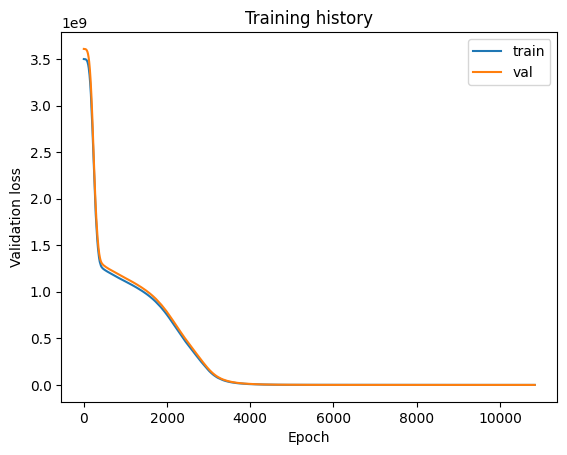

In [10]:
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Training history'),
plt.xlabel('Epoch'),
plt.ylabel('Validation loss')

Training Set R-Square= 0.9999995742465458


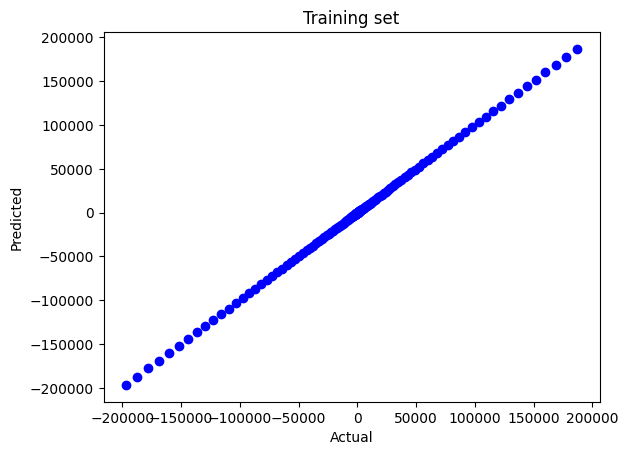

In [11]:
# plot actual vs prediction for training set

plt.plot(y_train, pred_train_set, 'bo')
plt.title('Training set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# compute R-Square value for training set

test_r2_value = r2_score(y_train, pred_train_set)
print("Training Set R-Square=", test_r2_value)

Text(0, 0.5, 'f(x)')

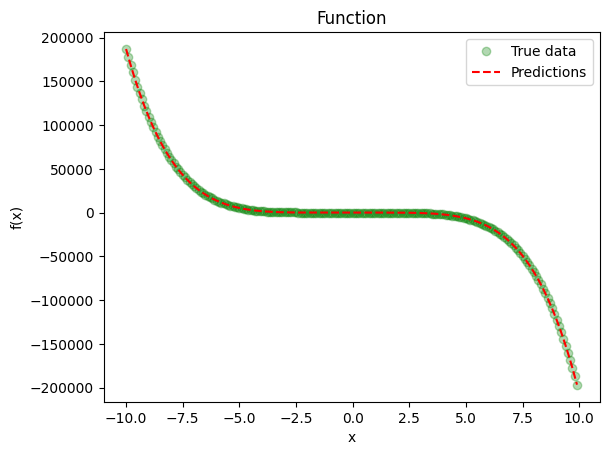

In [12]:
# plot both original function and predicted

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.3)
plt.plot(x_train, pred_train_set, 'r--', label='Predictions', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

13/13 [==============================] - 0s 373us/step


Text(0, 0.5, 'f(x)')

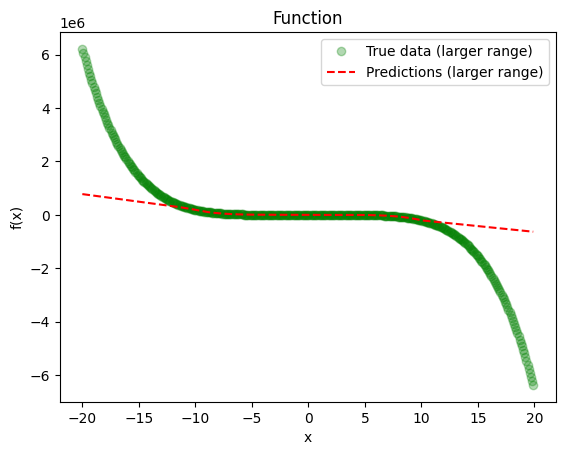

In [13]:
# check with more 'x' values

# get different section of points:
x_new_test = np.array(np.arange(-20, 20, 0.1), dtype=np.float32)
new_predicted = model.predict(x_new_test)

    
x_other = np.array(np.arange(-20, 20, 0.1), dtype=np.float32)
y_other = np.array([f(i) for i in x_other], dtype=np.float32)

plt.plot(x_other, y_other, 'go', label='True data (larger range)', alpha=0.3)
plt.plot(x_new_test, new_predicted, 'r--', label='Predictions (larger range)', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'Predicted')

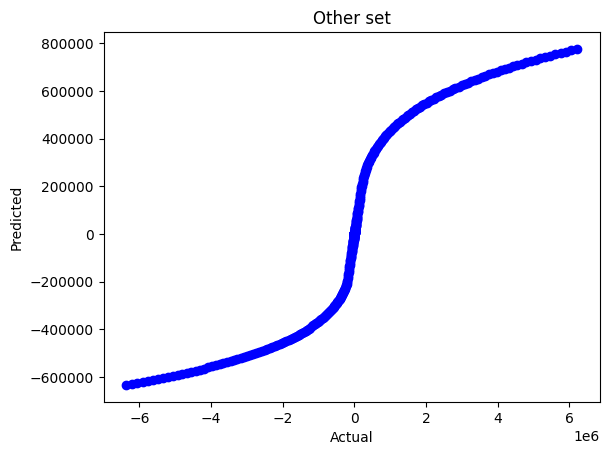

In [14]:
# plot actual vs prediction for new set

plt.plot(y_other, new_predicted, 'bo')
plt.title('Other set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Solve with PyTorch

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

In [16]:
# create data for training from a function

x_train_torch = torch.tensor(x_data, dtype=torch.float32).reshape(-1, 1)

y_train_torch = torch.tensor(y_data, dtype=torch.float32).reshape(-1, 1)

In [17]:
x_train_torch.shape

torch.Size([200, 1])

In [18]:
%%time

# define the model
model_torch = nn.Sequential(
    nn.Linear(1, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

# define loss function
loss_fn = torch.nn.MSELoss() 
# define optimizer
optimizer = optim.Adam(model_torch.parameters(), lr=0.0001)

epochs = 100000

# fit the model
for epoch in range(epochs):
    # clear gradient buffers (don't want to cummulate gradients)
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model_torch(x_train_torch)

    # get loss for the predicted output using the labels
    loss = loss_fn(outputs, y_train_torch)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss.item()))

CPU times: user 1min 23s, sys: 1min 56s, total: 3min 20s
Wall time: 1min 34s


Text(0, 0.5, 'Predicted')

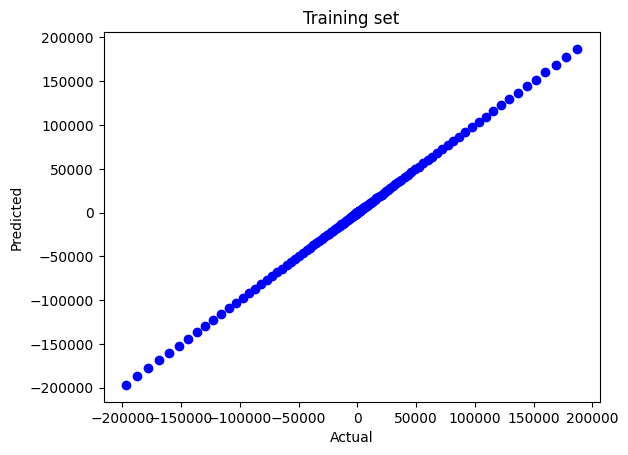

In [19]:
# plot actual vs prediction for training set

with torch.no_grad(): # we don't need gradients
    predicted = model_torch(x_train_torch)

plt.plot(y_train_torch, predicted, 'bo')
plt.title('Training set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'f(x)')

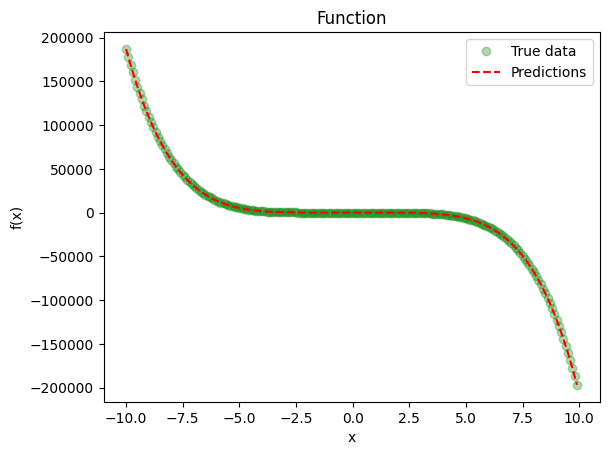

In [20]:
# plot both original function and predicted

plt.plot(x_train_torch, y_train_torch, 'go', label='True data', alpha=0.3)
plt.plot(x_train_torch, predicted, 'r--', label='Predictions', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

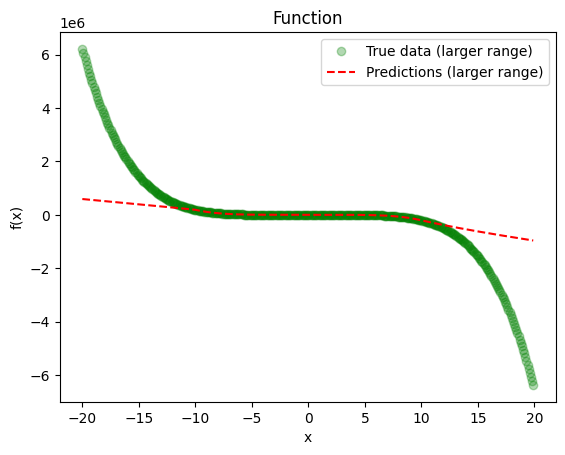

In [21]:
# check with more 'x' values

# get different section of points:
x_new_test_torch = torch.tensor(np.arange(-20, 20, 0.1), dtype=torch.float32).reshape(-1, 1)
with torch.no_grad(): # we don't need gradients
    new_predicted_torch = model_torch(x_new_test_torch)

    
x_other_torch = np.array(np.arange(-20, 20, 0.1), dtype=np.float32)
y_other_torch = np.array([f(i) for i in x_other], dtype=np.float32)

plt.plot(x_other_torch, y_other_torch, 'go', label='True data (larger range)', alpha=0.3)
plt.plot(x_new_test_torch, new_predicted_torch, 'r--', label='Predictions (larger range)', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'Predicted')

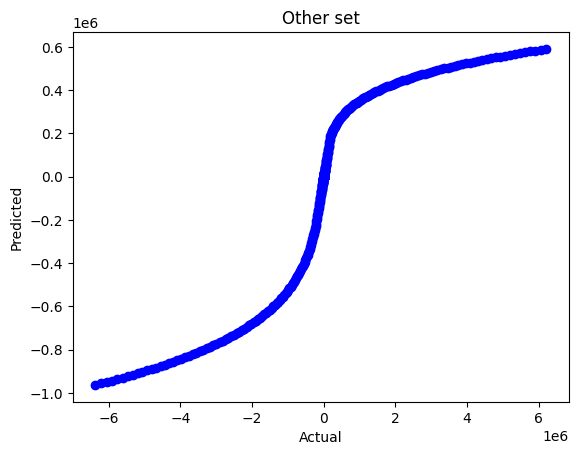

In [22]:
# plot actual vs prediction for new set

plt.plot(y_other_torch, new_predicted_torch, 'bo')
plt.title('Other set')
plt.xlabel('Actual')
plt.ylabel('Predicted')